# Data

## Logistics

In [2]:
def make_dataset(low_data,maxlen):
    input = []
    maxlen = maxlen
    data, target = [], []


    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:(i + maxlen)])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen)
    re_target = np.array(target).reshape(len(data))

    return re_data, re_target

def logistic(a):
    x = [0.8]
    for i in range(1000):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-1000:]

"""
for a in np.linspace(2.0, 4.0, 1000):
    x = logistic(a)
    pyplot.plot([a]*len(x), x, "c.", markersize=1.7)

"""
    
x = logistic(4.0)
split_log = int(len(x)*0.8)

x_train = x[0:split_log]
x_test = x[split_log:]
len(x_test)

g_log,h_log=make_dataset(x_train,2)
pre_g_log,pre_h_log=make_dataset(x_test,2)
print(g_log.shape)

(798, 2)


# TwoLayerNet

## two_layer_net

In [3]:
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import numpy 
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,num=10):
        I, H, O = input_size, hidden_size, output_size
        self.num = num
        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(self.num,I, H)
        #W1 = 0.01 * np.random.randn(I, H)
        print("W1",W1.shape)
        b1 = np.zeros(H)
        print("b1",b1.shape)
        W2 = 0.01 * np.random.randn(self.num,H, O)
        #W2 = 0.01 * np.random.randn(H, O)

        b2 = np.zeros(O)

        # レイヤの生成
        self.layers = [
            Affine(W1, b1,input_=True,num=self.num),
            Sigmoid(self.num),
            Affine(W2, b2,input_=False,num=self.num)
        ]
        #self.loss_layer = SoftmaxWithLoss()
        self.loss_layer = SigmoidWithLoss(self.num)
        
        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
        print("params",np.array(self.params).shape)
        print("params[0].shape",self.params[0].shape,"-> W1")
        print("params[1].shape",self.params[1].shape,"-> b1")
        print("params[2].shape",self.params[2].shape,"-> W2")
        print("params[3].shape",self.params[3].shape,"-> b2")

        print("grads",np.array(self.grads).shape)
        print("grads[0].shape",self.grads[0].shape,"-> W1")
        print("grads[1].shape",self.grads[1].shape,"-> b1")
        print("grads[2].shape",self.grads[2].shape,"-> W2")
        print("grads[3].shape",self.grads[3].shape,"-> b2")

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
            #print("predict_x",np.array(x).shape)
        #print("finish_predict_x",np.array(x).shape)
        return x

    def predict1(self, x):
        score = self.predict(x)
        #for layer in self.layers:
            #x = layer.forward(x)
        z=self.loss_layer.forward_(score)
        print(np.array(z).shape)
        return z
    
    def forward(self, x, t):
        score = self.predict(x)
        #print("score",np.array(score).shape)
        loss = self.loss_layer.forward(score, t)
        #print("loss.shape",np.array(loss).shape)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            #print("next_layer")
            dout = layer.backward(dout)
        return dout

## Layer

In [4]:


class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


class Affine_:
    def __init__(self, W, b):
        """
        self.params = []
        for i in range(10):
            self.params.append([W[i], b])
        """
        
        self.params = [W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        print("W.shape",W.shape)
        print("prams_Aff",np.array(self.params).shape)
        print("grads_Aff",np.array(self.grads).shape)
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

class Affine:
    def __init__(self, W, b,input_,num=1):
        
        """
        self.grads = []
        self.params = []
        for i in range(10):
            self.params.append([W[i], b])
            self.grads.append([np.zeros_like(W[i]), np.zeros_like(b)])
        """
        self.params = [W,b]
        print(len(self.params))
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        
        self.x = None
        print("W.shape",W.shape)
        self.input_ = input_
        self.num = num
        
    def forward(self, x):
        out =[]
        W, b = self.params
        #print("forward.W",W[0].shape)
        #print("forward.b",b.shape)
        if self.input_ ==True:
            for i in range(self.num):
                #print("x",np.array(x).shape)
                out1=(np.dot(x, W[i]) + b)
                out.append(out1)
        elif self.input_==False:
            for i in range(self.num):
                #print("x",np.array(x[i]).shape)
                out1=(np.dot(x[i], W[i]) + b)
                out.append(out1)
        
        self.x = x
        #print("forward_out",np.array(out).shape) 
        
        return out

    def backward(self, dout):
        W, b = self.params
        dx,dW,db = [],[],[]
        #print("backward_Aff_x",np.array(self.x).shape)
        #print("backward_Aff_dout",np.array(dout).shape)
        if self.input_ ==False:
            for i in range(self.num): 
                dx.append(np.dot(dout[i], W[i].T))
                dW.append(np.dot(self.x[i].T, dout[i]))
                db.append(np.sum(dout[i], axis=0))

        elif self.input_ ==True:
            for i in range(self.num): 
                dx.append(np.dot(dout[i], W[i].T))
                dW.append(np.dot(np.array(self.x).T, dout[i]))
                db.append(np.sum(dout[i], axis=0))  
                
        #print("backward_dx",np.array(dx).shape)
        #print("backward_dW",np.array(dW).shape)
        #print("backward_db",np.array(db).shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db[0]
        return dx

class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
        
        #loss = mean_squared_error(self.y,self.t)
        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx


class Sigmoid:
    def __init__(self,num=1):
        self.params, self.grads = [], []
        self.out = None
        self.num=num
    def forward(self, x):
        out = []
        for i in range(self.num):
            out1 = 1 / (1 + np.exp(-x[i]))
            out.append(out1)
        self.out = out
        #print("sig_self.out",np.array(self.out).shape)
        return out

    def backward(self, dout):
        dx=[]
        #print("backward_sig_out",np.array(self.out).shape)
        #print("backward_sig_dout",np.array(dout).shape)
        for i in range(self.num):
            dx.append(dout[i] * (1.0 - self.out[i]) * self.out[i])
        #print("backword_sig_dx",np.array(dx).shape)
        return dx
    
class Sigmoid_:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx
    
    
class Relu:
    def __init__(self):
        self.mask = None
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
    

class SigmoidWithLoss:
    def __init__(self,num=1):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None  # sigmoidの出力
        self.t = None  # 教師データ
        self.num = num
        
    def forward(self, x, t):
        self.t = t
        self.y = []
        self.loss = []
        for i in range(self.num):
            #print("x[i]",x[i].shape)
            y1=(1 / (1 + np.exp(-x[i])))
            self.y.append(y1)
            #print("self.y",np.array(self.y).shape)
            #print("y1",np.array(y1).shape)
            #print("t",self.t.shape)
            #print("Loss_forward_y",np.array(self.y).shape)
            #y1 = y1.reshape(-1)
            
            #self.y = np.array(self.y).reshape(-1)
            #self.loss = mean_squared_error(y1, self.t)
            self.loss.append(mean_squared_error(y1, self.t))
            #print("sig_output",np.array(self.loss).shape)
        #self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)
        #print("Loss_forward_y",np.array(self.y).shape)
        return self.loss
    
    def forward_(self, x):
        self.y = []
        for i in range(self.num):
            y1 = 1 / (1 + np.exp(-x[i]))
        #print("self.y",self.y,"shape",self.y.shape)
        #print("self.t",self.t,"shape",self.t.shape)
            self.y.append(y1)
        #self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.y

    def backward(self, dout=1):
        dx = []
        batch_size = self.t.shape[0]
        #print("backword_batch_size",batch_size)
        for i in range(self.num): 
            dx.append((self.y[i] - self.t) * dout / batch_size)
        #print("backward_dx",np.array(dx).shape)
        return dx

class SigmoidWithLoss_:
    def __init__(self):
        self.params, self.grads = [], []
        self.loss = None
        self.y = None  # sigmoidの出力
        self.t = None  # 教師データ

    def forward(self, x, t):
        self.t = t
        #self.y = []
        
        self.y=(1 / (1 + np.exp(-x)))
        
        #print("self.y",self.y,"shape",self.y.shape)
        #print("self.t",self.t,"shape",self.t.shape)
        self.loss = mean_squared_error(self.y, self.t)
        #self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)
        print("Loss_forward_y",self.y.shape)
        return self.loss
    
    def forward_(self, x):
        self.t = t
        self.y = 1 / (1 + np.exp(-x))
        #print("self.y",self.y,"shape",self.y.shape)
        #print("self.t",self.t,"shape",self.t.shape)

        #self.loss = cross_entropy_error(np.c_[1 - self.y, self.y], self.t)

        return self.y

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = (self.y - self.t) * dout / batch_size
        return dx

class Dropout:
    '''
    http://arxiv.org/abs/1207.0580
    '''
    def __init__(self, dropout_ratio=0.5):
        self.params, self.grads = [], []
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class Embedding:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out

    def backward(self, dout):
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None

## function

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## util

In [6]:

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word


def cos_similarity(x, y, eps=1e-8):
    '''コサイン類似度の算出

    :param x: ベクトル
    :param y: ベクトル
    :param eps: ”0割り”防止のための微小値
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)


def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''類似単語の検索

    :param query: クエリ（テキスト）
    :param word_to_id: 単語から単語IDへのディクショナリ
    :param id_to_word: 単語IDから単語へのディクショナリ
    :param word_matrix: 単語ベクトルをまとめた行列。各行に対応する単語のベクトルが格納されていることを想定する
    :param top: 上位何位まで表示するか
    '''
    if query not in word_to_id:
        print('%s is not found' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return


def convert_one_hot(corpus, vocab_size):
    '''one-hot表現への変換

    :param corpus: 単語IDのリスト（1次元もしくは2次元のNumPy配列）
    :param vocab_size: 語彙数
    :return: one-hot表現（2次元もしくは3次元のNumPy配列）
    '''
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot


def create_co_matrix(corpus, vocab_size, window_size=1):
    '''共起行列の作成

    :param corpus: コーパス（単語IDのリスト）
    :param vocab_size:語彙数
    :param window_size:ウィンドウサイズ（ウィンドウサイズが1のときは、単語の左右1単語がコンテキスト）
    :return: 共起行列
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix


def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI（正の相互情報量）の作成

    :param C: 共起行列
    :param verbose: 進行状況を出力するかどうか
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% done' % (100*cnt/total))
    return M


def create_contexts_target(corpus, window_size=1):
    '''コンテキストとターゲットの作成

    :param corpus: コーパス（単語IDのリスト）
    :param window_size: ウィンドウサイズ（ウィンドウサイズが1のときは、単語の左右1単語がコンテキスト）
    :return:
    '''
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)


def to_cpu(x):
    import numpy
    if type(x) == numpy.ndarray:
        return x
    return np.asnumpy(x)


def to_gpu(x):
    import cupy
    if type(x) == cupy.ndarray:
        return x
    return cupy.asarray(x)


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate


def eval_perplexity(model, corpus, batch_size=10, time_size=35):
    print('evaluating perplexity ...')
    corpus_size = len(corpus)
    total_loss, loss_cnt = 0, 0
    max_iters = (corpus_size - 1) // (batch_size * time_size)
    jump = (corpus_size - 1) // batch_size

    for iters in range(max_iters):
        xs = np.zeros((batch_size, time_size), dtype=np.int32)
        ts = np.zeros((batch_size, time_size), dtype=np.int32)
        time_offset = iters * time_size
        offsets = [time_offset + (i * jump) for i in range(batch_size)]
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                xs[i, t] = corpus[(offset + t) % corpus_size]
                ts[i, t] = corpus[(offset + t + 1) % corpus_size]

        try:
            loss = model.forward(xs, ts, train_flg=False)
        except TypeError:
            loss = model.forward(xs, ts)
        total_loss += loss

        sys.stdout.write('\r%d / %d' % (iters, max_iters))
        sys.stdout.flush()

    print('')
    ppl = np.exp(total_loss / max_iters)
    return ppl


def eval_seq2seq(model, question, correct, id_to_char,
                 verbos=False, is_reverse=False):
    correct = correct.flatten()
    # 頭の区切り文字
    start_id = correct[0]
    correct = correct[1:]
    guess = model.generate(question, start_id, len(correct))

    # 文字列へ変換
    question = ''.join([id_to_char[int(c)] for c in question.flatten()])
    correct = ''.join([id_to_char[int(c)] for c in correct])
    guess = ''.join([id_to_char[int(c)] for c in guess])

    if verbos:
        if is_reverse:
            question = question[::-1]

        colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
        print('Q', question)
        print('T', correct)

        is_windows = os.name == 'nt'

        if correct == guess:
            mark = colors['ok'] + '☑' + colors['close']
            if is_windows:
                mark = 'O'
            print(mark + ' ' + guess)
        else:
            mark = colors['fail'] + '☒' + colors['close']
            if is_windows:
                mark = 'X'
            print(mark + ' ' + guess)
        print('---')

    return 1 if guess == correct else 0


def analogy(a, b, c, word_to_id, id_to_word, word_matrix, top=5, answer=None):
    for word in (a, b, c):
        if word not in word_to_id:
            print('%s is not found' % word)
            return

    print('\n[analogy] ' + a + ':' + b + ' = ' + c + ':?')
    a_vec, b_vec, c_vec = word_matrix[word_to_id[a]], word_matrix[word_to_id[b]], word_matrix[word_to_id[c]]
    query_vec = b_vec - a_vec + c_vec
    query_vec = normalize(query_vec)

    similarity = np.dot(word_matrix, query_vec)

    if answer is not None:
        print("==>" + answer + ":" + str(np.dot(word_matrix[word_to_id[answer]], query_vec)))

    count = 0
    for i in (-1 * similarity).argsort():
        if np.isnan(similarity[i]):
            continue
        if id_to_word[i] in (a, b, c):
            continue
        print(' {0}: {1}'.format(id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return


def normalize(x):
    if x.ndim == 2:
        s = np.sqrt((x * x).sum(1))
        x /= s.reshape((s.shape[0], 1))
    elif x.ndim == 1:
        s = np.sqrt((x * x).sum())
        x /= s
    return x

## trainer

In [7]:
def remove_duplicate(params, grads):
    '''
    パラメータ配列中の重複する重みをひとつに集約し、
    その重みに対応する勾配を加算する
    '''
    params, grads = params[:], grads[:]  # copy list

    while True:
        find_flg = False
        L = len(params)

        for i in range(0, L - 1):
            for j in range(i + 1, L):
                # 重みを共有する場合
                if params[i] is params[j]:
                    grads[i] += grads[j]  # 勾配の加算
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)
                # 転置行列として重みを共有する場合（weight tying）
                elif params[i].ndim == 2 and params[j].ndim == 2 and \
                     params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                    grads[i] += grads[j].T
                    find_flg = True
                    params.pop(j)
                    grads.pop(j)

                if find_flg: break
            if find_flg: break

        if not find_flg: break

    return params, grads


class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # シャッフル
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 勾配を求め、パラメータを更新
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 共有された重みを1つに集約
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 評価
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| epoch %d |  iter %d / %d | time %d[s] | loss %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

## optimizer

In [8]:

class SGD:
    '''
    確率的勾配降下法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

class SGD_:
    '''
    確率的勾配降下法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


class Momentum:
    '''
    Momentum SGD
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]


class Nesterov:
    '''
    Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]


class AdaGrad:
    '''
    AdaGrad
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class RMSprop:
    '''
    RMSprop
    '''
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads,ii,num):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))
        
        b=[]
        grads_b =[]
        for i in range(len(params)):
            a = []
            a_g = []
            c = params[i]
            d = grads[i]
            #print("c",c.shape)
            if(i%2 == 0):
                for j in range(num):
                    a.append(c[ii])
                    a_g.append(d[ii])
            else:
                #print("c",c)
                #a.append(c)
                a = np.append(a,c)
                a_g = np.append(a_g,d)
            #print("a",np.array(a).shape)
            b.append(a)
            grads_b.append(a_g)
                
        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -=self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads,ii,num):
        #print("update:0000000000000000")
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        #print("ii",ii)
        params_b =[]
        grads_b = []
        #print("params[0][ii]",params[0][ii].shape)
        for i in range(len(params)):
            a = []
            a_g = []
            c = params[i]
            d = grads[i]
            #print("c",c.shape)
            if(i%2 == 0):
                for j in range(num):
                    a.append(c[ii])
                    a_g.append(d[ii])
            else:
                #print("c",c)
                #a.append(c)
                a = np.append(a,c)
                a_g = np.append(a_g,d)
            #print("a",np.array(a).shape)
            params_b.append(a)
            grads_b.append(a_g)
            #print("b",np.array(b).shape)
        #print("b[3]",np.array(b[3]).shape)
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        #print( "param_",np.array(param_).shape)
        pp = []
        for i in range(len(params)):
           
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])

            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            pp=np.append(pp,params_b[i] - lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7))
            #
            #if i==0:print("pp ::",pp[-1][0])
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)
            #if i==0:print("params ::",params[i][-1][0])

            #print(pp.shape)
            #params[i] == pp[-1]
            #if i==0:print("params_::",params[i][-1])

        #print("params",params[3].shape)



## spiral_dataset

In [8]:
def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # クラスごとのサンプル数
    DIM = 2  # データの要素数
    CLS_NUM = 3  # クラス数

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N):#N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

## train

In [9]:
# ハイパーパラメータの設定
max_epoch = 100
batch_size = 1
hidden_size = 10
learning_rate = 0.01
num =100
#x, t = load_data()

x, t = g_log,h_log
t = t.reshape(len(t),1)

model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=1,num=num)
optimizer = Adam(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        loss_min =100
        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        #print("lOooooss",np.array(loss).shape)
        for i in range(num):
            if loss_min>loss[i]:
                loss_min = loss[i]
                #print("loss_min",loss_min)
        model.backward()
        #print("model.params",np.array(model.params).shape,"model.grads",np.array(model.grads).shape)
        optimizer.update(model.params, model.grads)
        total_loss += loss_min
        #print("LOSS",total_loss)

        loss_count += 1

        # 定期的に学習経過を出力
        """
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.9f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            print("----------------------------------------------")
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
        """
    avg_loss = total_loss / loss_count
    print('| epoch %d | loss %.9f'% (epoch + 1, avg_loss))
    print("----------------------------------------------")
    loss_list.append(avg_loss)
    total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()




W1 (100, 2, 10)
b1 (10,)
2
W.shape (100, 2, 10)
2
W.shape (100, 10, 1)
params (4,)
params[0].shape (100, 2, 10) -> W1
params[1].shape (10,) -> b1
params[2].shape (100, 10, 1) -> W2
params[3].shape (1,) -> b2
grads (4,)
grads[0].shape (100, 2, 10) -> W1
grads[1].shape (10,) -> b1
grads[2].shape (100, 10, 1) -> W2
grads[3].shape (1,) -> b2


TypeError: update() missing 1 required positional argument: 'ii'

(100, 798, 1)
(100, 198, 1)
min_index 0
loss_min 0.0014069631922052647
min_index 1
loss_min 0.0007815526187698445
min_index 8
loss_min 0.00046926520553987675
min_index 12
loss_min 0.0004128072905907548
min_index 20
loss_min 0.0003302514497225018
min_index 87
loss_min 0.00029883869258696353
min_index 0
loss_min 0.001347720196579479
min_index 1
loss_min 0.0007659734814589135
min_index 8
loss_min 0.0004230235791906287
min_index 12
loss_min 0.00036511808975601734
min_index 20
loss_min 0.0003275209082253648
min_index 66
loss_min 0.0003039877230762551
min_index 87
loss_min 0.000277113380101485


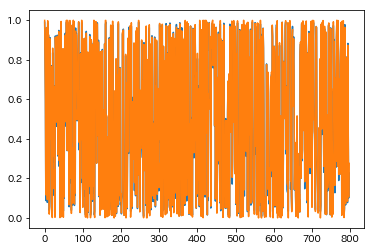

train_mse 0.00029883869258696353


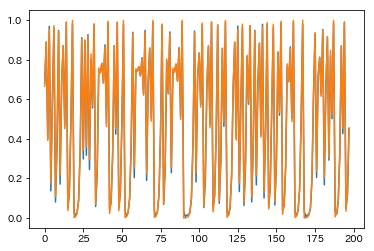

test_mse 0.000277113380101485


In [900]:
y_hat=model.predict1(x)
y_hat_pre = model.predict1(pre_g_log)
#print(y_hat.shape)

def pre_select(num,h_log,y_hat):
    loss_min_pre =100
    index=0
    for i in range(num):
        a=mean_squared_error(h_log,y_hat[i])
        if loss_min_pre>a:
            print("min_index",i)
            loss_min_pre = a
            print("loss_min",loss_min_pre)
            index = i
    return index

index = pre_select(num,t,y_hat)
index_pre = pre_select(num,pre_h_log,y_hat_pre)
plt.plot(y_hat[index])
plt.plot(t)
plt.show()
print("train_mse",mean_squared_error(t,y_hat[index]))
plt.plot(y_hat_pre[index_pre])
plt.plot(pre_h_log)
plt.show()
print("test_mse",mean_squared_error(pre_h_log,y_hat_pre[index_pre]))

# Result

In [751]:
"""
1.1[num = 10 ,bacth_size=1,epoch=100,Adam(lr=0.01)]
1m 11.0s
train_mse 0.0006646107685651673
test_mse 0.0006486004710223185

1.2[num = 1 ,bacth_size=1,epoch=100,Adam(lr=0.01)]
①
13.8s
train_mse 0.0009172083761730132
test_mse 0.0009078938836308318
②
train_mse 0.0013788334375170043
test_mse 0.0014266026528884576

2.1[num = 1 ,bacth_size=1,epoch=1000,Adam(lr=0.01)]
①
2m 14s
train_mse 0.0001640623651757909
test_mse 0.0001569906380732053
②
2m 14s
train_mse 0.001925735051401396
test_mse 0.001765444932240025

2.2[num = 10 ,bacth_size=1,epoch=1000,Adam(lr=0.01)]
①
11m 48s
train_mse 0.0002106592418198435
test_mse 0.00019982171228292148
②
11m 57s
train_mse 0.0002630994771248059
test_mse 0.00026700176403219374
"""

'\n1.1[num = 10 ,bacth_size=1,epoch=100,Adam(lr=0.01)]\n1m 11.0s\ntrain_mse 0.0006646107685651673\ntest_mse 0.0006486004710223185\n\n1.2[num = 1 ,bacth_size=1,epoch=100,Adam(lr=0.01)]\n13.8s\ntrain_mse 0.0009172083761730132\ntest_mse 0.0009078938836308318\n\n2.1[num = 1 ,bacth_size=1,epoch=1000,Adam(lr=0.01)]\n①\n2m 14s\ntrain_mse 0.0001640623651757909\ntest_mse 0.0001569906380732053\n②\n2m 14s\ntrain_mse 0.001925735051401396\ntest_mse 0.001765444932240025\n\n2.2[num = 1 ,bacth_size=1,epoch=1000,Adam(lr=0.01)]\n①\n11m 48s\ntrain_mse 0.0002106592418198435\ntest_mse 0.00019982171228292148\n②\n11m 57s\ntrain_mse 0.0002630994771248059\ntest_mse 0.00026700176403219374\n'

## show_loss

### 1

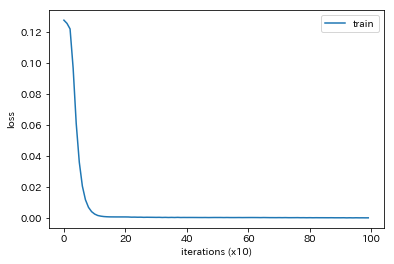

In [898]:
#1.1
show_loss1_1 =loss_list
plt.plot(np.arange(len(show_loss1_1)), show_loss1_1, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.legend()
plt.show()

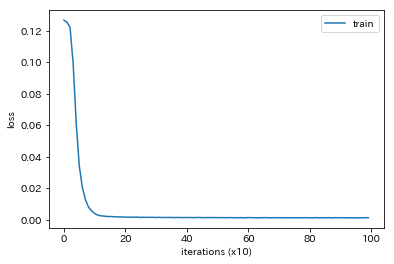

In [894]:
#1.2
show_loss1_2 =loss_list
plt.plot(np.arange(len(show_loss1_2)), show_loss1_2, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.legend()
plt.show()

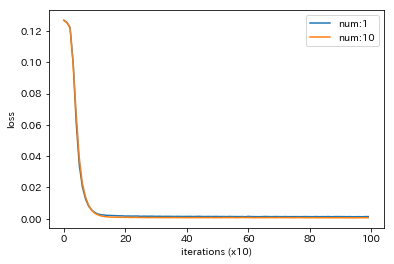

In [895]:
#1.1 & 1.2
plt.plot(np.arange(len(show_loss1_2)), show_loss1_2, label='num:1')
plt.plot(np.arange(len(show_loss1_1)), show_loss1_1, label='num:10')

plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.legend()
plt.savefig('image/logi_BP(N1&10)_loss_e100.png')
plt.show()

### 2

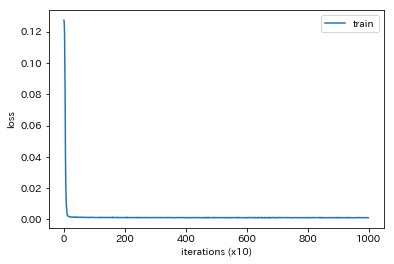

In [877]:
## 2.1
#show_loss2_1 =loss_list
plt.plot(np.arange(len(show_loss2_1)), show_loss2_1, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.legend()
plt.show()

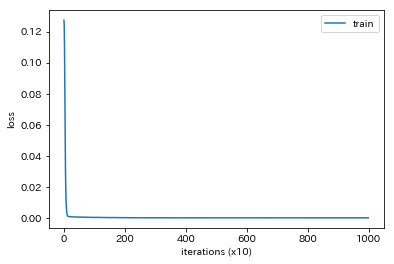

In [878]:
#2.2
#show_loss2_2 =loss_list
plt.plot(np.arange(len(show_loss2_2)), show_loss2_2, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.legend()
plt.show()

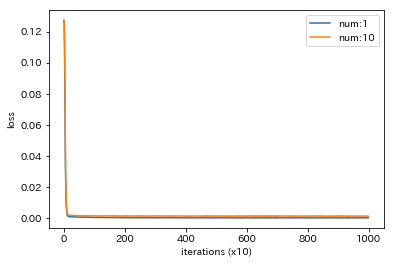

In [880]:
# 2.1 & 2.2
plt.plot(np.arange(len(show_loss2_2)), show_loss2_2, label='num:1')
plt.plot(np.arange(len(show_loss2_1)), show_loss2_1, label='num:10')

plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.legend()
plt.savefig('image/logi_BP(N1&10)_loss_e1000.png')
plt.show()

# ex

In [314]:
W1 = 0.01 * np.random.randn(10,2, 10)
b1 = np.zeros(10)
params = [W1,b1]
#print(np.array(params).shape)
W2 = 0.01 * np.random.randn(10,10, 1)
b2 = np.zeros(1)

params1 =[W2,b2]
params2 = params + params1
np.array(params2).shape
params2[1].shape

(10,)

# Hybrid_BP

## BP

In [147]:
size_log = 10

In [127]:
model_10 = MLP(g_log,h_log,2,10,1,num=size_log,max_epoch=3000)

W1 (50, 2, 10)
b1 (10,)
2
W.shape (50, 2, 10)
2
W.shape (50, 10, 1)
params (4,)
params[0].shape (50, 2, 10) -> W1
params[1].shape (10,) -> b1
params[2].shape (50, 10, 1) -> W2
params[3].shape (1,) -> b2
grads (4,)
grads[0].shape (50, 2, 10) -> W1
grads[1].shape (10,) -> b1
grads[2].shape (50, 10, 1) -> W2
grads[3].shape (1,) -> b2
total_loss 100.18369023927124
| epoch 1 | loss 0.125543471
----------------------------------------------
total_loss 100.09425755843571
| epoch 2 | loss 0.125431400
----------------------------------------------
total_loss 97.40945952201176
| epoch 3 | loss 0.122066992
----------------------------------------------
total_loss 79.86066504640084
| epoch 4 | loss 0.100076021
----------------------------------------------
total_loss 55.508824257946394
| epoch 5 | loss 0.069559930
----------------------------------------------
total_loss 30.079466831192228
| epoch 6 | loss 0.037693567
----------------------------------------------
total_loss 17.58748679357404
| ep

total_loss 0.447469351739939
| epoch 75 | loss 0.000560739
----------------------------------------------
total_loss 0.4085285296780474
| epoch 76 | loss 0.000511941
----------------------------------------------
total_loss 0.4157647394856198
| epoch 77 | loss 0.000521008
----------------------------------------------
total_loss 0.3682643601573363
| epoch 78 | loss 0.000461484
----------------------------------------------
total_loss 0.38890515987358276
| epoch 79 | loss 0.000487350
----------------------------------------------
total_loss 0.38723447979508147
| epoch 80 | loss 0.000485256
----------------------------------------------
total_loss 0.3638418814912847
| epoch 81 | loss 0.000455942
----------------------------------------------
total_loss 0.35041258813118864
| epoch 82 | loss 0.000439114
----------------------------------------------
total_loss 0.38234788105232875
| epoch 83 | loss 0.000479133
----------------------------------------------
total_loss 0.33504209941573415
| e

total_loss 0.04337089032996194
| epoch 151 | loss 0.000054349
----------------------------------------------
total_loss 0.03914044088808848
| epoch 152 | loss 0.000049048
----------------------------------------------
total_loss 0.041217103170822514
| epoch 153 | loss 0.000051651
----------------------------------------------
total_loss 0.04525772553769962
| epoch 154 | loss 0.000056714
----------------------------------------------
total_loss 0.04094367927344713
| epoch 155 | loss 0.000051308
----------------------------------------------
total_loss 0.0396460820441887
| epoch 156 | loss 0.000049682
----------------------------------------------
total_loss 0.04338969262406572
| epoch 157 | loss 0.000054373
----------------------------------------------
total_loss 0.038421313803784746
| epoch 158 | loss 0.000048147
----------------------------------------------
total_loss 0.03617729342921698
| epoch 159 | loss 0.000045335
----------------------------------------------
total_loss 0.03579

total_loss 0.011888481342380764
| epoch 226 | loss 0.000014898
----------------------------------------------
total_loss 0.013988975646338324
| epoch 227 | loss 0.000017530
----------------------------------------------
total_loss 0.011857081697911796
| epoch 228 | loss 0.000014858
----------------------------------------------
total_loss 0.012067286642082588
| epoch 229 | loss 0.000015122
----------------------------------------------
total_loss 0.011617651504824796
| epoch 230 | loss 0.000014558
----------------------------------------------
total_loss 0.011932640364432937
| epoch 231 | loss 0.000014953
----------------------------------------------
total_loss 0.013369295530850384
| epoch 232 | loss 0.000016754
----------------------------------------------
total_loss 0.012338250531698647
| epoch 233 | loss 0.000015461
----------------------------------------------
total_loss 0.011763624106621922
| epoch 234 | loss 0.000014741
----------------------------------------------
total_loss

total_loss 0.005691013692562116
| epoch 301 | loss 0.000007132
----------------------------------------------
total_loss 0.009464562897378638
| epoch 302 | loss 0.000011860
----------------------------------------------
total_loss 0.007284382286569729
| epoch 303 | loss 0.000009128
----------------------------------------------
total_loss 0.007874627669208687
| epoch 304 | loss 0.000009868
----------------------------------------------
total_loss 0.007092217769292371
| epoch 305 | loss 0.000008887
----------------------------------------------
total_loss 0.007096703862978053
| epoch 306 | loss 0.000008893
----------------------------------------------
total_loss 0.006295120569370606
| epoch 307 | loss 0.000007889
----------------------------------------------
total_loss 0.0069497623508888075
| epoch 308 | loss 0.000008709
----------------------------------------------
total_loss 0.007208900459872393
| epoch 309 | loss 0.000009034
----------------------------------------------
total_los

total_loss 0.004083133395762248
| epoch 376 | loss 0.000005117
----------------------------------------------
total_loss 0.006736630529824302
| epoch 377 | loss 0.000008442
----------------------------------------------
total_loss 0.004233691407492694
| epoch 378 | loss 0.000005305
----------------------------------------------
total_loss 0.004333696877909745
| epoch 379 | loss 0.000005431
----------------------------------------------
total_loss 0.0040843885051005885
| epoch 380 | loss 0.000005118
----------------------------------------------
total_loss 0.004909612385308419
| epoch 381 | loss 0.000006152
----------------------------------------------
total_loss 0.003686220339443026
| epoch 382 | loss 0.000004619
----------------------------------------------
total_loss 0.004965004300263522
| epoch 383 | loss 0.000006222
----------------------------------------------
total_loss 0.004689124843585429
| epoch 384 | loss 0.000005876
----------------------------------------------
total_los

total_loss 0.0025124280028503334
| epoch 451 | loss 0.000003148
----------------------------------------------
total_loss 0.002965026012568486
| epoch 452 | loss 0.000003716
----------------------------------------------
total_loss 0.0032581527257647376
| epoch 453 | loss 0.000004083
----------------------------------------------
total_loss 0.002816419325745522
| epoch 454 | loss 0.000003529
----------------------------------------------
total_loss 0.003781706017149054
| epoch 455 | loss 0.000004739
----------------------------------------------
total_loss 0.0031386398975918333
| epoch 456 | loss 0.000003933
----------------------------------------------
total_loss 0.003879484693138721
| epoch 457 | loss 0.000004862
----------------------------------------------
total_loss 0.0032018379351977247
| epoch 458 | loss 0.000004012
----------------------------------------------
total_loss 0.002927376942840431
| epoch 459 | loss 0.000003668
----------------------------------------------
total_

total_loss 0.0020012697813875705
| epoch 526 | loss 0.000002508
----------------------------------------------
total_loss 0.0018636780882254334
| epoch 527 | loss 0.000002335
----------------------------------------------
total_loss 0.0014580109250667377
| epoch 528 | loss 0.000001827
----------------------------------------------
total_loss 0.002131447762157129
| epoch 529 | loss 0.000002671
----------------------------------------------
total_loss 0.0023208038141140763
| epoch 530 | loss 0.000002908
----------------------------------------------
total_loss 0.0022436936048748643
| epoch 531 | loss 0.000002812
----------------------------------------------
total_loss 0.0018458105250946516
| epoch 532 | loss 0.000002313
----------------------------------------------
total_loss 0.00249661725046393
| epoch 533 | loss 0.000003129
----------------------------------------------
total_loss 0.002002378973389049
| epoch 534 | loss 0.000002509
----------------------------------------------
total

total_loss 0.0023896936449775367
| epoch 601 | loss 0.000002995
----------------------------------------------
total_loss 0.0027324180831479056
| epoch 602 | loss 0.000003424
----------------------------------------------
total_loss 0.0026188360265334562
| epoch 603 | loss 0.000003282
----------------------------------------------
total_loss 0.0025060870701282788
| epoch 604 | loss 0.000003140
----------------------------------------------
total_loss 0.002262861916225784
| epoch 605 | loss 0.000002836
----------------------------------------------
total_loss 0.0022855509582902357
| epoch 606 | loss 0.000002864
----------------------------------------------
total_loss 0.0022935924127342757
| epoch 607 | loss 0.000002874
----------------------------------------------
total_loss 0.0029242242220063734
| epoch 608 | loss 0.000003664
----------------------------------------------
total_loss 0.002299353353487494
| epoch 609 | loss 0.000002881
----------------------------------------------
tot

total_loss 0.0025374072768516256
| epoch 676 | loss 0.000003180
----------------------------------------------
total_loss 0.002051460845063469
| epoch 677 | loss 0.000002571
----------------------------------------------
total_loss 0.0023706848056900915
| epoch 678 | loss 0.000002971
----------------------------------------------
total_loss 0.0020921694023181303
| epoch 679 | loss 0.000002622
----------------------------------------------
total_loss 0.002367959251879767
| epoch 680 | loss 0.000002967
----------------------------------------------
total_loss 0.0027353753753011157
| epoch 681 | loss 0.000003428
----------------------------------------------
total_loss 0.0019119794989689743
| epoch 682 | loss 0.000002396
----------------------------------------------
total_loss 0.0016304709959155653
| epoch 683 | loss 0.000002043
----------------------------------------------
total_loss 0.0021037150362519124
| epoch 684 | loss 0.000002636
----------------------------------------------
tot

total_loss 0.0016749140333287224
| epoch 751 | loss 0.000002099
----------------------------------------------
total_loss 0.0023148761825113424
| epoch 752 | loss 0.000002901
----------------------------------------------
total_loss 0.0017169808894782678
| epoch 753 | loss 0.000002152
----------------------------------------------
total_loss 0.0017871081070928252
| epoch 754 | loss 0.000002239
----------------------------------------------
total_loss 0.001339739954673828
| epoch 755 | loss 0.000001679
----------------------------------------------
total_loss 0.001591026194861104
| epoch 756 | loss 0.000001994
----------------------------------------------
total_loss 0.0013720930342088333
| epoch 757 | loss 0.000001719
----------------------------------------------
total_loss 0.001898786506523036
| epoch 758 | loss 0.000002379
----------------------------------------------
total_loss 0.0022045509656773805
| epoch 759 | loss 0.000002763
----------------------------------------------
tota

total_loss 0.0016235239683044065
| epoch 825 | loss 0.000002034
----------------------------------------------
total_loss 0.0013150598822459524
| epoch 826 | loss 0.000001648
----------------------------------------------
total_loss 0.0017389600410363925
| epoch 827 | loss 0.000002179
----------------------------------------------
total_loss 0.002712158828707382
| epoch 828 | loss 0.000003399
----------------------------------------------
total_loss 0.0013408531377858586
| epoch 829 | loss 0.000001680
----------------------------------------------
total_loss 0.001435319330625387
| epoch 830 | loss 0.000001799
----------------------------------------------
total_loss 0.00149741070588941
| epoch 831 | loss 0.000001876
----------------------------------------------
total_loss 0.001488696310956346
| epoch 832 | loss 0.000001866
----------------------------------------------
total_loss 0.0015807152668677641
| epoch 833 | loss 0.000001981
----------------------------------------------
total_

total_loss 0.0010952971997632906
| epoch 899 | loss 0.000001373
----------------------------------------------
total_loss 0.0017257125013346525
| epoch 900 | loss 0.000002163
----------------------------------------------
total_loss 0.0012942228141170008
| epoch 901 | loss 0.000001622
----------------------------------------------
total_loss 0.001507142945138198
| epoch 902 | loss 0.000001889
----------------------------------------------
total_loss 0.0010250360729806803
| epoch 903 | loss 0.000001285
----------------------------------------------
total_loss 0.0019895563533180853
| epoch 904 | loss 0.000002493
----------------------------------------------
total_loss 0.001183493030039657
| epoch 905 | loss 0.000001483
----------------------------------------------
total_loss 0.0012177777307214178
| epoch 906 | loss 0.000001526
----------------------------------------------
total_loss 0.0021103689844275764
| epoch 907 | loss 0.000002645
----------------------------------------------
tot

total_loss 0.001358472789949572
| epoch 974 | loss 0.000001702
----------------------------------------------
total_loss 0.0009771746676130347
| epoch 975 | loss 0.000001225
----------------------------------------------
total_loss 0.000926458422090203
| epoch 976 | loss 0.000001161
----------------------------------------------
total_loss 0.0011202589191981651
| epoch 977 | loss 0.000001404
----------------------------------------------
total_loss 0.001025129351649323
| epoch 978 | loss 0.000001285
----------------------------------------------
total_loss 0.0015849371696627721
| epoch 979 | loss 0.000001986
----------------------------------------------
total_loss 0.0015154254247770173
| epoch 980 | loss 0.000001899
----------------------------------------------
total_loss 0.0011861416057991963
| epoch 981 | loss 0.000001486
----------------------------------------------
total_loss 0.00115028355062147
| epoch 982 | loss 0.000001441
----------------------------------------------
total_

total_loss 0.0009833760551514067
| epoch 1048 | loss 0.000001232
----------------------------------------------
total_loss 0.0009747969393556506
| epoch 1049 | loss 0.000001222
----------------------------------------------
total_loss 0.001638705327606066
| epoch 1050 | loss 0.000002054
----------------------------------------------
total_loss 0.0011171092381520686
| epoch 1051 | loss 0.000001400
----------------------------------------------
total_loss 0.0010284207974985637
| epoch 1052 | loss 0.000001289
----------------------------------------------
total_loss 0.001298863839876536
| epoch 1053 | loss 0.000001628
----------------------------------------------
total_loss 0.001490280717412178
| epoch 1054 | loss 0.000001868
----------------------------------------------
total_loss 0.0012597664881472046
| epoch 1055 | loss 0.000001579
----------------------------------------------
total_loss 0.0009298903520046277
| epoch 1056 | loss 0.000001165
------------------------------------------

total_loss 0.0013806643738286592
| epoch 1122 | loss 0.000001730
----------------------------------------------
total_loss 0.0009276851403781011
| epoch 1123 | loss 0.000001163
----------------------------------------------
total_loss 0.0009935123456526866
| epoch 1124 | loss 0.000001245
----------------------------------------------
total_loss 0.0017527412218052336
| epoch 1125 | loss 0.000002196
----------------------------------------------
total_loss 0.0013968008289408178
| epoch 1126 | loss 0.000001750
----------------------------------------------
total_loss 0.0011085013227141603
| epoch 1127 | loss 0.000001389
----------------------------------------------
total_loss 0.001390564208962543
| epoch 1128 | loss 0.000001743
----------------------------------------------
total_loss 0.0009386313868047803
| epoch 1129 | loss 0.000001176
----------------------------------------------
total_loss 0.0013208499163477553
| epoch 1130 | loss 0.000001655
----------------------------------------

total_loss 0.0010749057573780296
| epoch 1196 | loss 0.000001347
----------------------------------------------
total_loss 0.0015483784459094114
| epoch 1197 | loss 0.000001940
----------------------------------------------
total_loss 0.0009228956524442139
| epoch 1198 | loss 0.000001157
----------------------------------------------
total_loss 0.0018404962517944428
| epoch 1199 | loss 0.000002306
----------------------------------------------
total_loss 0.0017145684642187753
| epoch 1200 | loss 0.000002149
----------------------------------------------
total_loss 0.001248933912792278
| epoch 1201 | loss 0.000001565
----------------------------------------------
total_loss 0.0012328923668645717
| epoch 1202 | loss 0.000001545
----------------------------------------------
total_loss 0.001570071941808258
| epoch 1203 | loss 0.000001968
----------------------------------------------
total_loss 0.0010870833069403529
| epoch 1204 | loss 0.000001362
-----------------------------------------

total_loss 0.0010131238441520452
| epoch 1270 | loss 0.000001270
----------------------------------------------
total_loss 0.001133127339436584
| epoch 1271 | loss 0.000001420
----------------------------------------------
total_loss 0.0013708075503474492
| epoch 1272 | loss 0.000001718
----------------------------------------------
total_loss 0.0010084577939431015
| epoch 1273 | loss 0.000001264
----------------------------------------------
total_loss 0.0009433459393652497
| epoch 1274 | loss 0.000001182
----------------------------------------------
total_loss 0.0013234609703176097
| epoch 1275 | loss 0.000001658
----------------------------------------------
total_loss 0.0020792151104789915
| epoch 1276 | loss 0.000002606
----------------------------------------------
total_loss 0.001272257144363539
| epoch 1277 | loss 0.000001594
----------------------------------------------
total_loss 0.0010817901120134014
| epoch 1278 | loss 0.000001356
-----------------------------------------

total_loss 0.001753580344958353
| epoch 1344 | loss 0.000002197
----------------------------------------------
total_loss 0.000991433601103075
| epoch 1345 | loss 0.000001242
----------------------------------------------
total_loss 0.001556241952424198
| epoch 1346 | loss 0.000001950
----------------------------------------------
total_loss 0.0012806576669258526
| epoch 1347 | loss 0.000001605
----------------------------------------------
total_loss 0.0013775504048216107
| epoch 1348 | loss 0.000001726
----------------------------------------------
total_loss 0.0010330613550777604
| epoch 1349 | loss 0.000001295
----------------------------------------------
total_loss 0.0016107878815029707
| epoch 1350 | loss 0.000002019
----------------------------------------------
total_loss 0.0010891727173588364
| epoch 1351 | loss 0.000001365
----------------------------------------------
total_loss 0.0018366007340694082
| epoch 1352 | loss 0.000002302
------------------------------------------

total_loss 0.001064636841214973
| epoch 1418 | loss 0.000001334
----------------------------------------------
total_loss 0.0014530945983308324
| epoch 1419 | loss 0.000001821
----------------------------------------------
total_loss 0.001092895024835693
| epoch 1420 | loss 0.000001370
----------------------------------------------
total_loss 0.0011113925236468406
| epoch 1421 | loss 0.000001393
----------------------------------------------
total_loss 0.0015036769778924244
| epoch 1422 | loss 0.000001884
----------------------------------------------
total_loss 0.0013596206139791728
| epoch 1423 | loss 0.000001704
----------------------------------------------
total_loss 0.001576890003449037
| epoch 1424 | loss 0.000001976
----------------------------------------------
total_loss 0.0011519814345147174
| epoch 1425 | loss 0.000001444
----------------------------------------------
total_loss 0.0010858668824626201
| epoch 1426 | loss 0.000001361
------------------------------------------

total_loss 0.001181851646091583
| epoch 1492 | loss 0.000001481
----------------------------------------------
total_loss 0.0009133106380997202
| epoch 1493 | loss 0.000001144
----------------------------------------------
total_loss 0.0012088243505881985
| epoch 1494 | loss 0.000001515
----------------------------------------------
total_loss 0.000982706156235942
| epoch 1495 | loss 0.000001231
----------------------------------------------
total_loss 0.0012620478546056621
| epoch 1496 | loss 0.000001582
----------------------------------------------
total_loss 0.0014859766439633527
| epoch 1497 | loss 0.000001862
----------------------------------------------
total_loss 0.0012801798087686647
| epoch 1498 | loss 0.000001604
----------------------------------------------
total_loss 0.001016756153273042
| epoch 1499 | loss 0.000001274
----------------------------------------------
total_loss 0.0009760993060223188
| epoch 1500 | loss 0.000001223
------------------------------------------

total_loss 0.0009601206890892674
| epoch 1566 | loss 0.000001203
----------------------------------------------
total_loss 0.0008521989264100442
| epoch 1567 | loss 0.000001068
----------------------------------------------
total_loss 0.0015271316941168314
| epoch 1568 | loss 0.000001914
----------------------------------------------
total_loss 0.0009580209252578146
| epoch 1569 | loss 0.000001201
----------------------------------------------
total_loss 0.0014959567537752073
| epoch 1570 | loss 0.000001875
----------------------------------------------
total_loss 0.0012900273775667504
| epoch 1571 | loss 0.000001617
----------------------------------------------
total_loss 0.0009678529561238576
| epoch 1572 | loss 0.000001213
----------------------------------------------
total_loss 0.0009683011897389074
| epoch 1573 | loss 0.000001213
----------------------------------------------
total_loss 0.0009397065742556355
| epoch 1574 | loss 0.000001178
---------------------------------------

total_loss 0.0008330582718362651
| epoch 1640 | loss 0.000001044
----------------------------------------------
total_loss 0.0009787999154071642
| epoch 1641 | loss 0.000001227
----------------------------------------------
total_loss 0.0010509064351794802
| epoch 1642 | loss 0.000001317
----------------------------------------------
total_loss 0.000809808850838729
| epoch 1643 | loss 0.000001015
----------------------------------------------
total_loss 0.0009355013248626942
| epoch 1644 | loss 0.000001172
----------------------------------------------
total_loss 0.0007450837712980569
| epoch 1645 | loss 0.000000934
----------------------------------------------
total_loss 0.0010341367461527192
| epoch 1646 | loss 0.000001296
----------------------------------------------
total_loss 0.0011782064803732557
| epoch 1647 | loss 0.000001476
----------------------------------------------
total_loss 0.0009850542255357378
| epoch 1648 | loss 0.000001234
----------------------------------------

total_loss 0.0009271827765036427
| epoch 1714 | loss 0.000001162
----------------------------------------------
total_loss 0.0009999909325768051
| epoch 1715 | loss 0.000001253
----------------------------------------------
total_loss 0.0014188561861321284
| epoch 1716 | loss 0.000001778
----------------------------------------------
total_loss 0.0009409593138646127
| epoch 1717 | loss 0.000001179
----------------------------------------------
total_loss 0.0013836457072265399
| epoch 1718 | loss 0.000001734
----------------------------------------------
total_loss 0.0009921054483419344
| epoch 1719 | loss 0.000001243
----------------------------------------------
total_loss 0.0010478206609286986
| epoch 1720 | loss 0.000001313
----------------------------------------------
total_loss 0.0016802043838010576
| epoch 1721 | loss 0.000002106
----------------------------------------------
total_loss 0.0010069070565240656
| epoch 1722 | loss 0.000001262
---------------------------------------

total_loss 0.001080870045033148
| epoch 1788 | loss 0.000001354
----------------------------------------------
total_loss 0.0009938196584731304
| epoch 1789 | loss 0.000001245
----------------------------------------------
total_loss 0.0007972015625413795
| epoch 1790 | loss 0.000000999
----------------------------------------------
total_loss 0.0011789979642020994
| epoch 1791 | loss 0.000001477
----------------------------------------------
total_loss 0.0009173342475530079
| epoch 1792 | loss 0.000001150
----------------------------------------------
total_loss 0.0008192502849702303
| epoch 1793 | loss 0.000001027
----------------------------------------------
total_loss 0.0008050804185561032
| epoch 1794 | loss 0.000001009
----------------------------------------------
total_loss 0.0009925957088150127
| epoch 1795 | loss 0.000001244
----------------------------------------------
total_loss 0.0010063530061202705
| epoch 1796 | loss 0.000001261
----------------------------------------

total_loss 0.0008823972001304293
| epoch 1862 | loss 0.000001106
----------------------------------------------
total_loss 0.0006934915564705034
| epoch 1863 | loss 0.000000869
----------------------------------------------
total_loss 0.00088750064930815
| epoch 1864 | loss 0.000001112
----------------------------------------------
total_loss 0.00085058087054635
| epoch 1865 | loss 0.000001066
----------------------------------------------
total_loss 0.0008122370731010498
| epoch 1866 | loss 0.000001018
----------------------------------------------
total_loss 0.0012459136985660357
| epoch 1867 | loss 0.000001561
----------------------------------------------
total_loss 0.0008825440353252303
| epoch 1868 | loss 0.000001106
----------------------------------------------
total_loss 0.0007276560729466854
| epoch 1869 | loss 0.000000912
----------------------------------------------
total_loss 0.0009344762120824055
| epoch 1870 | loss 0.000001171
-------------------------------------------

total_loss 0.0008993418830655895
| epoch 1936 | loss 0.000001127
----------------------------------------------
total_loss 0.0007143703304542082
| epoch 1937 | loss 0.000000895
----------------------------------------------
total_loss 0.0008751495750339874
| epoch 1938 | loss 0.000001097
----------------------------------------------
total_loss 0.0006166417245861505
| epoch 1939 | loss 0.000000773
----------------------------------------------
total_loss 0.0006120832043522564
| epoch 1940 | loss 0.000000767
----------------------------------------------
total_loss 0.0006434452000382494
| epoch 1941 | loss 0.000000806
----------------------------------------------
total_loss 0.0007041682756901228
| epoch 1942 | loss 0.000000882
----------------------------------------------
total_loss 0.0010677548874921264
| epoch 1943 | loss 0.000001338
----------------------------------------------
total_loss 0.0006669354605965366
| epoch 1944 | loss 0.000000836
---------------------------------------

total_loss 0.000790333621319712
| epoch 2010 | loss 0.000000990
----------------------------------------------
total_loss 0.0010150330569533095
| epoch 2011 | loss 0.000001272
----------------------------------------------
total_loss 0.0007538682208059263
| epoch 2012 | loss 0.000000945
----------------------------------------------
total_loss 0.0006029485778864313
| epoch 2013 | loss 0.000000756
----------------------------------------------
total_loss 0.0006525080860331368
| epoch 2014 | loss 0.000000818
----------------------------------------------
total_loss 0.0006030224920839608
| epoch 2015 | loss 0.000000756
----------------------------------------------
total_loss 0.0006152054487212595
| epoch 2016 | loss 0.000000771
----------------------------------------------
total_loss 0.0010631746034279342
| epoch 2017 | loss 0.000001332
----------------------------------------------
total_loss 0.0008138125933864571
| epoch 2018 | loss 0.000001020
----------------------------------------

total_loss 0.0007117057323980463
| epoch 2084 | loss 0.000000892
----------------------------------------------
total_loss 0.0008700244655369953
| epoch 2085 | loss 0.000001090
----------------------------------------------
total_loss 0.0006620205486219318
| epoch 2086 | loss 0.000000830
----------------------------------------------
total_loss 0.0007920941473672531
| epoch 2087 | loss 0.000000993
----------------------------------------------
total_loss 0.0007600764887754878
| epoch 2088 | loss 0.000000952
----------------------------------------------
total_loss 0.0007107838739470194
| epoch 2089 | loss 0.000000891
----------------------------------------------
total_loss 0.0006731127657692204
| epoch 2090 | loss 0.000000843
----------------------------------------------
total_loss 0.0010857040737320158
| epoch 2091 | loss 0.000001361
----------------------------------------------
total_loss 0.0007831932381528537
| epoch 2092 | loss 0.000000981
---------------------------------------

total_loss 0.0007515026585440901
| epoch 2158 | loss 0.000000942
----------------------------------------------
total_loss 0.0008677708519998032
| epoch 2159 | loss 0.000001087
----------------------------------------------
total_loss 0.0007573831114820897
| epoch 2160 | loss 0.000000949
----------------------------------------------
total_loss 0.0006999307378917556
| epoch 2161 | loss 0.000000877
----------------------------------------------
total_loss 0.0007824956419605596
| epoch 2162 | loss 0.000000981
----------------------------------------------
total_loss 0.0007347125852712571
| epoch 2163 | loss 0.000000921
----------------------------------------------
total_loss 0.000903744323407056
| epoch 2164 | loss 0.000001133
----------------------------------------------
total_loss 0.0007928026594248823
| epoch 2165 | loss 0.000000993
----------------------------------------------
total_loss 0.0007311352282686802
| epoch 2166 | loss 0.000000916
----------------------------------------

total_loss 0.0011238307813191057
| epoch 2232 | loss 0.000001408
----------------------------------------------
total_loss 0.0008501066414249389
| epoch 2233 | loss 0.000001065
----------------------------------------------
total_loss 0.0008803836709711754
| epoch 2234 | loss 0.000001103
----------------------------------------------
total_loss 0.0008650254449381473
| epoch 2235 | loss 0.000001084
----------------------------------------------
total_loss 0.0006403451083724696
| epoch 2236 | loss 0.000000802
----------------------------------------------
total_loss 0.0007009106733332284
| epoch 2237 | loss 0.000000878
----------------------------------------------
total_loss 0.0005515613379005373
| epoch 2238 | loss 0.000000691
----------------------------------------------
total_loss 0.0006359627247969851
| epoch 2239 | loss 0.000000797
----------------------------------------------
total_loss 0.0005889153986882792
| epoch 2240 | loss 0.000000738
---------------------------------------

total_loss 0.0009684105715156
| epoch 2306 | loss 0.000001214
----------------------------------------------
total_loss 0.000766141235912315
| epoch 2307 | loss 0.000000960
----------------------------------------------
total_loss 0.0007907511601199708
| epoch 2308 | loss 0.000000991
----------------------------------------------
total_loss 0.000964637635729091
| epoch 2309 | loss 0.000001209
----------------------------------------------
total_loss 0.0006274140956541653
| epoch 2310 | loss 0.000000786
----------------------------------------------
total_loss 0.0007947794410324212
| epoch 2311 | loss 0.000000996
----------------------------------------------
total_loss 0.0006014596426176382
| epoch 2312 | loss 0.000000754
----------------------------------------------
total_loss 0.0007499360801233326
| epoch 2313 | loss 0.000000940
----------------------------------------------
total_loss 0.0008139987833318766
| epoch 2314 | loss 0.000001020
--------------------------------------------

total_loss 0.0007519122721660345
| epoch 2380 | loss 0.000000942
----------------------------------------------
total_loss 0.0007091779958639624
| epoch 2381 | loss 0.000000889
----------------------------------------------
total_loss 0.0007200561852395058
| epoch 2382 | loss 0.000000902
----------------------------------------------
total_loss 0.0006383606716730144
| epoch 2383 | loss 0.000000800
----------------------------------------------
total_loss 0.0006889407055848893
| epoch 2384 | loss 0.000000863
----------------------------------------------
total_loss 0.0007778872376682404
| epoch 2385 | loss 0.000000975
----------------------------------------------
total_loss 0.0006970962283044756
| epoch 2386 | loss 0.000000874
----------------------------------------------
total_loss 0.0007906074059763936
| epoch 2387 | loss 0.000000991
----------------------------------------------
total_loss 0.0005175187900190034
| epoch 2388 | loss 0.000000649
---------------------------------------

total_loss 0.0009228637459300732
| epoch 2454 | loss 0.000001156
----------------------------------------------
total_loss 0.0006106756655978195
| epoch 2455 | loss 0.000000765
----------------------------------------------
total_loss 0.000841326096918352
| epoch 2456 | loss 0.000001054
----------------------------------------------
total_loss 0.0009534399682337621
| epoch 2457 | loss 0.000001195
----------------------------------------------
total_loss 0.0007776232460139856
| epoch 2458 | loss 0.000000974
----------------------------------------------
total_loss 0.0006616239863575059
| epoch 2459 | loss 0.000000829
----------------------------------------------
total_loss 0.0006641482881134276
| epoch 2460 | loss 0.000000832
----------------------------------------------
total_loss 0.0007290704272341879
| epoch 2461 | loss 0.000000914
----------------------------------------------
total_loss 0.0006119053924130263
| epoch 2462 | loss 0.000000767
----------------------------------------

total_loss 0.0007309824846508889
| epoch 2528 | loss 0.000000916
----------------------------------------------
total_loss 0.000906910463742192
| epoch 2529 | loss 0.000001136
----------------------------------------------
total_loss 0.0007285630371274118
| epoch 2530 | loss 0.000000913
----------------------------------------------
total_loss 0.0007166542961294403
| epoch 2531 | loss 0.000000898
----------------------------------------------
total_loss 0.000706336422015383
| epoch 2532 | loss 0.000000885
----------------------------------------------
total_loss 0.0006566666026826029
| epoch 2533 | loss 0.000000823
----------------------------------------------
total_loss 0.0007957839238964436
| epoch 2534 | loss 0.000000997
----------------------------------------------
total_loss 0.0008847130933948532
| epoch 2535 | loss 0.000001109
----------------------------------------------
total_loss 0.0006091861778495998
| epoch 2536 | loss 0.000000763
-----------------------------------------

total_loss 0.0006522846503810207
| epoch 2602 | loss 0.000000817
----------------------------------------------
total_loss 0.0008644383942225419
| epoch 2603 | loss 0.000001083
----------------------------------------------
total_loss 0.000856162641673771
| epoch 2604 | loss 0.000001073
----------------------------------------------
total_loss 0.0009078309460743174
| epoch 2605 | loss 0.000001138
----------------------------------------------
total_loss 0.0007484320376513311
| epoch 2606 | loss 0.000000938
----------------------------------------------
total_loss 0.0005838361141250456
| epoch 2607 | loss 0.000000732
----------------------------------------------
total_loss 0.0008414358332031686
| epoch 2608 | loss 0.000001054
----------------------------------------------
total_loss 0.0006034514203883832
| epoch 2609 | loss 0.000000756
----------------------------------------------
total_loss 0.0006582272821992737
| epoch 2610 | loss 0.000000825
----------------------------------------

total_loss 0.0007511166805701941
| epoch 2676 | loss 0.000000941
----------------------------------------------
total_loss 0.0006132338816382759
| epoch 2677 | loss 0.000000768
----------------------------------------------
total_loss 0.0005989550790669715
| epoch 2678 | loss 0.000000751
----------------------------------------------
total_loss 0.0006744824287471226
| epoch 2679 | loss 0.000000845
----------------------------------------------
total_loss 0.000726407490231843
| epoch 2680 | loss 0.000000910
----------------------------------------------
total_loss 0.0007828954292910452
| epoch 2681 | loss 0.000000981
----------------------------------------------
total_loss 0.0007934838267785256
| epoch 2682 | loss 0.000000994
----------------------------------------------
total_loss 0.0006294155445716308
| epoch 2683 | loss 0.000000789
----------------------------------------------
total_loss 0.0005442543374419763
| epoch 2684 | loss 0.000000682
----------------------------------------

total_loss 0.000669546574109523
| epoch 2750 | loss 0.000000839
----------------------------------------------
total_loss 0.0006013984725523578
| epoch 2751 | loss 0.000000754
----------------------------------------------
total_loss 0.000606692345107138
| epoch 2752 | loss 0.000000760
----------------------------------------------
total_loss 0.0006689367409412736
| epoch 2753 | loss 0.000000838
----------------------------------------------
total_loss 0.0006684942849102948
| epoch 2754 | loss 0.000000838
----------------------------------------------
total_loss 0.000582406093408026
| epoch 2755 | loss 0.000000730
----------------------------------------------
total_loss 0.0006325764738204867
| epoch 2756 | loss 0.000000793
----------------------------------------------
total_loss 0.0008230006649097434
| epoch 2757 | loss 0.000001031
----------------------------------------------
total_loss 0.0008469498625772679
| epoch 2758 | loss 0.000001061
------------------------------------------

total_loss 0.0005707186434051134
| epoch 2824 | loss 0.000000715
----------------------------------------------
total_loss 0.000656817631630016
| epoch 2825 | loss 0.000000823
----------------------------------------------
total_loss 0.0008370693491641694
| epoch 2826 | loss 0.000001049
----------------------------------------------
total_loss 0.0007660275633769188
| epoch 2827 | loss 0.000000960
----------------------------------------------
total_loss 0.001024566860677605
| epoch 2828 | loss 0.000001284
----------------------------------------------
total_loss 0.0006833935890071165
| epoch 2829 | loss 0.000000856
----------------------------------------------
total_loss 0.0005472788267450528
| epoch 2830 | loss 0.000000686
----------------------------------------------
total_loss 0.0006638946890068615
| epoch 2831 | loss 0.000000832
----------------------------------------------
total_loss 0.0005942345164972973
| epoch 2832 | loss 0.000000745
-----------------------------------------

total_loss 0.0006878856978522279
| epoch 2898 | loss 0.000000862
----------------------------------------------
total_loss 0.0007143588451739513
| epoch 2899 | loss 0.000000895
----------------------------------------------
total_loss 0.000824472903030892
| epoch 2900 | loss 0.000001033
----------------------------------------------
total_loss 0.000848511850752594
| epoch 2901 | loss 0.000001063
----------------------------------------------
total_loss 0.0008509830463767312
| epoch 2902 | loss 0.000001066
----------------------------------------------
total_loss 0.0004729704340572389
| epoch 2903 | loss 0.000000593
----------------------------------------------
total_loss 0.0008013259341394258
| epoch 2904 | loss 0.000001004
----------------------------------------------
total_loss 0.0006191267879430213
| epoch 2905 | loss 0.000000776
----------------------------------------------
total_loss 0.000793998885888279
| epoch 2906 | loss 0.000000995
------------------------------------------

total_loss 0.0008517320057278818
| epoch 2972 | loss 0.000001067
----------------------------------------------
total_loss 0.0005968180052519914
| epoch 2973 | loss 0.000000748
----------------------------------------------
total_loss 0.0005261153858350749
| epoch 2974 | loss 0.000000659
----------------------------------------------
total_loss 0.0007742559226804124
| epoch 2975 | loss 0.000000970
----------------------------------------------
total_loss 0.0008100232204252382
| epoch 2976 | loss 0.000001015
----------------------------------------------
total_loss 0.0006783184053974487
| epoch 2977 | loss 0.000000850
----------------------------------------------
total_loss 0.0006201199319768781
| epoch 2978 | loss 0.000000777
----------------------------------------------
total_loss 0.0008212167634576953
| epoch 2979 | loss 0.000001029
----------------------------------------------
total_loss 0.0007231025144866091
| epoch 2980 | loss 0.000000906
---------------------------------------

In [128]:
# load_model
#model_10 = model_n10_adam_e3000

model_save("pb_logistic_n50e3000",model_10)

In [145]:
f_1 = open("model/n10/pb_logistic_n10e3000.binaryfile","rb")
model_10 = pickle.load(f_1)

(10, 798, 1)
min_index 0
loss_min 0.00015973142002708625
min_index 1
loss_min 0.00015011550546121564
min_index 2
loss_min 0.00013860450481769775
min_index 5
loss_min 0.0001192208106131756
min_index 9
loss_min 9.770733652407856e-05
(10, 198, 1)
min_index 0
loss_min 0.00014047606184508542
min_index 2
loss_min 0.00013043156515429673
min_index 5
loss_min 0.00010480990570497841
min_index 9
loss_min 8.799062038132668e-05
TRAIN
MSE_test 8.799062038132668e-05
MSE_train 9.770733652407856e-05


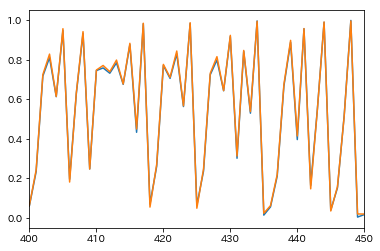

TEST


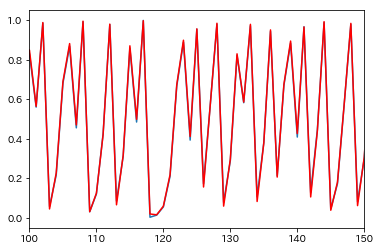

In [148]:
pre_train_1bp_lg= model_10.predict1(g_log)
y1_index_tr = pre_select(size_log,h_log,pre_train_1bp_lg)
pre_train_1bp_lg = pre_train_1bp_lg[y1_index_tr]
Y_train_1bp_lg = (h_log)
pred_train_1bp_lg= pre_train_1bp_lg

pre_test_1bp_lg =  model_10.predict1(pre_g_log)
y1_index_te = pre_select(size_log,pre_h_log,pre_test_1bp_lg)
pre_test_1bp_lg = pre_test_1bp_lg[y1_index_te]
Y_test_1bp_lg = (pre_h_log)
pred_test_1bp_lg = (pre_test_1bp_lg)
print("TRAIN")
print("MSE_test",mean_squared_error(Y_test_1bp_lg, pre_test_1bp_lg))
print("MSE_train",mean_squared_error(Y_train_1bp_lg, pre_train_1bp_lg))

plt.plot(Y_train_1bp_lg)
plt.plot(pred_train_1bp_lg)
plt.xlim(400,450)
plt.show()
print("TEST")
plt.plot(Y_test_1bp_lg)
plt.plot(pred_test_1bp_lg , color = 'r')
plt.xlim(100,150)
#plt.savefig('image/jpybnp_MLPPSO_mlp_predict_test_400-500.png')
plt.show()

Test
Logi_Test_shape: (198,)


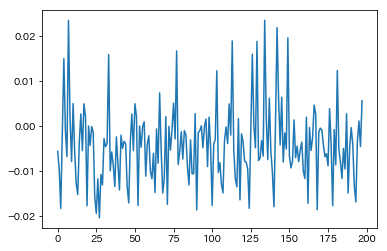

Train
Logi_Train_shape: (798,)


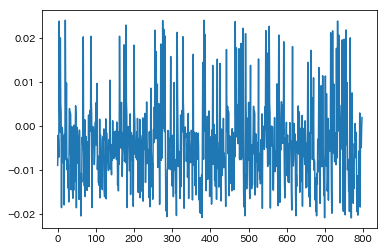

In [149]:
error_lg_1bp,te_error_lg_1bp = make_error(h_log,pre_h_log,pre_train_1bp_lg,pre_test_1bp_lg)
print("Test")

print("Logi_Test_shape:",np.array(te_error_lg_1bp).shape)
plt.plot(te_error_lg_1bp)
#pyplot.xlim(1000,1050)
#plt.savefig('image/jpybnp_MLPPSO_mlp_error_test.png')
plt.show()
print("Train")
print("Logi_Train_shape:",np.array(error_lg_1bp).shape)
plt.plot(error_lg_1bp)
#plt.savefig('image/jpybnp_MLPPSO_mlp_error_train.png')
plt.show()

train.shape (810, 1)
test.shape (210, 1)
error_ (798,)
t_error_ (198,)
train_X_bp.shape (798, 12)
test_X_bp.shape (198, 12)
train_Y_bp (798,)
test_Y_bp (198,)


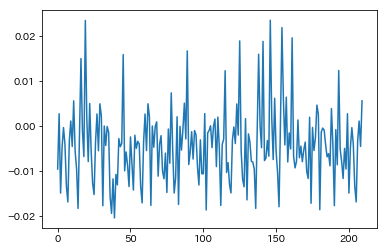

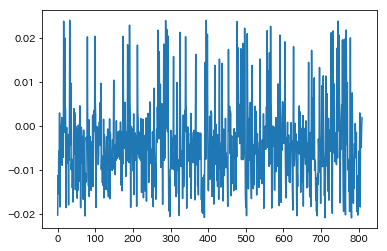

In [150]:
window_size_lg = 12

test_data_lg_1bp = []
train_data_lg_1bp =[]

test_data_lg_1bp,train_data_lg_1bp = error_dataset(window_size_lg,te_error_lg_1bp,error_lg_1bp)
print("train.shape",train_data_lg_1bp.shape)
print("test.shape",test_data_lg_1bp.shape)
print("error_",np.array(error_lg_1bp).shape)
print("t_error_",np.array(te_error_lg_1bp).shape)

train_X_lg_1bp,train_Y_lg_1bp = make_dataset(train_data_lg_1bp,window_size_lg)
test_X_lg_1bp,test_Y_lg_1bp = make_dataset(test_data_lg_1bp,window_size_lg)
print("train_X_bp.shape",train_X_lg_1bp.shape)
print("test_X_bp.shape",test_X_lg_1bp.shape)
print("train_Y_bp",np.array(train_Y_lg_1bp).shape)
print("test_Y_bp",np.array(test_Y_lg_1bp).shape)

plt.plot(test_data_lg_1bp)
plt.show()
plt.plot(train_data_lg_1bp)
plt.show()

In [151]:
train_X_lg_1bp_std = make_std(train_X_lg_1bp)
train_Y_lg_1bp_std = make_std(train_Y_lg_1bp)
test_X_lg_1bp_std = make_std(test_X_lg_1bp)
test_Y_lg_1bp_std = make_std(test_Y_lg_1bp)

## 2-PSO

In [133]:
best_nn_lg_2p = pso(train_X_lg_1bp_std,train_Y_lg_1bp_std,phi_g_=1.4955,phi_p_=1.4955,size_lg_=50)

self.X :  (50, 141)
S.shape (50,)
(0, 9.009408627426728)
(2, 2.4024385646303927)
(3, 0.04250665232459692)
(9, 0.04123661484007556)
(19, 0.04117928559980862)
(34, 0.04112743695957573)
(38, 0.04099627262376289)
(39, 0.04094830893270574)
(53, 0.04090279749072992)
(59, 0.040894237674289666)
(64, 0.040882844752115226)
(66, 0.040830725016193024)
(73, 0.04082088244563404)
(81, 0.04080031871583761)
(87, 0.040768683998279404)
(88, 0.04075991543470674)
(91, 0.040724937886697544)
(93, 0.04072279828015168)
(96, 0.040631103765856075)
100
(101, 0.04054873057992004)
(111, 0.04049583581197326)
(119, 0.040492262101993776)
(121, 0.04047066055593772)
(129, 0.04046757461835553)
(130, 0.04043679752955449)
(133, 0.040412373467199406)
(135, 0.0403794120190558)
(136, 0.040319945118728516)
(137, 0.04031299848106831)
(140, 0.040310468112777324)
(149, 0.040308876515964154)
(150, 0.04028887925609102)
(153, 0.0402586626284015)
(155, 0.040225042594884144)
(162, 0.04020101253440836)
(163, 0.040199489907283226)
(166,

(753, 0.037238366668030584)
(762, 0.037236597906668424)
(763, 0.0372165905007844)
(764, 0.037213018561913405)
(765, 0.03720944643470738)
(766, 0.0371939028254538)
(767, 0.03718908279355954)
(768, 0.0371850763773326)
(769, 0.037181717674166025)
(770, 0.03717656798259471)
(771, 0.037163964862384116)
(772, 0.0371564733232258)
(773, 0.03714713258830823)
(774, 0.037144021524717574)
(776, 0.03713784885158767)
(777, 0.037131920228276515)
(778, 0.037124018111009405)
(784, 0.037122807945724264)
(786, 0.037119150755961935)
(787, 0.03711373986832822)
(788, 0.03708930694567708)
(789, 0.037055391927837716)
(790, 0.03705438537061699)
(791, 0.03700064769238702)
(792, 0.03696484168461712)
(795, 0.036962179350942606)
(796, 0.03696204869809553)
(797, 0.03688521860402213)
(799, 0.03684163976314454)
(800, 0.03679005463883118)
(801, 0.03675807974955781)
(803, 0.036726038420072285)
(805, 0.03670004850819585)
(806, 0.036671326564519574)
(809, 0.03666042333389211)
(814, 0.03665666171988318)
(815, 0.0366388447

(1261, 0.0349146850570669)
(1262, 0.03491259878587852)
(1263, 0.03490961423862047)
(1265, 0.03490632980489125)
(1266, 0.034905929451743554)
(1267, 0.034894061762930056)
(1269, 0.03489104217408868)
(1271, 0.034879474545892235)
(1274, 0.03487381228594627)
(1276, 0.03487278231151411)
(1278, 0.03486676274335631)
(1279, 0.03485845477642834)
(1281, 0.0348522095852194)
(1282, 0.03485066259901342)
(1283, 0.0348407468621082)
(1284, 0.03483375557062637)
(1285, 0.03480302019613564)
(1288, 0.034800640549348054)
(1291, 0.03479259514705404)
(1292, 0.03478136316039841)
(1293, 0.034772022460135256)
(1294, 0.03476637229900872)
(1295, 0.03474288294328225)
(1296, 0.034724251281285735)
(1297, 0.034721969618813305)
(1298, 0.03471734803637692)
1300
(1303, 0.03470863774551368)
(1306, 0.034694390267556725)
(1308, 0.034686132915366506)
(1314, 0.03468428734276096)
(1315, 0.03468410557848142)
(1317, 0.034681083568912134)
(1318, 0.03467869331114022)
(1320, 0.034678470266223144)
(1321, 0.03466120411711565)
(1322, 

(1806, 0.03282970220969041)
(1808, 0.032828245858071564)
(1809, 0.032825937959469254)
(1813, 0.032824464973589186)
(1814, 0.03282436439085855)
(1816, 0.0328241471445327)
(1817, 0.032818751276163835)
(1818, 0.03281871902036396)
(1819, 0.03281642832081226)
(1820, 0.0328160423548768)
(1822, 0.0328126191875114)
(1823, 0.03280953571376425)
(1824, 0.03280687292384372)
(1825, 0.0328035377753425)
(1826, 0.0328034464480144)
(1827, 0.03280274364696144)
(1831, 0.032801443828746064)
(1835, 0.0327978418108711)
(1836, 0.032796921550520004)
(1838, 0.032795298923499104)
(1839, 0.032790032425682465)
(1841, 0.032789640947326594)
(1843, 0.032787164716031054)
(1845, 0.032786610018865674)
(1847, 0.03278359578748721)
(1849, 0.03277730606889715)
(1851, 0.03277160381269401)
(1852, 0.032770953115098526)
(1853, 0.03277089991098642)
(1854, 0.03276725530156299)
(1856, 0.03276435270755261)
(1858, 0.032763284961997804)
(1859, 0.032762184101957116)
(1861, 0.032760853347215776)
(1862, 0.03276037252451875)
(1863, 0.03

(2280, 0.03222998668334091)
(2282, 0.03222881181108523)
(2283, 0.032226487180841826)
(2284, 0.03222460654856863)
(2286, 0.03221932310111718)
(2288, 0.0322186836144168)
(2289, 0.032215986606173794)
(2290, 0.032212430124066084)
(2291, 0.032211181660918804)
(2294, 0.032208102781948945)
(2295, 0.03220521722295702)
(2296, 0.032204104001398774)
(2297, 0.032200197411389506)
(2298, 0.032196151370779684)
(2299, 0.03219052875659154)
(2300, 0.032189001855192266)
(2301, 0.0321831329513451)
(2302, 0.03218288563505428)
(2303, 0.032181289129040724)
(2304, 0.03217703845451174)
(2306, 0.032172108113463355)
(2309, 0.03217158541453647)
(2310, 0.032171070596464665)
(2312, 0.03216543066033368)
(2314, 0.0321615062368724)
(2316, 0.03216043090585826)
(2317, 0.03215469805351591)
(2322, 0.03215459857699322)
(2323, 0.032153011075795816)
(2325, 0.03215181279601945)
(2328, 0.03215067716493307)
(2329, 0.03214941400221123)
(2330, 0.03214760560123911)
(2333, 0.032144277731818625)
(2334, 0.03214171930920136)
(2335, 0.

(2808, 0.031104061068585015)
(2809, 0.031098048582232696)
(2810, 0.03109242727946882)
(2813, 0.031090812180346834)
(2815, 0.031087634144331334)
(2817, 0.03108543518946861)
(2821, 0.03108457343031608)
(2823, 0.031084127312532416)
(2824, 0.031084041579382705)
(2825, 0.031082750329151955)
(2826, 0.031079504860908127)
(2827, 0.03107212284571741)
(2828, 0.03106535561285675)
(2829, 0.0310547790830836)
(2833, 0.031049780978274516)
(2837, 0.03104629266530518)
(2838, 0.031045533487484765)
(2839, 0.03103718418072369)
(2840, 0.03103396664448299)
(2843, 0.031028598160274912)
(2844, 0.031025261098400342)
(2848, 0.031023977937243586)
(2850, 0.03102299828201382)
(2851, 0.031017205529135665)
(2852, 0.031014022892742087)
(2854, 0.031010467729452772)
(2855, 0.03100872994111639)
(2856, 0.03100815257623223)
(2857, 0.031005322546542133)
(2858, 0.031000860110534014)
(2859, 0.030999311598878962)
(2863, 0.03099151632395584)
(2865, 0.030990512223031175)
(2867, 0.030986127688853372)
(2868, 0.030985766319783843)

In [134]:
model_save("pbpso_error_n50e3000",best_nn_lg_2p)

In [143]:
f_2 = open("model/n10/pbpso_error_n10e3000.binaryfile","rb")
best_nn_lg_2p = pickle.load(f_2)

Train
MSE_train 7.333921338695323e-05


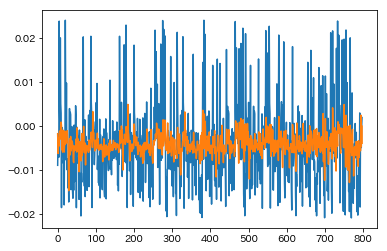

Test
MSE_test 7.593666722675422e-05


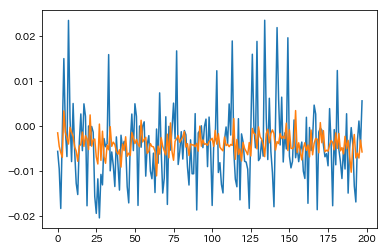

In [152]:
pre_train_bpps_lg_2ps= best_nn_lg_2p.run(train_X_lg_1bp_std).T
pre_test_bpps_lg_2ps= best_nn_lg_2p.run(test_X_lg_1bp_std).T
pre_x_lg_bpps_tre = remake_std(pre_train_bpps_lg_2ps,train_Y_lg_1bp)
pre_x_lg_bpps_tes = remake_std(pre_test_bpps_lg_2ps,test_Y_lg_1bp)

print("Train")
print("MSE_train",mean_squared_error(train_Y_lg_1bp,pre_x_lg_bpps_tre))
plt.plot(train_Y_lg_1bp)
plt.plot(pre_x_lg_bpps_tre)
#plt.xlim(400,500)
#plt.savefig('image/jpybnp_MLPPSO_pso_predict_train.png')
#plt.savefig('image/Hybrid/log_train_error_bppso_n50.png')

plt.show()
print("Test")
print("MSE_test",mean_squared_error(test_Y_lg_1bp, pre_x_lg_bpps_tes))
plt.plot(test_Y_lg_1bp)
plt.plot(pre_x_lg_bpps_tes)
#plt.xlim(100,150)
#plt.savefig('image/jpybnp_MLPPSO_pso_predict_test.png')
#plt.savefig('image/Hybrid/log_test_error_bppso_n50.png')

plt.show()

In [814]:
train_X_lg_1bp_std.shape[1]

12

## 2-BP

In [155]:
size_error = 10


In [137]:
model_1_error = MLP(train_X_lg_1bp_std,train_Y_lg_1bp_std,12,10,1,num=size_error,max_epoch=3000)

W1 (50, 12, 10)
b1 (10,)
2
W.shape (50, 12, 10)
2
W.shape (50, 10, 1)
params (4,)
params[0].shape (50, 12, 10) -> W1
params[1].shape (10,) -> b1
params[2].shape (50, 10, 1) -> W2
params[3].shape (1,) -> b2
grads (4,)
grads[0].shape (50, 12, 10) -> W1
grads[1].shape (10,) -> b1
grads[2].shape (50, 10, 1) -> W2
grads[3].shape (1,) -> b2
total_loss 33.30608932112703
| epoch 1 | loss 0.041736954
----------------------------------------------
total_loss 33.46377636737122
| epoch 2 | loss 0.041934557
----------------------------------------------
total_loss 33.37579278747521
| epoch 3 | loss 0.041824302
----------------------------------------------
total_loss 33.29474485063061
| epoch 4 | loss 0.041722738
----------------------------------------------
total_loss 33.34968834688216
| epoch 5 | loss 0.041791589
----------------------------------------------
total_loss 33.21221312941863
| epoch 6 | loss 0.041619315
----------------------------------------------
total_loss 33.06075116527249
| ep

total_loss 29.945558762112398
| epoch 75 | loss 0.037525763
----------------------------------------------
total_loss 29.62116620713555
| epoch 76 | loss 0.037119256
----------------------------------------------
total_loss 29.91512815807199
| epoch 77 | loss 0.037487629
----------------------------------------------
total_loss 29.905216031692888
| epoch 78 | loss 0.037475208
----------------------------------------------
total_loss 29.900048839025168
| epoch 79 | loss 0.037468733
----------------------------------------------
total_loss 29.81553940028863
| epoch 80 | loss 0.037362831
----------------------------------------------
total_loss 29.69351497533067
| epoch 81 | loss 0.037209919
----------------------------------------------
total_loss 29.863690637207988
| epoch 82 | loss 0.037423171
----------------------------------------------
total_loss 29.91684406296676
| epoch 83 | loss 0.037489780
----------------------------------------------
total_loss 29.85558934683338
| epoch 84 | 

total_loss 27.941443396554074
| epoch 152 | loss 0.035014340
----------------------------------------------
total_loss 27.91804590007421
| epoch 153 | loss 0.034985020
----------------------------------------------
total_loss 27.901250015862043
| epoch 154 | loss 0.034963972
----------------------------------------------
total_loss 27.826768126889768
| epoch 155 | loss 0.034870637
----------------------------------------------
total_loss 27.504464098529038
| epoch 156 | loss 0.034466747
----------------------------------------------
total_loss 27.925865180912954
| epoch 157 | loss 0.034994819
----------------------------------------------
total_loss 27.58259819466007
| epoch 158 | loss 0.034564659
----------------------------------------------
total_loss 27.71869010938905
| epoch 159 | loss 0.034735201
----------------------------------------------
total_loss 27.747950261251393
| epoch 160 | loss 0.034771867
----------------------------------------------
total_loss 27.482240037144145
|

total_loss 25.91259961512657
| epoch 229 | loss 0.032471929
----------------------------------------------
total_loss 25.93414964721484
| epoch 230 | loss 0.032498934
----------------------------------------------
total_loss 26.050705762316326
| epoch 231 | loss 0.032644995
----------------------------------------------
total_loss 25.83740018378522
| epoch 232 | loss 0.032377694
----------------------------------------------
total_loss 26.042169588368303
| epoch 233 | loss 0.032634298
----------------------------------------------
total_loss 25.768987934534408
| epoch 234 | loss 0.032291965
----------------------------------------------
total_loss 25.699133703267606
| epoch 235 | loss 0.032204428
----------------------------------------------
total_loss 25.894517866641962
| epoch 236 | loss 0.032449271
----------------------------------------------
total_loss 25.620892487672595
| epoch 237 | loss 0.032106382
----------------------------------------------
total_loss 26.150058932750976
|

total_loss 24.220500695120478
| epoch 306 | loss 0.030351505
----------------------------------------------
total_loss 24.161576111583965
| epoch 307 | loss 0.030277664
----------------------------------------------
total_loss 24.03240485855127
| epoch 308 | loss 0.030115796
----------------------------------------------
total_loss 24.266003285264805
| epoch 309 | loss 0.030408525
----------------------------------------------
total_loss 24.033728124941508
| epoch 310 | loss 0.030117454
----------------------------------------------
total_loss 24.085454945667912
| epoch 311 | loss 0.030182274
----------------------------------------------
total_loss 23.705777405181124
| epoch 312 | loss 0.029706488
----------------------------------------------
total_loss 24.077732495788368
| epoch 313 | loss 0.030172597
----------------------------------------------
total_loss 23.924310493394792
| epoch 314 | loss 0.029980339
----------------------------------------------
total_loss 23.750394745442225

total_loss 22.440993619236416
| epoch 383 | loss 0.028121546
----------------------------------------------
total_loss 22.226614311909575
| epoch 384 | loss 0.027852900
----------------------------------------------
total_loss 22.311913833448152
| epoch 385 | loss 0.027959792
----------------------------------------------
total_loss 22.05037390323634
| epoch 386 | loss 0.027632047
----------------------------------------------
total_loss 22.359806250929907
| epoch 387 | loss 0.028019807
----------------------------------------------
total_loss 22.029724888946657
| epoch 388 | loss 0.027606172
----------------------------------------------
total_loss 22.329621438407084
| epoch 389 | loss 0.027981982
----------------------------------------------
total_loss 22.43786772299306
| epoch 390 | loss 0.028117629
----------------------------------------------
total_loss 22.35089541108102
| epoch 391 | loss 0.028008641
----------------------------------------------
total_loss 22.277297992301197
|

total_loss 21.53510640578906
| epoch 460 | loss 0.026986349
----------------------------------------------
total_loss 21.075111039938957
| epoch 461 | loss 0.026409914
----------------------------------------------
total_loss 20.86890487061043
| epoch 462 | loss 0.026151510
----------------------------------------------
total_loss 21.119024968998612
| epoch 463 | loss 0.026464944
----------------------------------------------
total_loss 21.11422652095392
| epoch 464 | loss 0.026458930
----------------------------------------------
total_loss 21.206292348619037
| epoch 465 | loss 0.026574301
----------------------------------------------
total_loss 21.142989938086266
| epoch 466 | loss 0.026494975
----------------------------------------------
total_loss 21.022175750600706
| epoch 467 | loss 0.026343579
----------------------------------------------
total_loss 20.926458721841705
| epoch 468 | loss 0.026223632
----------------------------------------------
total_loss 21.16813511785319
| 

total_loss 19.571638883433746
| epoch 537 | loss 0.024525863
----------------------------------------------
total_loss 19.42134513552424
| epoch 538 | loss 0.024337525
----------------------------------------------
total_loss 19.470873195986087
| epoch 539 | loss 0.024399590
----------------------------------------------
total_loss 19.392691073977243
| epoch 540 | loss 0.024301618
----------------------------------------------
total_loss 19.629712924928523
| epoch 541 | loss 0.024598638
----------------------------------------------
total_loss 19.381627391183326
| epoch 542 | loss 0.024287754
----------------------------------------------
total_loss 19.10921763806565
| epoch 543 | loss 0.023946388
----------------------------------------------
total_loss 20.075646247545667
| epoch 544 | loss 0.025157451
----------------------------------------------
total_loss 19.12589152949165
| epoch 545 | loss 0.023967283
----------------------------------------------
total_loss 18.911095618812045
|

total_loss 18.55394004363747
| epoch 614 | loss 0.023250551
----------------------------------------------
total_loss 18.4473351914706
| epoch 615 | loss 0.023116961
----------------------------------------------
total_loss 18.034827941448885
| epoch 616 | loss 0.022600035
----------------------------------------------
total_loss 18.574907261590983
| epoch 617 | loss 0.023276826
----------------------------------------------
total_loss 18.147709366631712
| epoch 618 | loss 0.022741490
----------------------------------------------
total_loss 19.092379328503863
| epoch 619 | loss 0.023925287
----------------------------------------------
total_loss 18.416534560270886
| epoch 620 | loss 0.023078364
----------------------------------------------
total_loss 18.355711857795264
| epoch 621 | loss 0.023002145
----------------------------------------------
total_loss 18.25500925489122
| epoch 622 | loss 0.022875951
----------------------------------------------
total_loss 18.319022380609972
| 

total_loss 17.92580029918913
| epoch 691 | loss 0.022463409
----------------------------------------------
total_loss 17.826681340243823
| epoch 692 | loss 0.022339200
----------------------------------------------
total_loss 17.81986162782394
| epoch 693 | loss 0.022330654
----------------------------------------------
total_loss 17.99517775835559
| epoch 694 | loss 0.022550348
----------------------------------------------
total_loss 17.672910306268857
| epoch 695 | loss 0.022146504
----------------------------------------------
total_loss 18.063800682619128
| epoch 696 | loss 0.022636342
----------------------------------------------
total_loss 17.608076791203107
| epoch 697 | loss 0.022065259
----------------------------------------------
total_loss 17.796136203839133
| epoch 698 | loss 0.022300923
----------------------------------------------
total_loss 17.54851324607402
| epoch 699 | loss 0.021990618
----------------------------------------------
total_loss 17.93285994953457
| e

total_loss 17.133868113400304
| epoch 768 | loss 0.021471013
----------------------------------------------
total_loss 17.66268656164452
| epoch 769 | loss 0.022133692
----------------------------------------------
total_loss 17.613305742060092
| epoch 770 | loss 0.022071812
----------------------------------------------
total_loss 16.95228328554798
| epoch 771 | loss 0.021243463
----------------------------------------------
total_loss 17.083924353745687
| epoch 772 | loss 0.021408427
----------------------------------------------
total_loss 17.35061979249006
| epoch 773 | loss 0.021742631
----------------------------------------------
total_loss 17.146637957901426
| epoch 774 | loss 0.021487015
----------------------------------------------
total_loss 17.512978091548327
| epoch 775 | loss 0.021946088
----------------------------------------------
total_loss 17.610700220266594
| epoch 776 | loss 0.022068547
----------------------------------------------
total_loss 17.059956748285586
|

total_loss 16.81860996568202
| epoch 845 | loss 0.021075952
----------------------------------------------
total_loss 16.78860373516365
| epoch 846 | loss 0.021038351
----------------------------------------------
total_loss 16.66990431578885
| epoch 847 | loss 0.020889604
----------------------------------------------
total_loss 17.163364433501066
| epoch 848 | loss 0.021507975
----------------------------------------------
total_loss 16.636732627383644
| epoch 849 | loss 0.020848036
----------------------------------------------
total_loss 16.970744342014438
| epoch 850 | loss 0.021266597
----------------------------------------------
total_loss 16.945472275443024
| epoch 851 | loss 0.021234928
----------------------------------------------
total_loss 16.995547927761862
| epoch 852 | loss 0.021297679
----------------------------------------------
total_loss 17.045770434190928
| epoch 853 | loss 0.021360615
----------------------------------------------
total_loss 16.996027431492312
|

total_loss 16.503657494076627
| epoch 922 | loss 0.020681275
----------------------------------------------
total_loss 17.021939405954907
| epoch 923 | loss 0.021330751
----------------------------------------------
total_loss 16.466809173762872
| epoch 924 | loss 0.020635099
----------------------------------------------
total_loss 16.61234825823625
| epoch 925 | loss 0.020817479
----------------------------------------------
total_loss 16.694460861401563
| epoch 926 | loss 0.020920377
----------------------------------------------
total_loss 16.72214289050158
| epoch 927 | loss 0.020955066
----------------------------------------------
total_loss 16.533051825501754
| epoch 928 | loss 0.020718110
----------------------------------------------
total_loss 16.57012630445159
| epoch 929 | loss 0.020764569
----------------------------------------------
total_loss 16.473981691487527
| epoch 930 | loss 0.020644087
----------------------------------------------
total_loss 16.68361646982911
| 

total_loss 16.622335333001484
| epoch 999 | loss 0.020829994
----------------------------------------------
total_loss 16.373285701693042
| epoch 1000 | loss 0.020517902
----------------------------------------------
total_loss 16.17546820380172
| epoch 1001 | loss 0.020270010
----------------------------------------------
total_loss 16.760247427578562
| epoch 1002 | loss 0.021002816
----------------------------------------------
total_loss 16.316670492284192
| epoch 1003 | loss 0.020446956
----------------------------------------------
total_loss 16.33641396037909
| epoch 1004 | loss 0.020471697
----------------------------------------------
total_loss 16.104655131575537
| epoch 1005 | loss 0.020181272
----------------------------------------------
total_loss 16.42783257923241
| epoch 1006 | loss 0.020586256
----------------------------------------------
total_loss 16.34098306949398
| epoch 1007 | loss 0.020477422
----------------------------------------------
total_loss 16.3233063377

total_loss 15.97055591234804
| epoch 1075 | loss 0.020013228
----------------------------------------------
total_loss 16.323099537765795
| epoch 1076 | loss 0.020455012
----------------------------------------------
total_loss 15.751479712976401
| epoch 1077 | loss 0.019738696
----------------------------------------------
total_loss 16.52792082195921
| epoch 1078 | loss 0.020711680
----------------------------------------------
total_loss 16.238278749541227
| epoch 1079 | loss 0.020348720
----------------------------------------------
total_loss 16.21761702582968
| epoch 1080 | loss 0.020322828
----------------------------------------------
total_loss 16.16215492012085
| epoch 1081 | loss 0.020253327
----------------------------------------------
total_loss 16.005839969577835
| epoch 1082 | loss 0.020057444
----------------------------------------------
total_loss 16.367512070279435
| epoch 1083 | loss 0.020510667
----------------------------------------------
total_loss 15.613819245

total_loss 15.774720812699101
| epoch 1151 | loss 0.019767821
----------------------------------------------
total_loss 16.164736525504704
| epoch 1152 | loss 0.020256562
----------------------------------------------
total_loss 15.877351420562324
| epoch 1153 | loss 0.019896430
----------------------------------------------
total_loss 16.116375198098716
| epoch 1154 | loss 0.020195959
----------------------------------------------
total_loss 16.15191457540551
| epoch 1155 | loss 0.020240494
----------------------------------------------
total_loss 15.682848622934669
| epoch 1156 | loss 0.019652693
----------------------------------------------
total_loss 15.983740705419981
| epoch 1157 | loss 0.020029750
----------------------------------------------
total_loss 16.169228348174535
| epoch 1158 | loss 0.020262191
----------------------------------------------
total_loss 16.168986877413566
| epoch 1159 | loss 0.020261888
----------------------------------------------
total_loss 15.761950

total_loss 16.113797228803154
| epoch 1227 | loss 0.020192728
----------------------------------------------
total_loss 15.55079894234166
| epoch 1228 | loss 0.019487217
----------------------------------------------
total_loss 16.314866764974923
| epoch 1229 | loss 0.020444695
----------------------------------------------
total_loss 15.800120110948146
| epoch 1230 | loss 0.019799649
----------------------------------------------
total_loss 15.954620952259926
| epoch 1231 | loss 0.019993259
----------------------------------------------
total_loss 16.025040177070174
| epoch 1232 | loss 0.020081504
----------------------------------------------
total_loss 15.847935366107851
| epoch 1233 | loss 0.019859568
----------------------------------------------
total_loss 15.908280811607177
| epoch 1234 | loss 0.019935189
----------------------------------------------
total_loss 15.835617262330326
| epoch 1235 | loss 0.019844132
----------------------------------------------
total_loss 16.136102

total_loss 15.523529216856495
| epoch 1303 | loss 0.019453044
----------------------------------------------
total_loss 15.879107593813336
| epoch 1304 | loss 0.019898631
----------------------------------------------
total_loss 15.850398066384487
| epoch 1305 | loss 0.019862654
----------------------------------------------
total_loss 15.986648507657168
| epoch 1306 | loss 0.020033394
----------------------------------------------
total_loss 15.619135050859406
| epoch 1307 | loss 0.019572851
----------------------------------------------
total_loss 15.506039683959962
| epoch 1308 | loss 0.019431127
----------------------------------------------
total_loss 15.895150348946466
| epoch 1309 | loss 0.019918735
----------------------------------------------
total_loss 15.672108001788276
| epoch 1310 | loss 0.019639233
----------------------------------------------
total_loss 15.827859625885269
| epoch 1311 | loss 0.019834411
----------------------------------------------
total_loss 15.63337

total_loss 15.861594503832219
| epoch 1379 | loss 0.019876685
----------------------------------------------
total_loss 15.42047366804222
| epoch 1380 | loss 0.019323902
----------------------------------------------
total_loss 15.721927818538482
| epoch 1381 | loss 0.019701664
----------------------------------------------
total_loss 15.364392801549167
| epoch 1382 | loss 0.019253625
----------------------------------------------
total_loss 15.736570502502094
| epoch 1383 | loss 0.019720013
----------------------------------------------
total_loss 15.414146290706341
| epoch 1384 | loss 0.019315973
----------------------------------------------
total_loss 15.657729867350533
| epoch 1385 | loss 0.019621215
----------------------------------------------
total_loss 15.73966923684541
| epoch 1386 | loss 0.019723896
----------------------------------------------
total_loss 15.633948937198744
| epoch 1387 | loss 0.019591415
----------------------------------------------
total_loss 15.6220949

total_loss 15.32038729245037
| epoch 1455 | loss 0.019198480
----------------------------------------------
total_loss 15.423624556006368
| epoch 1456 | loss 0.019327850
----------------------------------------------
total_loss 15.705357656877895
| epoch 1457 | loss 0.019680899
----------------------------------------------
total_loss 15.622124662874311
| epoch 1458 | loss 0.019576597
----------------------------------------------
total_loss 15.436437024438236
| epoch 1459 | loss 0.019343906
----------------------------------------------
total_loss 15.66911756226555
| epoch 1460 | loss 0.019635486
----------------------------------------------
total_loss 15.448890181924229
| epoch 1461 | loss 0.019359512
----------------------------------------------
total_loss 15.604134224227439
| epoch 1462 | loss 0.019554053
----------------------------------------------
total_loss 15.562942770096205
| epoch 1463 | loss 0.019502435
----------------------------------------------
total_loss 15.5006962

total_loss 15.328907008401053
| epoch 1531 | loss 0.019209157
----------------------------------------------
total_loss 15.765521127044181
| epoch 1532 | loss 0.019756292
----------------------------------------------
total_loss 15.434282386339254
| epoch 1533 | loss 0.019341206
----------------------------------------------
total_loss 15.33067531992863
| epoch 1534 | loss 0.019211373
----------------------------------------------
total_loss 15.492079148795092
| epoch 1535 | loss 0.019413633
----------------------------------------------
total_loss 15.566171064797903
| epoch 1536 | loss 0.019506480
----------------------------------------------
total_loss 15.076489882844234
| epoch 1537 | loss 0.018892844
----------------------------------------------
total_loss 15.780265257040625
| epoch 1538 | loss 0.019774768
----------------------------------------------
total_loss 15.475327365086443
| epoch 1539 | loss 0.019392641
----------------------------------------------
total_loss 15.685319

total_loss 15.655612502507724
| epoch 1607 | loss 0.019618562
----------------------------------------------
total_loss 15.389049190665691
| epoch 1608 | loss 0.019284523
----------------------------------------------
total_loss 15.247659860793714
| epoch 1609 | loss 0.019107343
----------------------------------------------
total_loss 15.51248212875205
| epoch 1610 | loss 0.019439201
----------------------------------------------
total_loss 15.310384355317423
| epoch 1611 | loss 0.019185945
----------------------------------------------
total_loss 15.46505574771328
| epoch 1612 | loss 0.019379769
----------------------------------------------
total_loss 15.50451322364553
| epoch 1613 | loss 0.019429215
----------------------------------------------
total_loss 15.377052602978173
| epoch 1614 | loss 0.019269489
----------------------------------------------
total_loss 15.337996367385912
| epoch 1615 | loss 0.019220547
----------------------------------------------
total_loss 15.57085249

total_loss 15.28535320778967
| epoch 1683 | loss 0.019154578
----------------------------------------------
total_loss 15.456215554015662
| epoch 1684 | loss 0.019368691
----------------------------------------------
total_loss 15.345311550654841
| epoch 1685 | loss 0.019229714
----------------------------------------------
total_loss 15.091858475346285
| epoch 1686 | loss 0.018912103
----------------------------------------------
total_loss 15.28166049309286
| epoch 1687 | loss 0.019149950
----------------------------------------------
total_loss 15.58970749819149
| epoch 1688 | loss 0.019535974
----------------------------------------------
total_loss 15.174177260667976
| epoch 1689 | loss 0.019015260
----------------------------------------------
total_loss 15.380405970634959
| epoch 1690 | loss 0.019273692
----------------------------------------------
total_loss 15.493215513580308
| epoch 1691 | loss 0.019415057
----------------------------------------------
total_loss 15.30481815

total_loss 15.356953031099442
| epoch 1759 | loss 0.019244302
----------------------------------------------
total_loss 15.454480381378271
| epoch 1760 | loss 0.019366517
----------------------------------------------
total_loss 15.491165427688689
| epoch 1761 | loss 0.019412488
----------------------------------------------
total_loss 15.179822772598127
| epoch 1762 | loss 0.019022334
----------------------------------------------
total_loss 15.396657393234129
| epoch 1763 | loss 0.019294057
----------------------------------------------
total_loss 14.78929424687435
| epoch 1764 | loss 0.018532950
----------------------------------------------
total_loss 15.53340769653979
| epoch 1765 | loss 0.019465423
----------------------------------------------
total_loss 15.417984229711786
| epoch 1766 | loss 0.019320782
----------------------------------------------
total_loss 15.342686957146247
| epoch 1767 | loss 0.019226425
----------------------------------------------
total_loss 15.4136954

total_loss 15.460708339010425
| epoch 1835 | loss 0.019374321
----------------------------------------------
total_loss 15.280686446637246
| epoch 1836 | loss 0.019148730
----------------------------------------------
total_loss 15.342512093194888
| epoch 1837 | loss 0.019226206
----------------------------------------------
total_loss 15.411130847940377
| epoch 1838 | loss 0.019312194
----------------------------------------------
total_loss 15.326999687243429
| epoch 1839 | loss 0.019206767
----------------------------------------------
total_loss 15.5151716435479
| epoch 1840 | loss 0.019442571
----------------------------------------------
total_loss 15.408607487128883
| epoch 1841 | loss 0.019309032
----------------------------------------------
total_loss 15.218678653982977
| epoch 1842 | loss 0.019071026
----------------------------------------------
total_loss 15.524539481494873
| epoch 1843 | loss 0.019454310
----------------------------------------------
total_loss 15.1269109

total_loss 15.418879754854283
| epoch 1911 | loss 0.019321904
----------------------------------------------
total_loss 15.308799696173304
| epoch 1912 | loss 0.019183960
----------------------------------------------
total_loss 15.16933890860906
| epoch 1913 | loss 0.019009197
----------------------------------------------
total_loss 15.244262736040138
| epoch 1914 | loss 0.019103086
----------------------------------------------
total_loss 15.042542860775667
| epoch 1915 | loss 0.018850304
----------------------------------------------
total_loss 15.175375274775059
| epoch 1916 | loss 0.019016761
----------------------------------------------
total_loss 14.969023008478802
| epoch 1917 | loss 0.018758174
----------------------------------------------
total_loss 15.495538817486775
| epoch 1918 | loss 0.019417968
----------------------------------------------
total_loss 15.081173351470122
| epoch 1919 | loss 0.018898713
----------------------------------------------
total_loss 14.976056

total_loss 15.235948187730566
| epoch 1987 | loss 0.019092667
----------------------------------------------
total_loss 15.126529998728632
| epoch 1988 | loss 0.018955551
----------------------------------------------
total_loss 15.044038051982856
| epoch 1989 | loss 0.018852178
----------------------------------------------
total_loss 14.89559532861633
| epoch 1990 | loss 0.018666160
----------------------------------------------
total_loss 15.171904256478031
| epoch 1991 | loss 0.019012411
----------------------------------------------
total_loss 14.925340584390291
| epoch 1992 | loss 0.018703434
----------------------------------------------
total_loss 15.300138433275558
| epoch 1993 | loss 0.019173106
----------------------------------------------
total_loss 15.414953891047597
| epoch 1994 | loss 0.019316985
----------------------------------------------
total_loss 15.112774190148883
| epoch 1995 | loss 0.018938314
----------------------------------------------
total_loss 15.157381

total_loss 15.134951850421507
| epoch 2063 | loss 0.018966105
----------------------------------------------
total_loss 14.905505614301278
| epoch 2064 | loss 0.018678578
----------------------------------------------
total_loss 14.667150389557642
| epoch 2065 | loss 0.018379888
----------------------------------------------
total_loss 15.01700384539557
| epoch 2066 | loss 0.018818301
----------------------------------------------
total_loss 14.796477211540504
| epoch 2067 | loss 0.018541951
----------------------------------------------
total_loss 15.025265856422802
| epoch 2068 | loss 0.018828654
----------------------------------------------
total_loss 15.247827246838861
| epoch 2069 | loss 0.019107553
----------------------------------------------
total_loss 15.106642158162302
| epoch 2070 | loss 0.018930629
----------------------------------------------
total_loss 14.97134500148464
| epoch 2071 | loss 0.018761084
----------------------------------------------
total_loss 14.8184371

total_loss 14.946080604924013
| epoch 2139 | loss 0.018729424
----------------------------------------------
total_loss 15.191598092338724
| epoch 2140 | loss 0.019037090
----------------------------------------------
total_loss 14.98181816902644
| epoch 2141 | loss 0.018774208
----------------------------------------------
total_loss 15.09960540567519
| epoch 2142 | loss 0.018921811
----------------------------------------------
total_loss 15.073181494161354
| epoch 2143 | loss 0.018888699
----------------------------------------------
total_loss 14.95463479537445
| epoch 2144 | loss 0.018740144
----------------------------------------------
total_loss 14.982883693586837
| epoch 2145 | loss 0.018775543
----------------------------------------------
total_loss 14.997599659795265
| epoch 2146 | loss 0.018793985
----------------------------------------------
total_loss 14.999291987302923
| epoch 2147 | loss 0.018796105
----------------------------------------------
total_loss 15.27402372

total_loss 15.177696093844373
| epoch 2215 | loss 0.019019669
----------------------------------------------
total_loss 14.720036171709879
| epoch 2216 | loss 0.018446161
----------------------------------------------
total_loss 15.209090506499198
| epoch 2217 | loss 0.019059011
----------------------------------------------
total_loss 14.765441150840292
| epoch 2218 | loss 0.018503059
----------------------------------------------
total_loss 15.085532583632157
| epoch 2219 | loss 0.018904176
----------------------------------------------
total_loss 14.810053641279678
| epoch 2220 | loss 0.018558964
----------------------------------------------
total_loss 15.325677153152988
| epoch 2221 | loss 0.019205109
----------------------------------------------
total_loss 14.630983679228486
| epoch 2222 | loss 0.018334566
----------------------------------------------
total_loss 14.85530172983917
| epoch 2223 | loss 0.018615666
----------------------------------------------
total_loss 15.041280

total_loss 15.007969944094242
| epoch 2291 | loss 0.018806980
----------------------------------------------
total_loss 14.732259967312004
| epoch 2292 | loss 0.018461479
----------------------------------------------
total_loss 14.735353793563442
| epoch 2293 | loss 0.018465356
----------------------------------------------
total_loss 14.874749923779506
| epoch 2294 | loss 0.018640037
----------------------------------------------
total_loss 14.876795254095423
| epoch 2295 | loss 0.018642601
----------------------------------------------
total_loss 15.08340090062908
| epoch 2296 | loss 0.018901505
----------------------------------------------
total_loss 14.654971654681047
| epoch 2297 | loss 0.018364626
----------------------------------------------
total_loss 14.763288541639799
| epoch 2298 | loss 0.018500362
----------------------------------------------
total_loss 15.0927327388562
| epoch 2299 | loss 0.018913199
----------------------------------------------
total_loss 15.05226409

total_loss 14.916486957834955
| epoch 2367 | loss 0.018692340
----------------------------------------------
total_loss 14.821001546281973
| epoch 2368 | loss 0.018572684
----------------------------------------------
total_loss 14.506462189890694
| epoch 2369 | loss 0.018178524
----------------------------------------------
total_loss 14.689746988728059
| epoch 2370 | loss 0.018408204
----------------------------------------------
total_loss 15.023462535988928
| epoch 2371 | loss 0.018826394
----------------------------------------------
total_loss 14.467255664301232
| epoch 2372 | loss 0.018129393
----------------------------------------------
total_loss 14.970550546264922
| epoch 2373 | loss 0.018760088
----------------------------------------------
total_loss 14.786538581992124
| epoch 2374 | loss 0.018529497
----------------------------------------------
total_loss 15.059872389782946
| epoch 2375 | loss 0.018872021
----------------------------------------------
total_loss 14.84906

total_loss 14.674837323599004
| epoch 2443 | loss 0.018389520
----------------------------------------------
total_loss 14.79125871510123
| epoch 2444 | loss 0.018535412
----------------------------------------------
total_loss 14.696448603142901
| epoch 2445 | loss 0.018416602
----------------------------------------------
total_loss 14.895656356749344
| epoch 2446 | loss 0.018666236
----------------------------------------------
total_loss 14.688444410464806
| epoch 2447 | loss 0.018406572
----------------------------------------------
total_loss 14.932751841037227
| epoch 2448 | loss 0.018712722
----------------------------------------------
total_loss 14.930445125127731
| epoch 2449 | loss 0.018709831
----------------------------------------------
total_loss 14.7440098833935
| epoch 2450 | loss 0.018476203
----------------------------------------------
total_loss 15.03672322338528
| epoch 2451 | loss 0.018843012
----------------------------------------------
total_loss 14.631895648

total_loss 14.484186759506505
| epoch 2519 | loss 0.018150610
----------------------------------------------
total_loss 14.893087374094854
| epoch 2520 | loss 0.018663017
----------------------------------------------
total_loss 14.960571799408095
| epoch 2521 | loss 0.018747584
----------------------------------------------
total_loss 14.706000006491617
| epoch 2522 | loss 0.018428571
----------------------------------------------
total_loss 14.97722542473102
| epoch 2523 | loss 0.018768453
----------------------------------------------
total_loss 14.578506140473722
| epoch 2524 | loss 0.018268805
----------------------------------------------
total_loss 14.750578310961107
| epoch 2525 | loss 0.018484434
----------------------------------------------
total_loss 14.843582903478335
| epoch 2526 | loss 0.018600981
----------------------------------------------
total_loss 14.687363149516727
| epoch 2527 | loss 0.018405217
----------------------------------------------
total_loss 14.748394

total_loss 14.71505895320329
| epoch 2595 | loss 0.018439924
----------------------------------------------
total_loss 14.976482645082
| epoch 2596 | loss 0.018767522
----------------------------------------------
total_loss 14.91047567384988
| epoch 2597 | loss 0.018684807
----------------------------------------------
total_loss 14.90343815444486
| epoch 2598 | loss 0.018675988
----------------------------------------------
total_loss 14.556685603610257
| epoch 2599 | loss 0.018241461
----------------------------------------------
total_loss 14.864769629564536
| epoch 2600 | loss 0.018627531
----------------------------------------------
total_loss 14.705872678642146
| epoch 2601 | loss 0.018428412
----------------------------------------------
total_loss 14.837677600530682
| epoch 2602 | loss 0.018593581
----------------------------------------------
total_loss 14.868139614692964
| epoch 2603 | loss 0.018631754
----------------------------------------------
total_loss 15.09341108374

total_loss 14.882451770690983
| epoch 2671 | loss 0.018649689
----------------------------------------------
total_loss 14.798373926075676
| epoch 2672 | loss 0.018544328
----------------------------------------------
total_loss 14.830788765174411
| epoch 2673 | loss 0.018584948
----------------------------------------------
total_loss 14.529569952381843
| epoch 2674 | loss 0.018207481
----------------------------------------------
total_loss 14.888402420146791
| epoch 2675 | loss 0.018657146
----------------------------------------------
total_loss 14.69763421482688
| epoch 2676 | loss 0.018418088
----------------------------------------------
total_loss 14.760689390820911
| epoch 2677 | loss 0.018497104
----------------------------------------------
total_loss 14.671131259658603
| epoch 2678 | loss 0.018384876
----------------------------------------------
total_loss 14.68227138432378
| epoch 2679 | loss 0.018398836
----------------------------------------------
total_loss 14.6395760

total_loss 14.784948066373076
| epoch 2747 | loss 0.018527504
----------------------------------------------
total_loss 14.856923649902054
| epoch 2748 | loss 0.018617699
----------------------------------------------
total_loss 14.597724226746363
| epoch 2749 | loss 0.018292888
----------------------------------------------
total_loss 14.952672128134765
| epoch 2750 | loss 0.018737684
----------------------------------------------
total_loss 14.750193509526836
| epoch 2751 | loss 0.018483952
----------------------------------------------
total_loss 14.668355718026508
| epoch 2752 | loss 0.018381398
----------------------------------------------
total_loss 14.455429889855541
| epoch 2753 | loss 0.018114574
----------------------------------------------
total_loss 14.75594183374895
| epoch 2754 | loss 0.018491155
----------------------------------------------
total_loss 14.571507557775893
| epoch 2755 | loss 0.018260035
----------------------------------------------
total_loss 14.601592

total_loss 14.251592399760815
| epoch 2823 | loss 0.017859138
----------------------------------------------
total_loss 14.753863954319202
| epoch 2824 | loss 0.018488551
----------------------------------------------
total_loss 14.78635315505682
| epoch 2825 | loss 0.018529265
----------------------------------------------
total_loss 14.48757575561757
| epoch 2826 | loss 0.018154857
----------------------------------------------
total_loss 14.955639789975082
| epoch 2827 | loss 0.018741403
----------------------------------------------
total_loss 14.289874537938951
| epoch 2828 | loss 0.017907111
----------------------------------------------
total_loss 14.744562256358344
| epoch 2829 | loss 0.018476895
----------------------------------------------
total_loss 14.547092696279691
| epoch 2830 | loss 0.018229439
----------------------------------------------
total_loss 14.502614432219536
| epoch 2831 | loss 0.018173702
----------------------------------------------
total_loss 14.6897797

total_loss 14.864155767114584
| epoch 2899 | loss 0.018626762
----------------------------------------------
total_loss 14.65249553281826
| epoch 2900 | loss 0.018361523
----------------------------------------------
total_loss 14.454726461009997
| epoch 2901 | loss 0.018113692
----------------------------------------------
total_loss 14.522668936704438
| epoch 2902 | loss 0.018198833
----------------------------------------------
total_loss 14.663019252030908
| epoch 2903 | loss 0.018374711
----------------------------------------------
total_loss 14.399665572401078
| epoch 2904 | loss 0.018044694
----------------------------------------------
total_loss 14.593387191248478
| epoch 2905 | loss 0.018287453
----------------------------------------------
total_loss 14.153643612996838
| epoch 2906 | loss 0.017736396
----------------------------------------------
total_loss 14.608375606477555
| epoch 2907 | loss 0.018306235
----------------------------------------------
total_loss 14.602821

total_loss 14.52241463563314
| epoch 2975 | loss 0.018198515
----------------------------------------------
total_loss 14.693984775596542
| epoch 2976 | loss 0.018413515
----------------------------------------------
total_loss 14.699942948511534
| epoch 2977 | loss 0.018420981
----------------------------------------------
total_loss 14.533492308244137
| epoch 2978 | loss 0.018212396
----------------------------------------------
total_loss 14.40175297543099
| epoch 2979 | loss 0.018047309
----------------------------------------------
total_loss 14.349248168098613
| epoch 2980 | loss 0.017981514
----------------------------------------------
total_loss 14.517259620700285
| epoch 2981 | loss 0.018192055
----------------------------------------------
total_loss 14.516045776232993
| epoch 2982 | loss 0.018190534
----------------------------------------------
total_loss 14.415577475122491
| epoch 2983 | loss 0.018064633
----------------------------------------------
total_loss 14.4058642

In [138]:
model_save("bpbp_error_n50e3000",model_1_error)

In [153]:
f = open("model/n10/bpbp_error_n10e3000.binaryfile","rb")
model_1_error = pickle.load(f)

(10, 798, 1)
min_index 0
loss_min 0.15357729172826257
min_index 1
loss_min 0.1523278426124122
(10, 198, 1)
min_index 0
loss_min 0.15276995686066186
min_index 4
loss_min 0.15187354703215342
Train
MSE_train 6.883680186059862e-05


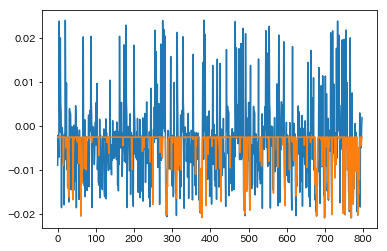

Test
MSE_test 7.849691126917633e-05


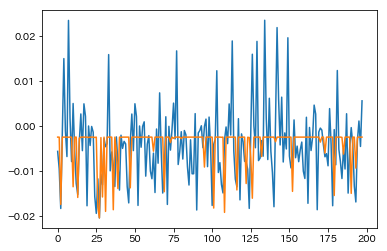

In [156]:
pre_train_bpbp_lg_2bp= model_1_error.predict1(train_X_lg_1bp_std)
pre_train_bpbp_lg_2bp = pre_train_bpbp_lg_2bp[pre_select(size_error,train_Y_lg_1bp,pre_train_bpbp_lg_2bp)]
pre_test_bpbp_lg_2bp= model_1_error.predict1(test_X_lg_1bp_std)
pre_test_bpbp_lg_2bp = pre_test_bpbp_lg_2bp[pre_select(size_error,test_Y_lg_1bp,pre_test_bpbp_lg_2bp)]
pre_x_lg_bpbp_tre = remake_std(pre_train_bpbp_lg_2bp,train_Y_lg_1bp)
pre_x_lg_bpbp_tes = remake_std(pre_test_bpbp_lg_2bp,test_Y_lg_1bp)

print("Train")
print("MSE_train",mean_squared_error(train_Y_lg_1bp, pre_x_lg_bpbp_tre))
plt.plot(train_Y_lg_1bp)
plt.plot(pre_x_lg_bpbp_tre)
#plt.xlim(400,500)
#plt.savefig('image/Hybrid/log_train_error_bpbp_n50.png')
plt.show()
print("Test")
print("MSE_test",mean_squared_error(test_Y_lg_1bp, pre_x_lg_bpbp_tes))
plt.plot(test_Y_lg_1bp)
plt.plot(pre_x_lg_bpbp_tes)
#plt.xlim(100,150)
#plt.savefig('image/Hybrid/log_test_error_bpbp_n50.png')
plt.show()

## Result

BPPSO
(798, 1)
Train
MSE_train(Hybrid) 4.584929971280324e-05
MSE_train(BP) 7.706555229013681e-05


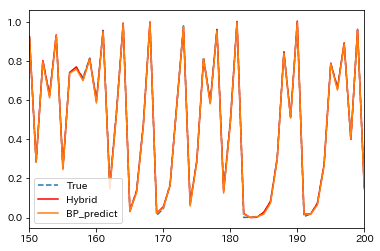

Test
MSE_test(Hybrid) 5.5419005603968325e-05
MSE_test(BP) 7.103672226516893e-05
(198, 1)


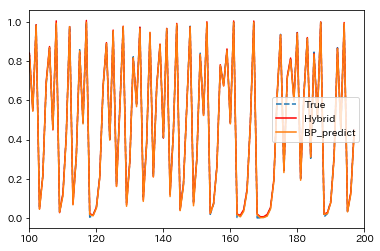

BPBP
(798, 1)
Train
MSE_train(Hybrid) 5.079971405812893e-05
MSE_train(BP) 7.706555229013681e-05


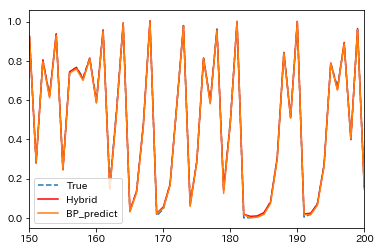

Test
MSE_test(Hybrid) 5.809239003481845e-05
MSE_test(BP) 7.103672226516893e-05
(198, 1)


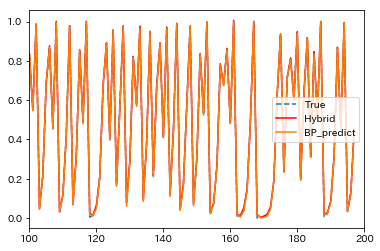

In [140]:
#N=10 PSO:N=10
print("BPPSO")
show_result(pre_x_lg_bpps_tre,pre_x_lg_bpps_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)
print("BPBP")

show_result(pre_x_lg_bpbp_tre,pre_x_lg_bpbp_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)

BPPSO
(798, 1)
Train
MSE_train(Hybrid) 0.00015175283895003846
MSE_train(BP) 0.00020561543394659472


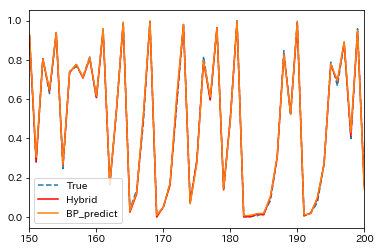

Test
MSE_test(Hybrid) 0.0001874264340826613
MSE_test(BP) 0.0002124924000085521
(198, 1)


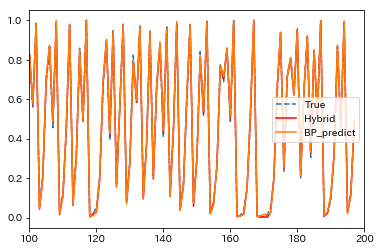

BPBP
(798, 1)
Train
MSE_train(Hybrid) 0.00014994739110238634
MSE_train(BP) 0.00020561543394659472


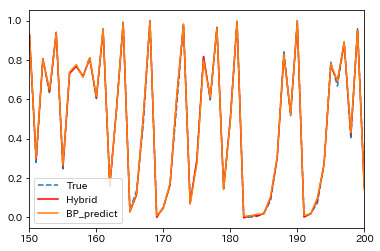

Test
MSE_test(Hybrid) 0.00023055048209466935
MSE_test(BP) 0.0002124924000085521
(198, 1)


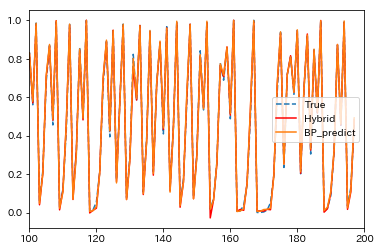

In [850]:
#N=10 PSO:N=50

print("BPPSO")
show_result(pre_x_lg_bpps_tre,pre_x_lg_bpps_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)
print("BPBP")
show_result(pre_x_lg_bpbp_tre,pre_x_lg_bpbp_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)

BPPSO
(798, 1)
Train
MSE_train(Hybrid) 0.0001300294007215774
MSE_train(BP) 0.00012058845515554283


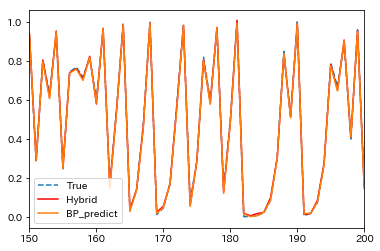

Test
MSE_test(Hybrid) 0.00012191040327556598
MSE_test(BP) 0.0001074439300840839
(198, 1)


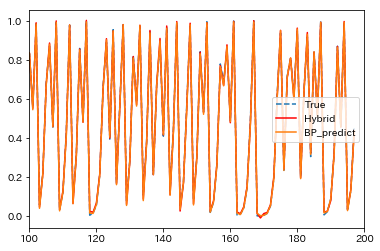

BPBP
(798, 1)
Train
MSE_train(Hybrid) 7.428349505401703e-05
MSE_train(BP) 0.00012058845515554283


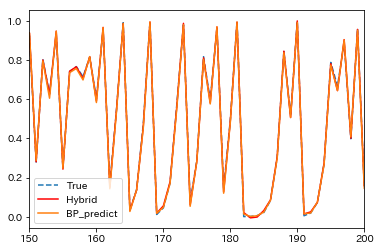

Test
MSE_test(Hybrid) 0.000104421098642043
MSE_test(BP) 0.0001074439300840839
(198, 1)


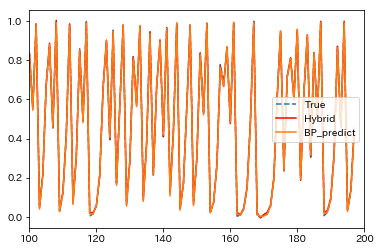

In [913]:
#N=1 , PSO:N=1
print("BPPSO")
show_result(pre_x_lg_bpps_tre,pre_x_lg_bpps_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)
print("BPBP")
show_result(pre_x_lg_bpbp_tre,pre_x_lg_bpbp_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)

BPPSO
(798, 1)
Train
MSE_train(Hybrid) 0.00013387987029227355
MSE_train(BP) 0.00023583351386000117


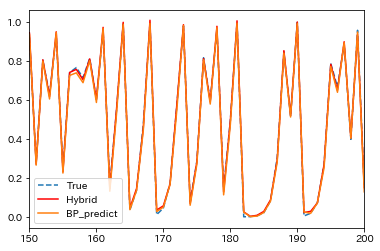

Test
MSE_test(Hybrid) 0.00016749978822382206
MSE_test(BP) 0.00023799994107549758
(198, 1)


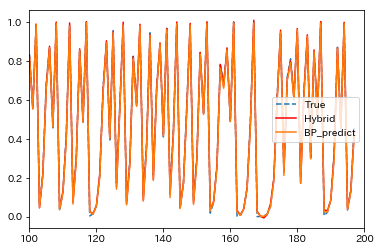

BPBP
(798, 1)
Train
MSE_train(Hybrid) 0.00012209372158055742
MSE_train(BP) 0.00023583351386000117


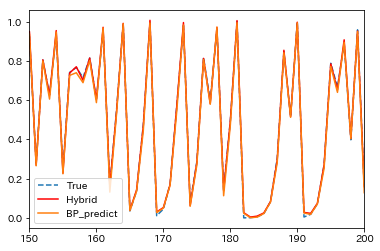

Test
MSE_test(Hybrid) 0.00018095137805537978
MSE_test(BP) 0.00023799994107549758
(198, 1)


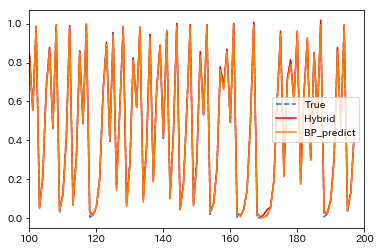

In [829]:
#N=1
print("BPPSO")
show_result(pre_x_lg_bpps_tre,pre_x_lg_bpps_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)
print("BPBP")
show_result(pre_x_lg_bpbp_tre,pre_x_lg_bpbp_tes,pred_train_1bp_lg,pred_test_1bp_lg,h_log,pre_h_log,app=True)

## Record

In [847]:
model_n10_adam_e3000 = model_10

# Hybrid_PSO

## 1-PSO

In [115]:
best_nn_lg_1p = pso(g_log,h_log,phi_g_=1.4955,phi_p_=1.4955,size_lg_=10)

self.X :  (10, 41)
S.shape (10,)
(0, 4.3523690970131)
(2, 3.0042528288269557)
(3, 0.14158195056166256)
(5, 0.1288962049925553)
(9, 0.12822065708294925)
(16, 0.12727189189921473)
(20, 0.1256202734873988)
(24, 0.12427413302442623)
(35, 0.12408418277100507)
(36, 0.1240525968947567)
(41, 0.12358664931845963)
(43, 0.12332919171953935)
(47, 0.12078024888500567)
(60, 0.11976281765530132)
(66, 0.11891837611788007)
(70, 0.11840037889402692)
(76, 0.11836821512927374)
(81, 0.11833720399044198)
(85, 0.11833451010949336)
(90, 0.11676918282924924)
(92, 0.11378732265266274)
(93, 0.11269547000848953)
(94, 0.11055104081423003)
(95, 0.1082777718151202)
(96, 0.10700473412212001)
(97, 0.10283826202305733)
(98, 0.10077608549267789)
(99, 0.09973980896977144)
(100, 0.09781697025780318)
(101, 0.09763765841455647)
(102, 0.09543006437267229)
(106, 0.09522044940387497)
(107, 0.0948856835774917)
(109, 0.0913113274148211)
(111, 0.08961248718075092)
(112, 0.08720334535653312)
(113, 0.08561681572511631)
(114, 0.0845

(664, 0.003141734778445268)
(665, 0.003133767620385047)
(666, 0.0031282862301313706)
(667, 0.00312586981595228)
(668, 0.0031248569435542773)
(669, 0.0031243916426432726)
(671, 0.003121817177805794)
(672, 0.0031216050977290813)
(673, 0.0031101396276856414)
(674, 0.003104753665680031)
(675, 0.003103379393170128)
(676, 0.0031028001558533595)
(677, 0.0031009822148038353)
(680, 0.0030923817677241425)
(682, 0.0030876060687210776)
(683, 0.0030723049858550648)
(684, 0.0030715501103122313)
(687, 0.0030707366416920876)
(688, 0.003065285197477133)
(689, 0.0030636044957384626)
(690, 0.0030519850393967126)
(691, 0.003050265313925891)
(693, 0.003044431132618358)
(695, 0.00304289137562386)
(697, 0.0030412939395576518)
(698, 0.0030375154552704136)
700
(701, 0.003036744844382447)
(706, 0.003036327111772197)
(709, 0.003033110340310025)
(712, 0.003032637163888562)
(713, 0.003032150293079744)
(715, 0.003032035835256721)
(716, 0.0030306159204655752)
(724, 0.003029884395213245)
(725, 0.0030291021280816417)


(1030, 0.002283628505379773)
(1031, 0.0022826298394614314)
(1032, 0.00227672903889532)
(1033, 0.002271995977176236)
(1034, 0.0022697226862652083)
(1035, 0.0022589514372667106)
(1036, 0.0022539871042520777)
(1037, 0.0022428594518504852)
(1038, 0.002239136621356385)
(1039, 0.0022370087381326244)
(1040, 0.0022350131522762213)
(1043, 0.002234706514023292)
(1044, 0.0022340515908219677)
(1045, 0.002233774332459604)
(1051, 0.002233693222267359)
(1052, 0.00223161690392843)
(1053, 0.002226590286789277)
(1055, 0.0022251300412211763)
(1056, 0.002223788380688837)
(1058, 0.002222851769259965)
(1061, 0.002222523283658473)
(1062, 0.0022173798033495555)
(1065, 0.0022162597622098247)
(1067, 0.0022147904833856947)
(1068, 0.0022130402114452713)
(1070, 0.002212808304722999)
(1071, 0.002212728192017164)
(1072, 0.002212147099533464)
(1073, 0.002210800172826416)
(1074, 0.0022084571485603177)
(1076, 0.002207134917327767)
(1077, 0.0022057833442888277)
(1078, 0.002204974130133676)
(1079, 0.0022034033776095027)


(1550, 0.0016186489129517557)
(1551, 0.0016181057180698277)
(1553, 0.0016173693277411352)
(1554, 0.0016169646607949442)
(1555, 0.0016164445662171666)
(1556, 0.0016160656495959296)
(1557, 0.0016155436518369463)
(1558, 0.0016153436097377264)
(1559, 0.0016143022621186425)
(1560, 0.001613687924273244)
(1561, 0.001613190292182786)
(1568, 0.00161286093652452)
(1570, 0.0016126215438153851)
(1571, 0.0016115185117678511)
(1572, 0.0016107702423435587)
(1573, 0.0016099734639273943)
(1574, 0.0016096991357870945)
(1575, 0.0016094786619349937)
(1576, 0.0016092495341792194)
(1577, 0.0016089179357993903)
(1578, 0.0016086466370080182)
(1580, 0.0016070420968577698)
(1582, 0.001605550058783038)
(1583, 0.0016039312912558327)
(1584, 0.0016030187408863131)
(1585, 0.0016016893874817324)
(1586, 0.0015995043913431281)
(1587, 0.0015975168786586376)
(1588, 0.0015962107592218373)
(1589, 0.0015939037010652742)
(1590, 0.0015888328960714734)
(1591, 0.0015851435368772365)
(1592, 0.0015816720042537778)
(1593, 0.001574

(1872, 0.0013940499366028082)
(1873, 0.0013939639964137389)
(1874, 0.001393911974937264)
(1875, 0.0013936408195547706)
(1884, 0.0013936274033172235)
(1887, 0.0013935810503403882)
(1888, 0.001393309058261833)
(1889, 0.0013933027313519854)
(1891, 0.0013932613573947243)
(1893, 0.0013930829203149951)
(1894, 0.0013930362707365112)
(1895, 0.0013929110484605161)
(1896, 0.0013928433922216208)
(1897, 0.0013927847404855232)
(1898, 0.0013926677761444952)
1900
(1902, 0.001392657562702747)
(1904, 0.0013925351877562115)
(1905, 0.0013923645929003936)
(1906, 0.0013919349189935033)
(1907, 0.001391692824754424)
(1908, 0.0013915521275302829)
(1909, 0.0013913773004620683)
(1910, 0.0013910990247044013)
(1911, 0.0013909074908352568)
(1912, 0.0013906250040065292)
(1913, 0.0013905540440203943)
(1914, 0.0013903838214107114)
(1917, 0.0013902712380419978)
(1918, 0.001390206864119791)
(1924, 0.0013901235139645843)
(1925, 0.0013899510132622485)
(1926, 0.0013899112068898446)
(1929, 0.001389893980866211)
(1931, 0.00

(2335, 0.0012580289955121868)
(2336, 0.0012575922370485506)
(2337, 0.0012569783450255253)
(2338, 0.0012563778851943407)
(2339, 0.001255517734143044)
(2340, 0.001254612312456388)
(2341, 0.0012538624128791973)
(2342, 0.0012527340424146615)
(2343, 0.001251967802663253)
(2344, 0.0012511569477516203)
(2345, 0.00124938705570427)
(2346, 0.0012481947461454557)
(2347, 0.001246607095025311)
(2348, 0.0012451743119935958)
(2349, 0.001243597174583261)
(2350, 0.0012425800385709655)
(2351, 0.0012415927997572226)
(2352, 0.001240369261113868)
(2353, 0.001239357463356041)
(2354, 0.0012377129595660661)
(2355, 0.0012364503201061257)
(2356, 0.0012353709276964892)
(2357, 0.0012342080777723629)
(2358, 0.0012321753200444242)
(2359, 0.0012309429604984927)
(2360, 0.0012294558256637045)
(2361, 0.0012279607344131665)
(2362, 0.0012271391633977727)
(2363, 0.0012261942451399057)
(2364, 0.0012247369717961764)
(2365, 0.0012235137286631295)
(2366, 0.0012227528692808002)
(2367, 0.0012212429415006342)
(2368, 0.0012202638

(2654, 0.0009545794865938856)
(2655, 0.0009531326747546499)
(2656, 0.0009521588141889314)
(2658, 0.0009515429630173045)
(2659, 0.0009503284573552801)
(2660, 0.00094918444908103)
(2661, 0.0009491277713283011)
(2662, 0.0009490257855797649)
(2664, 0.0009485846477442788)
(2667, 0.0009470861593945945)
(2670, 0.0009468302750663974)
(2672, 0.0009457175002039975)
(2674, 0.000945291987498923)
(2675, 0.0009449030283922976)
(2676, 0.0009447217517609448)
(2677, 0.000944639503501936)
(2678, 0.000944603825433523)
(2679, 0.0009445895862678867)
(2680, 0.0009427423103146469)
(2681, 0.00094183103454055)
(2682, 0.0009415263699262193)
(2683, 0.000939209278599744)
(2684, 0.0009382929847806717)
(2685, 0.0009379885376263985)
(2686, 0.0009370107786892971)
(2687, 0.0009364349377294715)
(2689, 0.0009363272742096105)
(2690, 0.0009355257948571968)
(2691, 0.0009350612444735668)
(2692, 0.0009334177689329845)
(2693, 0.0009330277313193075)
(2694, 0.0009329081747295731)
(2695, 0.0009289343072813003)
(2697, 0.000928306

In [116]:
model_save("pso_logistic_n10e3000",best_nn_lg_1p)

In [165]:
f_1 = open("model/n10/pso_logistic_n10e3000.binaryfile","rb")
best_nn_lg_1p = pickle.load(f_1)

TRAIN
MSE_test 0.0009273145467782104
MSE_train 0.0008716700716741269


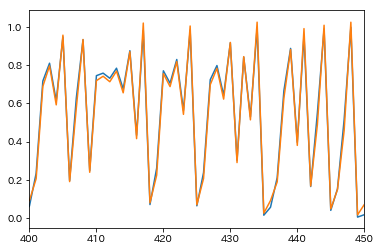

TEST


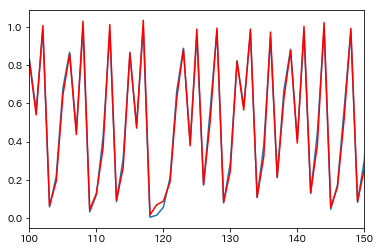

In [166]:

pred_train_1ps_lg= best_nn_lg_1p.run(g_log).T
Y_train_1ps_lg = (h_log)

pred_test_1ps_lg = best_nn_lg_1p.run(pre_g_log).T
Y_test_1ps_lg = (pre_h_log)

print("TRAIN")
print("MSE_test",mean_squared_error(Y_test_1ps_lg, pred_test_1ps_lg))
print("MSE_train",mean_squared_error(Y_train_1ps_lg, pred_train_1ps_lg))

plt.plot(Y_train_1ps_lg)
plt.plot(pred_train_1ps_lg)
plt.xlim(400,450)
plt.show()
print("TEST")
plt.plot(Y_test_1ps_lg)
plt.plot(pred_test_1ps_lg , color = 'r')
plt.xlim(100,150)
#plt.savefig('image/jpybnp_MLPPSO_mlp_predict_test_400-500.png')
plt.show()

Test
Logi_Test_shape: (198,)


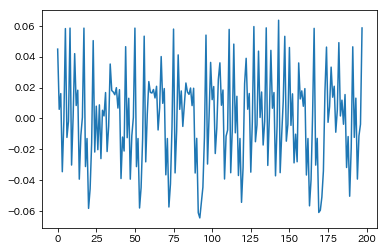

Train
Logi_Train_shape: (798,)


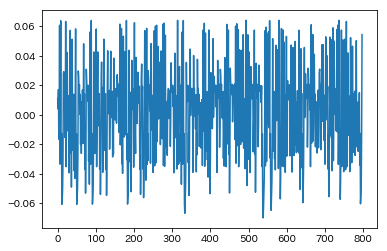

train.shape (810, 1)
test.shape (210, 1)
error_ (798,)
t_error_ (198,)
train_X_bp.shape (798, 12)
test_X_bp.shape (198, 12)
train_Y_bp (798,)
test_Y_bp (198,)


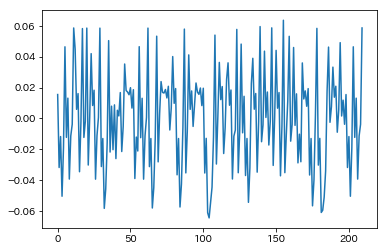

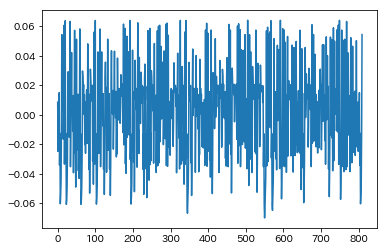

In [167]:
window_size_lg = 12

error_lg_1ps,te_error_lg_1ps = make_error(h_log,pre_h_log,pred_train_1ps_lg,pred_test_1ps_lg)
print("Test")

print("Logi_Test_shape:",np.array(te_error_lg_1ps).shape)
plt.plot(te_error_lg_1ps)
#pyplot.xlim(1000,1050)
#plt.savefig('image/jpybnp_MLPPSO_mlp_error_test.png')
plt.show()
print("Train")
print("Logi_Train_shape:",np.array(error_lg_1ps).shape)
plt.plot(error_lg_1ps)
#plt.savefig('image/jpybnp_MLPPSO_mlp_error_train.png')
plt.show()
test_data_lg_1ps = []
train_data_lg_1ps =[]

test_data_lg_1ps,train_data_lg_1ps = error_dataset(window_size_lg,te_error_lg_1ps,error_lg_1ps)
print("train.shape",train_data_lg_1ps.shape)
print("test.shape",test_data_lg_1ps.shape)
print("error_",np.array(error_lg_1ps).shape)
print("t_error_",np.array(te_error_lg_1ps).shape)

train_X_lg_1ps,train_Y_lg_1ps = make_dataset(train_data_lg_1ps,window_size_lg)
test_X_lg_1ps,test_Y_lg_1ps = make_dataset(test_data_lg_1ps,window_size_lg)
print("train_X_bp.shape",train_X_lg_1ps.shape)
print("test_X_bp.shape",test_X_lg_1ps.shape)
print("train_Y_bp",np.array(train_Y_lg_1ps).shape)
print("test_Y_bp",np.array(test_Y_lg_1ps).shape)

plt.plot(test_data_lg_1ps)
plt.show()
plt.plot(train_data_lg_1ps)
plt.show()

train_X_lg_1ps_std = make_std(train_X_lg_1ps)
train_Y_lg_1ps_std = make_std(train_Y_lg_1ps)
test_X_lg_1ps_std = make_std(test_X_lg_1ps)
test_Y_lg_1ps_std = make_std(test_Y_lg_1ps)

## 2-PSO

In [119]:
best_nn_lg_2ps = pso(train_X_lg_1ps_std,train_Y_lg_1ps_std,phi_g_=1.4955,phi_p_=1.4955,size_lg_=10)

self.X :  (10, 141)
S.shape (10,)
(0, 15.614517895696835)
(2, 4.874557000738439)
(3, 0.060664648167880364)
(5, 0.0572576225458727)
(11, 0.05566112833030861)
(20, 0.05510346698985637)
(21, 0.05491736200002665)
(22, 0.05261155631720409)
(25, 0.05178484818965944)
(29, 0.051652859269099384)
(41, 0.05138862469510926)
(47, 0.05094219541495338)
(51, 0.050464180375305576)
(56, 0.049216841566475246)
(59, 0.048837084433194206)
(65, 0.04823551510447014)
(74, 0.04796073323194888)
(78, 0.047928085797226586)
(81, 0.047770216373294316)
(88, 0.04776810442426315)
(91, 0.047764852571109795)
(93, 0.047742632327593036)
(94, 0.04769818821573677)
100
(101, 0.047693453306265156)
(108, 0.047649295008183414)
(110, 0.04753516543436275)
(112, 0.047529992070891876)
(116, 0.047495063033567465)
(118, 0.047433445805566785)
(119, 0.047391938846951)
(121, 0.04738125717402321)
(122, 0.04736838211379204)
(124, 0.047246106132397825)
(125, 0.047164367209487676)
(131, 0.04711081044722862)
(133, 0.047096897670144924)
(140, 

(594, 0.0363601021126658)
(595, 0.03635723487822047)
(596, 0.036348030667669735)
(597, 0.03634463977044267)
(598, 0.036341842685679214)
(599, 0.03631525191854902)
600
(602, 0.03631117170568544)
(606, 0.03630281719240396)
(607, 0.036292709617228906)
(608, 0.03628058613936372)
(609, 0.036245662225237014)
(610, 0.036237345074997075)
(611, 0.03623356547438945)
(612, 0.03622670800496763)
(613, 0.03621763083913016)
(614, 0.036208543050485646)
(615, 0.036206837969756774)
(617, 0.036206055123860326)
(618, 0.03620538831765904)
(620, 0.03619597881177692)
(621, 0.036194806260914945)
(624, 0.03619343279836748)
(625, 0.036170203684889476)
(626, 0.0361648078123698)
(627, 0.036155763726447326)
(628, 0.0361478062762867)
(630, 0.03613691060674659)
(632, 0.036116676776668306)
(633, 0.036101376529323104)
(635, 0.036097785163321995)
(636, 0.036087840769339824)
(637, 0.036082129599286215)
(638, 0.036075606919774926)
(639, 0.03606485650628561)
(640, 0.03606044786842026)
(642, 0.036048245522241666)
(643, 0.0

(1034, 0.03413458747391716)
(1035, 0.03413251026155612)
(1036, 0.03413207199641087)
(1037, 0.03413114961020147)
(1038, 0.034130878246956105)
(1039, 0.034129990065066215)
(1040, 0.034128759533447045)
(1042, 0.03412862573026736)
(1043, 0.034125121714915184)
(1044, 0.03412370961365679)
(1045, 0.034123207519261525)
(1046, 0.03412252583261671)
(1047, 0.03412234048550165)
(1048, 0.03412068816879413)
(1050, 0.03411990502567468)
(1051, 0.03411819349076868)
(1053, 0.034116071042211815)
(1055, 0.034114541531073864)
(1056, 0.03411383284941597)
(1058, 0.03411338105784675)
(1060, 0.034112565887319854)
(1062, 0.03411084166094502)
(1063, 0.03411043503797149)
(1064, 0.03410944344527016)
(1065, 0.034107975117896525)
(1066, 0.03410720287348278)
(1067, 0.034105579455187024)
(1068, 0.034102624058496796)
(1069, 0.03410122776594997)
(1070, 0.03409847505586989)
(1071, 0.0340951304108825)
(1072, 0.03409277990654315)
(1073, 0.03409193493215467)
(1074, 0.03408841219199425)
(1075, 0.034085987636714624)
(1076, 0.

(1424, 0.03374002373596027)
(1425, 0.03373971254988076)
(1426, 0.03373949551354899)
(1427, 0.033737726871408864)
(1428, 0.03373638705221545)
(1429, 0.03373499919014773)
(1430, 0.03373446335159286)
(1431, 0.033733983490725546)
(1432, 0.0337333350110904)
(1433, 0.03373218225274386)
(1434, 0.0337314608667382)
(1435, 0.033730364411854535)
(1436, 0.033728850396858925)
(1437, 0.03372817904382158)
(1438, 0.03372789551904587)
(1439, 0.03372680646428605)
(1440, 0.03372609423610711)
(1441, 0.03372555655068181)
(1442, 0.03372485299279733)
(1443, 0.033721430909966536)
(1445, 0.033719417914694925)
(1446, 0.03371842326106389)
(1447, 0.03371595924380323)
(1448, 0.03371385870862461)
(1449, 0.03371227305733552)
(1450, 0.03371112042400723)
(1451, 0.03370955482819475)
(1452, 0.03370911955953474)
(1453, 0.03370859833608371)
(1454, 0.03370827486812914)
(1455, 0.03370738212312228)
(1458, 0.033706313700432464)
(1460, 0.033705861367453877)
(1461, 0.0337048247008147)
(1462, 0.033704404140910325)
(1463, 0.03370

(1843, 0.03346625282962178)
(1844, 0.033465897848219385)
(1845, 0.03346568377385737)
(1847, 0.03346550191876036)
(1848, 0.03346542511139075)
(1849, 0.033465340190292986)
(1850, 0.03346521150216491)
(1852, 0.03346498619088032)
(1853, 0.03346494953573749)
(1854, 0.033464807109582315)
(1855, 0.03346477528008633)
(1856, 0.03346468881845306)
(1857, 0.03346465846502378)
(1858, 0.03346463696755986)
(1859, 0.033464618647167835)
(1862, 0.03346433307760909)
(1864, 0.033464210756182465)
(1865, 0.03346404944605689)
(1866, 0.03346391832996634)
(1867, 0.03346370904970085)
(1868, 0.033463577777563966)
(1869, 0.033463516190636595)
(1870, 0.03346327319234326)
(1871, 0.03346324494681901)
(1872, 0.03346303447310716)
(1873, 0.033462948750212565)
(1874, 0.03346274708941505)
(1875, 0.03346259183956003)
(1876, 0.033462405398447255)
(1877, 0.03346217926790672)
(1878, 0.0334620631708596)
(1879, 0.03346203292137167)
(1880, 0.03346184004292226)
(1882, 0.033461572047129455)
(1884, 0.033461554425252546)
(1886, 0.0

(2209, 0.029282732293170344)
(2210, 0.029282285526516825)
(2211, 0.029281688134723868)
(2212, 0.029278688918211497)
(2213, 0.02927595949528736)
(2214, 0.02927529361643713)
(2215, 0.029270692693124566)
(2216, 0.02926981623994522)
(2217, 0.029266419228998003)
(2218, 0.029262002172519317)
(2219, 0.029260156024988167)
(2220, 0.029257922765617315)
(2221, 0.029253163389211145)
(2222, 0.029249147267881307)
(2223, 0.029247041866674414)
(2224, 0.029245978800174)
(2225, 0.02924253879021393)
(2226, 0.029240864948037928)
(2227, 0.029239478933419584)
(2228, 0.029237706016788243)
(2229, 0.029233511115620035)
(2230, 0.029229681853256972)
(2231, 0.029226840904567536)
(2232, 0.029222147329857603)
(2233, 0.029219246457073755)
(2234, 0.02921567052028389)
(2235, 0.029211167845149908)
(2236, 0.029208053023303385)
(2237, 0.02920376854580783)
(2238, 0.029201185834339435)
(2239, 0.02919684894443136)
(2240, 0.029190284567947117)
(2241, 0.029183356790530607)
(2242, 0.029176654102792514)
(2243, 0.029170838599420

(2544, 0.028306461463490473)
(2545, 0.02830427977994372)
(2546, 0.02830381312753331)
(2547, 0.028299380843956924)
(2549, 0.02829090081362817)
(2550, 0.028284644333322506)
(2551, 0.028276309808627918)
(2552, 0.028269645381559246)
(2553, 0.028265903434747025)
(2554, 0.028263301308515475)
(2555, 0.02824923169408973)
(2556, 0.028236083090109144)
(2557, 0.02822957001637588)
(2558, 0.02822161356129369)
(2559, 0.028216190332971642)
(2560, 0.02821455259424893)
(2561, 0.028200087513806316)
(2562, 0.028157808499645765)
(2564, 0.02814621361211545)
(2567, 0.028114392146662243)
(2568, 0.028040119426028957)
(2569, 0.027976002012696444)
(2570, 0.027893319629115673)
(2571, 0.027818878773628028)
(2573, 0.027765514977040315)
(2575, 0.027753851720335586)
(2578, 0.02775261386107304)
(2579, 0.027743366500767683)
(2580, 0.02773735275582598)
(2581, 0.027733766934895248)
(2584, 0.027726243185004464)
(2586, 0.02772163270764727)
(2587, 0.027717703298263053)
(2591, 0.02771226991618625)
(2592, 0.02771213560751956

(2971, 0.025784329389225175)
(2972, 0.025783275797755727)
(2973, 0.025783207049455487)
(2975, 0.025781528792327455)
(2977, 0.025777360906926356)
(2979, 0.025776799964330268)
(2980, 0.025775203106973458)
(2981, 0.025773227236192173)
(2982, 0.025769516898527488)
(2983, 0.025763829467134906)
(2984, 0.025761513648285262)
(2985, 0.025758400023727437)
(2986, 0.025754317363170617)
(2987, 0.025752430725646116)
(2989, 0.025751416108555473)
(2991, 0.02575005025641754)
(2993, 0.025741753857110118)
(2995, 0.025737790186899506)
(2998, 0.0257361844592262)
(2999, 0.02573245210168062)
(3000, 0.025728199128066027)


In [120]:
model_save("psopso_error_n10e3000",best_nn_lg_2ps)

In [168]:
f_p2 = open("model/n10/psopso_error_n10e3000.binaryfile","rb")
best_nn_lg_2ps = pickle.load(f_p2)

Train
MSE_train 0.0004632465560139606


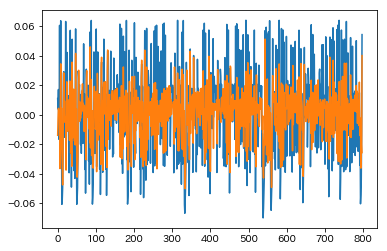

Test
MSE_test 0.000629279469861618


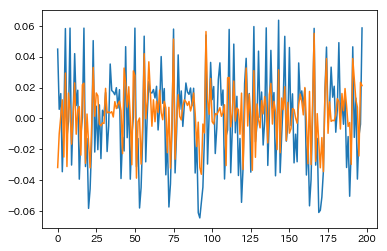

In [169]:
pre_train_psps_lg_2ps= best_nn_lg_2ps.run(train_X_lg_1ps_std).T
pre_test_psps_lg_2ps= best_nn_lg_2ps.run(test_X_lg_1ps_std).T
pre_x_lg_psps_tre = remake_std(pre_train_psps_lg_2ps,train_Y_lg_1ps)
pre_x_lg_psps_tes = remake_std(pre_test_psps_lg_2ps,test_Y_lg_1ps)

print("Train")
print("MSE_train",mean_squared_error(train_Y_lg_1ps,pre_x_lg_psps_tre))
plt.plot(train_Y_lg_1ps)
plt.plot(pre_x_lg_psps_tre)
#plt.xlim(400,500)
#plt.savefig('image/jpybnp_MLPPSO_pso_predict_train.png')
#plt.savefig('image/Hybrid/log_train_error_psopso_n10.png')

plt.show()
print("Test")
print("MSE_test",mean_squared_error(test_Y_lg_1ps, pre_x_lg_psps_tes))
plt.plot(test_Y_lg_1ps)
plt.plot(pre_x_lg_psps_tes)
#plt.xlim(100,150)
#plt.savefig('image/jpybnp_MLPPSO_pso_predict_test.png')
#plt.savefig('image/Hybrid/log_test_error_psopso_n10.png')

plt.show()

## 2-BP

In [122]:
model_1_error = MLP(train_X_lg_1ps_std,train_Y_lg_1ps_std,12,10,1,num=10,max_epoch=3000)

W1 (10, 12, 10)
b1 (10,)
2
W.shape (10, 12, 10)
2
W.shape (10, 10, 1)
params (4,)
params[0].shape (10, 12, 10) -> W1
params[1].shape (10,) -> b1
params[2].shape (10, 10, 1) -> W2
params[3].shape (1,) -> b2
grads (4,)
grads[0].shape (10, 12, 10) -> W1
grads[1].shape (10,) -> b1
grads[2].shape (10, 10, 1) -> W2
grads[3].shape (1,) -> b2
total_loss 38.79425658699399
| epoch 1 | loss 0.048614357
----------------------------------------------
total_loss 38.954302710470195
| epoch 2 | loss 0.048814916
----------------------------------------------
total_loss 38.77093757741243
| epoch 3 | loss 0.048585135
----------------------------------------------
total_loss 38.72221098917063
| epoch 4 | loss 0.048524074
----------------------------------------------
total_loss 38.79968521305073
| epoch 5 | loss 0.048621159
----------------------------------------------
total_loss 38.83122821581953
| epoch 6 | loss 0.048660687
----------------------------------------------
total_loss 38.75717588490967
| e

total_loss 36.24020002234444
| epoch 76 | loss 0.045413784
----------------------------------------------
total_loss 36.41250696731001
| epoch 77 | loss 0.045629708
----------------------------------------------
total_loss 36.00362677267719
| epoch 78 | loss 0.045117327
----------------------------------------------
total_loss 36.23991024153758
| epoch 79 | loss 0.045413421
----------------------------------------------
total_loss 36.23694788929971
| epoch 80 | loss 0.045409709
----------------------------------------------
total_loss 36.22640341601411
| epoch 81 | loss 0.045396496
----------------------------------------------
total_loss 36.01306592451205
| epoch 82 | loss 0.045129155
----------------------------------------------
total_loss 36.01782350986116
| epoch 83 | loss 0.045135117
----------------------------------------------
total_loss 36.22869387205584
| epoch 84 | loss 0.045399366
----------------------------------------------
total_loss 35.50770233748249
| epoch 85 | loss

total_loss 20.180648114238288
| epoch 153 | loss 0.025289033
----------------------------------------------
total_loss 19.992378631403525
| epoch 154 | loss 0.025053106
----------------------------------------------
total_loss 19.676757766927494
| epoch 155 | loss 0.024657591
----------------------------------------------
total_loss 19.56382673881517
| epoch 156 | loss 0.024516074
----------------------------------------------
total_loss 19.33322420820796
| epoch 157 | loss 0.024227098
----------------------------------------------
total_loss 19.234002278451722
| epoch 158 | loss 0.024102760
----------------------------------------------
total_loss 19.297155000496666
| epoch 159 | loss 0.024181898
----------------------------------------------
total_loss 18.657026927569984
| epoch 160 | loss 0.023379733
----------------------------------------------
total_loss 18.420849582159292
| epoch 161 | loss 0.023083771
----------------------------------------------
total_loss 18.215311740987595


total_loss 12.600015925680529
| epoch 229 | loss 0.015789494
----------------------------------------------
total_loss 12.350547002378859
| epoch 230 | loss 0.015476876
----------------------------------------------
total_loss 12.266393306257187
| epoch 231 | loss 0.015371420
----------------------------------------------
total_loss 12.581358967670775
| epoch 232 | loss 0.015766114
----------------------------------------------
total_loss 11.725431319721018
| epoch 233 | loss 0.014693523
----------------------------------------------
total_loss 12.44452459058434
| epoch 234 | loss 0.015594642
----------------------------------------------
total_loss 12.109626434882168
| epoch 235 | loss 0.015174970
----------------------------------------------
total_loss 12.065040975588026
| epoch 236 | loss 0.015119099
----------------------------------------------
total_loss 11.650571440101759
| epoch 237 | loss 0.014599714
----------------------------------------------
total_loss 11.539661087410598

total_loss 8.440799148881268
| epoch 306 | loss 0.010577443
----------------------------------------------
total_loss 8.563801178566665
| epoch 307 | loss 0.010731580
----------------------------------------------
total_loss 8.572059575453425
| epoch 308 | loss 0.010741929
----------------------------------------------
total_loss 8.04682726441479
| epoch 309 | loss 0.010083743
----------------------------------------------
total_loss 8.723808095213109
| epoch 310 | loss 0.010932090
----------------------------------------------
total_loss 8.082737843504146
| epoch 311 | loss 0.010128744
----------------------------------------------
total_loss 8.407413216674131
| epoch 312 | loss 0.010535606
----------------------------------------------
total_loss 8.422505609698579
| epoch 313 | loss 0.010554518
----------------------------------------------
total_loss 8.387703118177678
| epoch 314 | loss 0.010510906
----------------------------------------------
total_loss 8.030318711069087
| epoch 3

total_loss 7.48785550203336
| epoch 383 | loss 0.009383278
----------------------------------------------
total_loss 7.415493232031362
| epoch 384 | loss 0.009292598
----------------------------------------------
total_loss 7.215821483085747
| epoch 385 | loss 0.009042383
----------------------------------------------
total_loss 7.45459469535922
| epoch 386 | loss 0.009341597
----------------------------------------------
total_loss 7.342216664602683
| epoch 387 | loss 0.009200773
----------------------------------------------
total_loss 7.128858089646998
| epoch 388 | loss 0.008933406
----------------------------------------------
total_loss 7.336248986113023
| epoch 389 | loss 0.009193294
----------------------------------------------
total_loss 7.030991910776268
| epoch 390 | loss 0.008810767
----------------------------------------------
total_loss 7.300148033737607
| epoch 391 | loss 0.009148055
----------------------------------------------
total_loss 7.72379290137141
| epoch 392

total_loss 7.152615294385691
| epoch 460 | loss 0.008963177
----------------------------------------------
total_loss 7.283692883774096
| epoch 461 | loss 0.009127435
----------------------------------------------
total_loss 7.219578014763825
| epoch 462 | loss 0.009047090
----------------------------------------------
total_loss 7.078214728598855
| epoch 463 | loss 0.008869943
----------------------------------------------
total_loss 7.078704600852381
| epoch 464 | loss 0.008870557
----------------------------------------------
total_loss 7.1059412915066815
| epoch 465 | loss 0.008904688
----------------------------------------------
total_loss 7.078524960569508
| epoch 466 | loss 0.008870332
----------------------------------------------
total_loss 6.87306840610864
| epoch 467 | loss 0.008612868
----------------------------------------------
total_loss 6.970519335319786
| epoch 468 | loss 0.008734987
----------------------------------------------
total_loss 6.760200027764885
| epoch 

total_loss 5.776486143743044
| epoch 537 | loss 0.007238704
----------------------------------------------
total_loss 5.906112914132349
| epoch 538 | loss 0.007401144
----------------------------------------------
total_loss 6.270842151227599
| epoch 539 | loss 0.007858198
----------------------------------------------
total_loss 6.042989566896606
| epoch 540 | loss 0.007572669
----------------------------------------------
total_loss 6.4118289275946685
| epoch 541 | loss 0.008034873
----------------------------------------------
total_loss 6.070414422227755
| epoch 542 | loss 0.007607036
----------------------------------------------
total_loss 6.06422362409183
| epoch 543 | loss 0.007599278
----------------------------------------------
total_loss 5.80751253725869
| epoch 544 | loss 0.007277585
----------------------------------------------
total_loss 6.071998039594408
| epoch 545 | loss 0.007609020
----------------------------------------------
total_loss 6.2009423023964585
| epoch 

total_loss 5.634149723780794
| epoch 614 | loss 0.007060338
----------------------------------------------
total_loss 5.693327901358473
| epoch 615 | loss 0.007134496
----------------------------------------------
total_loss 5.479070042015907
| epoch 616 | loss 0.006866003
----------------------------------------------
total_loss 5.613480597182303
| epoch 617 | loss 0.007034437
----------------------------------------------
total_loss 5.949997830154937
| epoch 618 | loss 0.007456138
----------------------------------------------
total_loss 5.274447499767385
| epoch 619 | loss 0.006609583
----------------------------------------------
total_loss 5.393565940643767
| epoch 620 | loss 0.006758855
----------------------------------------------
total_loss 5.784834022565982
| epoch 621 | loss 0.007249165
----------------------------------------------
total_loss 5.487114116396602
| epoch 622 | loss 0.006876083
----------------------------------------------
total_loss 5.54718065010797
| epoch 6

total_loss 5.518092150742074
| epoch 691 | loss 0.006914902
----------------------------------------------
total_loss 5.281745798956783
| epoch 692 | loss 0.006618729
----------------------------------------------
total_loss 5.34664989417861
| epoch 693 | loss 0.006700063
----------------------------------------------
total_loss 5.46389622059857
| epoch 694 | loss 0.006846988
----------------------------------------------
total_loss 5.5277803750423775
| epoch 695 | loss 0.006927043
----------------------------------------------
total_loss 5.312846448471399
| epoch 696 | loss 0.006657702
----------------------------------------------
total_loss 5.344110075130929
| epoch 697 | loss 0.006696880
----------------------------------------------
total_loss 5.114126221820144
| epoch 698 | loss 0.006408679
----------------------------------------------
total_loss 5.107348801686421
| epoch 699 | loss 0.006400186
----------------------------------------------
total_loss 5.647121937625176
| epoch 7

total_loss 5.202612969163736
| epoch 768 | loss 0.006519565
----------------------------------------------
total_loss 5.330376716651322
| epoch 769 | loss 0.006679670
----------------------------------------------
total_loss 5.34384398969142
| epoch 770 | loss 0.006696546
----------------------------------------------
total_loss 5.485224379435238
| epoch 771 | loss 0.006873715
----------------------------------------------
total_loss 5.2931073329891545
| epoch 772 | loss 0.006632967
----------------------------------------------
total_loss 5.332053032048712
| epoch 773 | loss 0.006681771
----------------------------------------------
total_loss 5.448740849636983
| epoch 774 | loss 0.006827996
----------------------------------------------
total_loss 5.101914510775766
| epoch 775 | loss 0.006393377
----------------------------------------------
total_loss 5.502203092320865
| epoch 776 | loss 0.006894991
----------------------------------------------
total_loss 5.054110887837292
| epoch 

total_loss 5.497747674311346
| epoch 845 | loss 0.006889408
----------------------------------------------
total_loss 5.274559200640636
| epoch 846 | loss 0.006609723
----------------------------------------------
total_loss 5.061611337650405
| epoch 847 | loss 0.006342871
----------------------------------------------
total_loss 5.5434197007908725
| epoch 848 | loss 0.006946641
----------------------------------------------
total_loss 4.871665751957787
| epoch 849 | loss 0.006104844
----------------------------------------------
total_loss 5.076276902955252
| epoch 850 | loss 0.006361249
----------------------------------------------
total_loss 5.133951411838878
| epoch 851 | loss 0.006433523
----------------------------------------------
total_loss 4.928374916187977
| epoch 852 | loss 0.006175908
----------------------------------------------
total_loss 5.0665734424994335
| epoch 853 | loss 0.006349090
----------------------------------------------
total_loss 5.016744021745807
| epoc

total_loss 5.014128543313122
| epoch 922 | loss 0.006283369
----------------------------------------------
total_loss 5.2293074018795265
| epoch 923 | loss 0.006553017
----------------------------------------------
total_loss 4.975445265521079
| epoch 924 | loss 0.006234894
----------------------------------------------
total_loss 5.1232912245620135
| epoch 925 | loss 0.006420164
----------------------------------------------
total_loss 5.0611077087024645
| epoch 926 | loss 0.006342240
----------------------------------------------
total_loss 5.1308840443805295
| epoch 927 | loss 0.006429679
----------------------------------------------
total_loss 4.857467169121108
| epoch 928 | loss 0.006087052
----------------------------------------------
total_loss 4.949706804456595
| epoch 929 | loss 0.006202640
----------------------------------------------
total_loss 4.816306290769823
| epoch 930 | loss 0.006035472
----------------------------------------------
total_loss 4.814408553112672
| ep

total_loss 4.951948049358655
| epoch 999 | loss 0.006205449
----------------------------------------------
total_loss 4.840947779698602
| epoch 1000 | loss 0.006066351
----------------------------------------------
total_loss 4.776982321559926
| epoch 1001 | loss 0.005986193
----------------------------------------------
total_loss 4.831188765674595
| epoch 1002 | loss 0.006054121
----------------------------------------------
total_loss 5.044596963140189
| epoch 1003 | loss 0.006321550
----------------------------------------------
total_loss 4.522153801862448
| epoch 1004 | loss 0.005666859
----------------------------------------------
total_loss 5.106391703315152
| epoch 1005 | loss 0.006398987
----------------------------------------------
total_loss 4.866672419720599
| epoch 1006 | loss 0.006098587
----------------------------------------------
total_loss 5.198919284203172
| epoch 1007 | loss 0.006514936
----------------------------------------------
total_loss 4.83935492044904
|

total_loss 4.610422665965101
| epoch 1075 | loss 0.005777472
----------------------------------------------
total_loss 4.905168871166202
| epoch 1076 | loss 0.006146828
----------------------------------------------
total_loss 5.026622212960787
| epoch 1077 | loss 0.006299025
----------------------------------------------
total_loss 4.749213021429277
| epoch 1078 | loss 0.005951395
----------------------------------------------
total_loss 4.716242073627642
| epoch 1079 | loss 0.005910078
----------------------------------------------
total_loss 4.726212131568333
| epoch 1080 | loss 0.005922572
----------------------------------------------
total_loss 4.724644338398707
| epoch 1081 | loss 0.005920607
----------------------------------------------
total_loss 4.843386253600448
| epoch 1082 | loss 0.006069406
----------------------------------------------
total_loss 4.624780836715976
| epoch 1083 | loss 0.005795465
----------------------------------------------
total_loss 4.606331172358003

total_loss 4.913604467494209
| epoch 1151 | loss 0.006157399
----------------------------------------------
total_loss 4.6752991516355955
| epoch 1152 | loss 0.005858771
----------------------------------------------
total_loss 4.665884089998644
| epoch 1153 | loss 0.005846973
----------------------------------------------
total_loss 4.376167298271842
| epoch 1154 | loss 0.005483919
----------------------------------------------
total_loss 4.592546057751319
| epoch 1155 | loss 0.005755070
----------------------------------------------
total_loss 4.474704251874585
| epoch 1156 | loss 0.005607399
----------------------------------------------
total_loss 4.630668019593205
| epoch 1157 | loss 0.005802842
----------------------------------------------
total_loss 4.670792000928025
| epoch 1158 | loss 0.005853123
----------------------------------------------
total_loss 4.53663758957777
| epoch 1159 | loss 0.005685010
----------------------------------------------
total_loss 4.810205020704447

total_loss 5.136226166768082
| epoch 1227 | loss 0.006436374
----------------------------------------------
total_loss 4.474587001522284
| epoch 1228 | loss 0.005607252
----------------------------------------------
total_loss 4.621679580382467
| epoch 1229 | loss 0.005791578
----------------------------------------------
total_loss 4.937216845792016
| epoch 1230 | loss 0.006186989
----------------------------------------------
total_loss 4.5673396835493545
| epoch 1231 | loss 0.005723483
----------------------------------------------
total_loss 4.7108160249976265
| epoch 1232 | loss 0.005903278
----------------------------------------------
total_loss 4.493295208411694
| epoch 1233 | loss 0.005630696
----------------------------------------------
total_loss 4.492971607421575
| epoch 1234 | loss 0.005630290
----------------------------------------------
total_loss 4.733552852909343
| epoch 1235 | loss 0.005931770
----------------------------------------------
total_loss 4.5799274903809

total_loss 4.543343551488684
| epoch 1303 | loss 0.005693413
----------------------------------------------
total_loss 4.594695934943031
| epoch 1304 | loss 0.005757764
----------------------------------------------
total_loss 4.688429230216193
| epoch 1305 | loss 0.005875225
----------------------------------------------
total_loss 4.576215099739967
| epoch 1306 | loss 0.005734605
----------------------------------------------
total_loss 4.331807820439514
| epoch 1307 | loss 0.005428331
----------------------------------------------
total_loss 4.533477981274421
| epoch 1308 | loss 0.005681050
----------------------------------------------
total_loss 4.64998654928905
| epoch 1309 | loss 0.005827051
----------------------------------------------
total_loss 4.314187701371504
| epoch 1310 | loss 0.005406250
----------------------------------------------
total_loss 4.443023324407018
| epoch 1311 | loss 0.005567698
----------------------------------------------
total_loss 4.448255551207418


total_loss 4.480307887631131
| epoch 1379 | loss 0.005614421
----------------------------------------------
total_loss 4.545847080758307
| epoch 1380 | loss 0.005696550
----------------------------------------------
total_loss 4.256279768840301
| epoch 1381 | loss 0.005333684
----------------------------------------------
total_loss 4.739273486369429
| epoch 1382 | loss 0.005938939
----------------------------------------------
total_loss 4.642772080604868
| epoch 1383 | loss 0.005818010
----------------------------------------------
total_loss 4.442551150389688
| epoch 1384 | loss 0.005567107
----------------------------------------------
total_loss 4.499887206697164
| epoch 1385 | loss 0.005638956
----------------------------------------------
total_loss 4.5665309958857145
| epoch 1386 | loss 0.005722470
----------------------------------------------
total_loss 4.326285117465316
| epoch 1387 | loss 0.005421410
----------------------------------------------
total_loss 4.73674985796216

total_loss 4.519014813378905
| epoch 1455 | loss 0.005662926
----------------------------------------------
total_loss 4.569449801294521
| epoch 1456 | loss 0.005726128
----------------------------------------------
total_loss 4.320592164618305
| epoch 1457 | loss 0.005414276
----------------------------------------------
total_loss 4.304694775337975
| epoch 1458 | loss 0.005394354
----------------------------------------------
total_loss 4.478947045239
| epoch 1459 | loss 0.005612716
----------------------------------------------
total_loss 4.645176536842914
| epoch 1460 | loss 0.005821023
----------------------------------------------
total_loss 4.216647188677805
| epoch 1461 | loss 0.005284019
----------------------------------------------
total_loss 4.3408252194959
| epoch 1462 | loss 0.005439631
----------------------------------------------
total_loss 4.29574706599644
| epoch 1463 | loss 0.005383142
----------------------------------------------
total_loss 4.50741935048409
| epoc

total_loss 4.248561580136939
| epoch 1531 | loss 0.005324012
----------------------------------------------
total_loss 4.560953521169988
| epoch 1532 | loss 0.005715481
----------------------------------------------
total_loss 4.6224118840070485
| epoch 1533 | loss 0.005792496
----------------------------------------------
total_loss 4.289178413026488
| epoch 1534 | loss 0.005374910
----------------------------------------------
total_loss 4.317204672249845
| epoch 1535 | loss 0.005410031
----------------------------------------------
total_loss 4.368796725112948
| epoch 1536 | loss 0.005474683
----------------------------------------------
total_loss 4.182998257619513
| epoch 1537 | loss 0.005241852
----------------------------------------------
total_loss 4.491698379352027
| epoch 1538 | loss 0.005628695
----------------------------------------------
total_loss 4.542419416616487
| epoch 1539 | loss 0.005692255
----------------------------------------------
total_loss 3.97428195361453

total_loss 4.166686272125117
| epoch 1607 | loss 0.005221411
----------------------------------------------
total_loss 4.290748317270295
| epoch 1608 | loss 0.005376878
----------------------------------------------
total_loss 4.190882946724272
| epoch 1609 | loss 0.005251733
----------------------------------------------
total_loss 4.348853103784847
| epoch 1610 | loss 0.005449691
----------------------------------------------
total_loss 4.400561609260695
| epoch 1611 | loss 0.005514488
----------------------------------------------
total_loss 4.360779481097618
| epoch 1612 | loss 0.005464636
----------------------------------------------
total_loss 4.204673641577422
| epoch 1613 | loss 0.005269015
----------------------------------------------
total_loss 4.476960692400221
| epoch 1614 | loss 0.005610226
----------------------------------------------
total_loss 4.187477656224507
| epoch 1615 | loss 0.005247466
----------------------------------------------
total_loss 4.259509377835072

total_loss 4.385376364471324
| epoch 1683 | loss 0.005495459
----------------------------------------------
total_loss 4.5560478061150365
| epoch 1684 | loss 0.005709333
----------------------------------------------
total_loss 4.133834515325247
| epoch 1685 | loss 0.005180244
----------------------------------------------
total_loss 4.571837481051792
| epoch 1686 | loss 0.005729120
----------------------------------------------
total_loss 4.366228316926376
| epoch 1687 | loss 0.005471464
----------------------------------------------
total_loss 4.334440050205228
| epoch 1688 | loss 0.005431629
----------------------------------------------
total_loss 4.367854749935206
| epoch 1689 | loss 0.005473502
----------------------------------------------
total_loss 4.201628516972766
| epoch 1690 | loss 0.005265199
----------------------------------------------
total_loss 4.336177161327214
| epoch 1691 | loss 0.005433806
----------------------------------------------
total_loss 4.35495802729060

total_loss 4.354843626019717
| epoch 1759 | loss 0.005457198
----------------------------------------------
total_loss 4.270133285657205
| epoch 1760 | loss 0.005351044
----------------------------------------------
total_loss 4.307348507347826
| epoch 1761 | loss 0.005397680
----------------------------------------------
total_loss 4.292491543627302
| epoch 1762 | loss 0.005379062
----------------------------------------------
total_loss 4.195549098240252
| epoch 1763 | loss 0.005257580
----------------------------------------------
total_loss 4.230549064925174
| epoch 1764 | loss 0.005301440
----------------------------------------------
total_loss 4.40403572838106
| epoch 1765 | loss 0.005518842
----------------------------------------------
total_loss 4.165198769947497
| epoch 1766 | loss 0.005219547
----------------------------------------------
total_loss 4.200411212376953
| epoch 1767 | loss 0.005263673
----------------------------------------------
total_loss 4.180410506558447


total_loss 4.294288350156616
| epoch 1835 | loss 0.005381314
----------------------------------------------
total_loss 4.04891038221243
| epoch 1836 | loss 0.005073823
----------------------------------------------
total_loss 4.290672996272085
| epoch 1837 | loss 0.005376783
----------------------------------------------
total_loss 4.416865997389011
| epoch 1838 | loss 0.005534920
----------------------------------------------
total_loss 4.265912354585971
| epoch 1839 | loss 0.005345755
----------------------------------------------
total_loss 4.09078397321044
| epoch 1840 | loss 0.005126296
----------------------------------------------
total_loss 4.3161126374883665
| epoch 1841 | loss 0.005408662
----------------------------------------------
total_loss 4.3112804532832065
| epoch 1842 | loss 0.005402607
----------------------------------------------
total_loss 4.1106269374489735
| epoch 1843 | loss 0.005151162
----------------------------------------------
total_loss 4.46655080302096

total_loss 4.300294012345449
| epoch 1911 | loss 0.005388840
----------------------------------------------
total_loss 4.376747330052676
| epoch 1912 | loss 0.005484646
----------------------------------------------
total_loss 4.156252947602072
| epoch 1913 | loss 0.005208337
----------------------------------------------
total_loss 4.155624635866515
| epoch 1914 | loss 0.005207550
----------------------------------------------
total_loss 4.377504900055526
| epoch 1915 | loss 0.005485595
----------------------------------------------
total_loss 4.1268693700410175
| epoch 1916 | loss 0.005171516
----------------------------------------------
total_loss 4.147935304222366
| epoch 1917 | loss 0.005197914
----------------------------------------------
total_loss 3.9890049012173026
| epoch 1918 | loss 0.004998753
----------------------------------------------
total_loss 4.334228959889174
| epoch 1919 | loss 0.005431365
----------------------------------------------
total_loss 4.2788606506279

total_loss 3.990284386909117
| epoch 1987 | loss 0.005000356
----------------------------------------------
total_loss 4.294728751412538
| epoch 1988 | loss 0.005381866
----------------------------------------------
total_loss 4.2727539014947125
| epoch 1989 | loss 0.005354328
----------------------------------------------
total_loss 4.0021157982020945
| epoch 1990 | loss 0.005015183
----------------------------------------------
total_loss 4.35379730096304
| epoch 1991 | loss 0.005455886
----------------------------------------------
total_loss 4.171167496300458
| epoch 1992 | loss 0.005227027
----------------------------------------------
total_loss 4.370263926361036
| epoch 1993 | loss 0.005476521
----------------------------------------------
total_loss 4.035919093272574
| epoch 1994 | loss 0.005057543
----------------------------------------------
total_loss 4.2058473207399905
| epoch 1995 | loss 0.005270485
----------------------------------------------
total_loss 4.3002249865400

total_loss 4.079115174950058
| epoch 2063 | loss 0.005111673
----------------------------------------------
total_loss 4.021987113915364
| epoch 2064 | loss 0.005040084
----------------------------------------------
total_loss 4.377615844537659
| epoch 2065 | loss 0.005485734
----------------------------------------------
total_loss 4.333085791539339
| epoch 2066 | loss 0.005429932
----------------------------------------------
total_loss 4.0361988508149835
| epoch 2067 | loss 0.005057893
----------------------------------------------
total_loss 4.356713090462606
| epoch 2068 | loss 0.005459540
----------------------------------------------
total_loss 4.006793582082044
| epoch 2069 | loss 0.005021045
----------------------------------------------
total_loss 4.095692972131484
| epoch 2070 | loss 0.005132447
----------------------------------------------
total_loss 4.125799395093655
| epoch 2071 | loss 0.005170175
----------------------------------------------
total_loss 4.04158004023617

total_loss 4.039990693870879
| epoch 2139 | loss 0.005062645
----------------------------------------------
total_loss 4.02881028508585
| epoch 2140 | loss 0.005048634
----------------------------------------------
total_loss 3.8496789590947422
| epoch 2141 | loss 0.004824159
----------------------------------------------
total_loss 4.068688358319022
| epoch 2142 | loss 0.005098607
----------------------------------------------
total_loss 4.120158230186055
| epoch 2143 | loss 0.005163106
----------------------------------------------
total_loss 4.080528424397926
| epoch 2144 | loss 0.005113444
----------------------------------------------
total_loss 4.355327796717965
| epoch 2145 | loss 0.005457804
----------------------------------------------
total_loss 4.214569060040622
| epoch 2146 | loss 0.005281415
----------------------------------------------
total_loss 4.168803179561657
| epoch 2147 | loss 0.005224064
----------------------------------------------
total_loss 4.268826482205037

total_loss 3.9899713054322326
| epoch 2215 | loss 0.004999964
----------------------------------------------
total_loss 3.992988863900971
| epoch 2216 | loss 0.005003745
----------------------------------------------
total_loss 4.003746077517181
| epoch 2217 | loss 0.005017226
----------------------------------------------
total_loss 4.270403949613627
| epoch 2218 | loss 0.005351383
----------------------------------------------
total_loss 3.9985249804431664
| epoch 2219 | loss 0.005010683
----------------------------------------------
total_loss 4.066996592752792
| epoch 2220 | loss 0.005096487
----------------------------------------------
total_loss 4.124812162604492
| epoch 2221 | loss 0.005168938
----------------------------------------------
total_loss 4.078610739195615
| epoch 2222 | loss 0.005111041
----------------------------------------------
total_loss 4.110662926004824
| epoch 2223 | loss 0.005151207
----------------------------------------------
total_loss 4.1050501109416

total_loss 4.089306286701259
| epoch 2291 | loss 0.005124444
----------------------------------------------
total_loss 3.896130944157921
| epoch 2292 | loss 0.004882370
----------------------------------------------
total_loss 4.076422805027091
| epoch 2293 | loss 0.005108299
----------------------------------------------
total_loss 4.16728955950898
| epoch 2294 | loss 0.005222167
----------------------------------------------
total_loss 4.163647412508461
| epoch 2295 | loss 0.005217603
----------------------------------------------
total_loss 4.022957088435172
| epoch 2296 | loss 0.005041300
----------------------------------------------
total_loss 4.025325730775136
| epoch 2297 | loss 0.005044268
----------------------------------------------
total_loss 4.0403624721572005
| epoch 2298 | loss 0.005063111
----------------------------------------------
total_loss 4.027993699586261
| epoch 2299 | loss 0.005047611
----------------------------------------------
total_loss 4.092730165839407

total_loss 4.046322255330508
| epoch 2367 | loss 0.005070579
----------------------------------------------
total_loss 3.8999207962364584
| epoch 2368 | loss 0.004887119
----------------------------------------------
total_loss 3.9726569265993827
| epoch 2369 | loss 0.004978267
----------------------------------------------
total_loss 4.498954580449218
| epoch 2370 | loss 0.005637788
----------------------------------------------
total_loss 3.911532835789378
| epoch 2371 | loss 0.004901670
----------------------------------------------
total_loss 4.273187066608267
| epoch 2372 | loss 0.005354871
----------------------------------------------
total_loss 4.077465142880822
| epoch 2373 | loss 0.005109605
----------------------------------------------
total_loss 4.225924143487497
| epoch 2374 | loss 0.005295644
----------------------------------------------
total_loss 4.2592388358987625
| epoch 2375 | loss 0.005337392
----------------------------------------------
total_loss 3.843948713039

total_loss 3.8463578463885004
| epoch 2443 | loss 0.004819997
----------------------------------------------
total_loss 4.143479149035716
| epoch 2444 | loss 0.005192330
----------------------------------------------
total_loss 3.986920949063992
| epoch 2445 | loss 0.004996142
----------------------------------------------
total_loss 4.091170935977677
| epoch 2446 | loss 0.005126781
----------------------------------------------
total_loss 3.962260785663424
| epoch 2447 | loss 0.004965239
----------------------------------------------
total_loss 4.044610471214691
| epoch 2448 | loss 0.005068434
----------------------------------------------
total_loss 4.122999368318085
| epoch 2449 | loss 0.005166666
----------------------------------------------
total_loss 3.7965728860936347
| epoch 2450 | loss 0.004757610
----------------------------------------------
total_loss 4.1501917073886485
| epoch 2451 | loss 0.005200741
----------------------------------------------
total_loss 3.907971168446

total_loss 3.9959906157491942
| epoch 2519 | loss 0.005007507
----------------------------------------------
total_loss 3.990721166063838
| epoch 2520 | loss 0.005000904
----------------------------------------------
total_loss 4.231891098209831
| epoch 2521 | loss 0.005303122
----------------------------------------------
total_loss 4.020963833146454
| epoch 2522 | loss 0.005038802
----------------------------------------------
total_loss 3.9882294377739598
| epoch 2523 | loss 0.004997781
----------------------------------------------
total_loss 4.184453951846244
| epoch 2524 | loss 0.005243677
----------------------------------------------
total_loss 3.952455375319439
| epoch 2525 | loss 0.004952952
----------------------------------------------
total_loss 3.9997611910286404
| epoch 2526 | loss 0.005012232
----------------------------------------------
total_loss 3.998886915505504
| epoch 2527 | loss 0.005011136
----------------------------------------------
total_loss 3.842105933237

total_loss 4.0736134869102845
| epoch 2595 | loss 0.005104779
----------------------------------------------
total_loss 4.0923476963999486
| epoch 2596 | loss 0.005128255
----------------------------------------------
total_loss 3.975672736692615
| epoch 2597 | loss 0.004982046
----------------------------------------------
total_loss 3.8837194144739793
| epoch 2598 | loss 0.004866816
----------------------------------------------
total_loss 3.8776097999471117
| epoch 2599 | loss 0.004859160
----------------------------------------------
total_loss 4.052203767743878
| epoch 2600 | loss 0.005077950
----------------------------------------------
total_loss 3.9561280662182168
| epoch 2601 | loss 0.004957554
----------------------------------------------
total_loss 4.032564444756951
| epoch 2602 | loss 0.005053339
----------------------------------------------
total_loss 3.957234220834444
| epoch 2603 | loss 0.004958940
----------------------------------------------
total_loss 3.8869070967

total_loss 4.267472600977343
| epoch 2671 | loss 0.005347710
----------------------------------------------
total_loss 3.929243920207677
| epoch 2672 | loss 0.004923865
----------------------------------------------
total_loss 4.104171448067917
| epoch 2673 | loss 0.005143072
----------------------------------------------
total_loss 3.8535568786128165
| epoch 2674 | loss 0.004829019
----------------------------------------------
total_loss 3.9230420964796453
| epoch 2675 | loss 0.004916093
----------------------------------------------
total_loss 3.911553239773315
| epoch 2676 | loss 0.004901696
----------------------------------------------
total_loss 4.114377450312628
| epoch 2677 | loss 0.005155861
----------------------------------------------
total_loss 3.771371109248374
| epoch 2678 | loss 0.004726029
----------------------------------------------
total_loss 4.164612741559585
| epoch 2679 | loss 0.005218813
----------------------------------------------
total_loss 3.8976282585547

total_loss 3.9740383788881024
| epoch 2747 | loss 0.004979998
----------------------------------------------
total_loss 4.0317588987614466
| epoch 2748 | loss 0.005052329
----------------------------------------------
total_loss 3.810398324492601
| epoch 2749 | loss 0.004774935
----------------------------------------------
total_loss 3.9975660315504262
| epoch 2750 | loss 0.005009481
----------------------------------------------
total_loss 4.015149781402857
| epoch 2751 | loss 0.005031516
----------------------------------------------
total_loss 4.0199823479601955
| epoch 2752 | loss 0.005037572
----------------------------------------------
total_loss 3.7543275086962677
| epoch 2753 | loss 0.004704671
----------------------------------------------
total_loss 4.0966775571390555
| epoch 2754 | loss 0.005133681
----------------------------------------------
total_loss 3.974370988223479
| epoch 2755 | loss 0.004980415
----------------------------------------------
total_loss 3.700773700

total_loss 4.247466824811718
| epoch 2823 | loss 0.005322640
----------------------------------------------
total_loss 3.890688029788777
| epoch 2824 | loss 0.004875549
----------------------------------------------
total_loss 4.073787542278249
| epoch 2825 | loss 0.005104997
----------------------------------------------
total_loss 3.8381836442518256
| epoch 2826 | loss 0.004809754
----------------------------------------------
total_loss 4.0914282504004005
| epoch 2827 | loss 0.005127103
----------------------------------------------
total_loss 3.9767204160787175
| epoch 2828 | loss 0.004983359
----------------------------------------------
total_loss 3.8648129455011664
| epoch 2829 | loss 0.004843124
----------------------------------------------
total_loss 4.121136639759519
| epoch 2830 | loss 0.005164332
----------------------------------------------
total_loss 3.882509873769118
| epoch 2831 | loss 0.004865301
----------------------------------------------
total_loss 4.04840840682

total_loss 3.78954791396714
| epoch 2899 | loss 0.004748807
----------------------------------------------
total_loss 3.7877800610005306
| epoch 2900 | loss 0.004746592
----------------------------------------------
total_loss 3.911847548260983
| epoch 2901 | loss 0.004902065
----------------------------------------------
total_loss 3.9483022699547505
| epoch 2902 | loss 0.004947747
----------------------------------------------
total_loss 3.77320476759593
| epoch 2903 | loss 0.004728327
----------------------------------------------
total_loss 3.999003072736944
| epoch 2904 | loss 0.005011282
----------------------------------------------
total_loss 4.00325810204627
| epoch 2905 | loss 0.005016614
----------------------------------------------
total_loss 4.161863899853851
| epoch 2906 | loss 0.005215368
----------------------------------------------
total_loss 3.907642300591052
| epoch 2907 | loss 0.004896795
----------------------------------------------
total_loss 3.86766710533738
|

total_loss 4.06122931208368
| epoch 2975 | loss 0.005089260
----------------------------------------------
total_loss 3.8713081410319323
| epoch 2976 | loss 0.004851263
----------------------------------------------
total_loss 3.948057144303482
| epoch 2977 | loss 0.004947440
----------------------------------------------
total_loss 3.7668832836445567
| epoch 2978 | loss 0.004720405
----------------------------------------------
total_loss 3.7631130007757907
| epoch 2979 | loss 0.004715680
----------------------------------------------
total_loss 3.828244423424613
| epoch 2980 | loss 0.004797299
----------------------------------------------
total_loss 3.7888735425219604
| epoch 2981 | loss 0.004747962
----------------------------------------------
total_loss 3.9961542111112665
| epoch 2982 | loss 0.005007712
----------------------------------------------
total_loss 3.9813267195569724
| epoch 2983 | loss 0.004989131
----------------------------------------------
total_loss 3.8977171528

In [123]:

model_save("psobp_error_n10e3000",model_1_error)

In [170]:
f_b2 = open("model/n10/psobp_error_n10e3000.binaryfile","rb")
model_1_error = pickle.load(f_b2)

(10, 798, 1)
min_index 0
loss_min 0.32944534966366856
(10, 198, 1)
min_index 0
loss_min 0.37985216146277173
Train
MSE_train 0.0003269528912856546


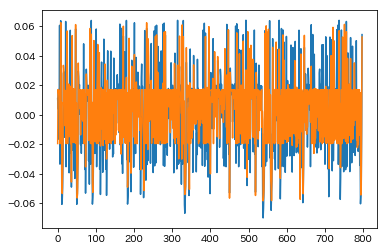

Test
MSE_test 0.0009047828905558748


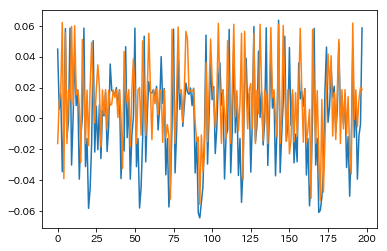

In [171]:
pre_train_psobp_lg_2bp= model_1_error.predict1(train_X_lg_1ps_std)
pre_train_psobp_lg_2bp = pre_train_psobp_lg_2bp[pre_select(1,train_Y_lg_1ps,pre_train_psobp_lg_2bp)]
pre_test_psobp_lg_2bp= model_1_error.predict1(test_X_lg_1ps_std)
pre_test_psobp_lg_2bp = pre_test_psobp_lg_2bp[pre_select(1,test_Y_lg_1ps,pre_test_psobp_lg_2bp)]
pre_x_lg_psobp_tre = remake_std(pre_train_psobp_lg_2bp,train_Y_lg_1ps)
pre_x_lg_psobp_tes = remake_std(pre_test_psobp_lg_2bp,test_Y_lg_1ps)

print("Train")
print("MSE_train",mean_squared_error(train_Y_lg_1ps, pre_x_lg_psobp_tre))
plt.plot(train_Y_lg_1ps)
plt.plot(pre_x_lg_psobp_tre)
#plt.xlim(400,500)
#plt.savefig('image/jpybnp_MLPPSO_pso_predict_train.png')
#plt.savefig('image/Hybrid/log_train_error_psobp_n10.png')

plt.show()
print("Test")
print("MSE_test",mean_squared_error(test_Y_lg_1ps, pre_x_lg_psobp_tes))
plt.plot(test_Y_lg_1ps)
plt.plot(pre_x_lg_psobp_tes)
#plt.xlim(100,150)
#plt.savefig('image/jpybnp_MLPPSO_pso_predict_test.png')
#plt.savefig('image/Hybrid/log_test_error_psobp_n10.png')

plt.show()

## Result

BPPSO
(798, 1)
Train
MSE_train(Hybrid) 0.0004632465560139606
MSE_train(BP) 0.0008716700716741269


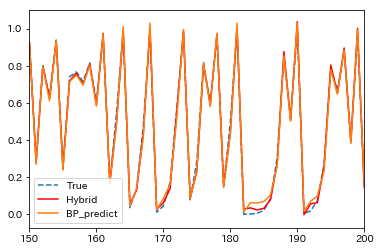

Test
MSE_test(Hybrid) 0.000629279469861618
MSE_test(BP) 0.0009273145467782104
(198, 1)


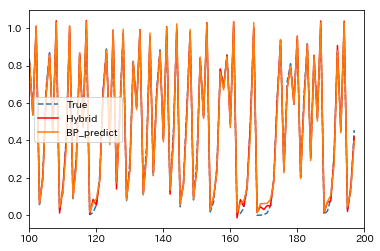

BPBP
(798, 1)
Train
MSE_train(Hybrid) 0.0003269528912856546
MSE_train(BP) 0.0008716700716741269


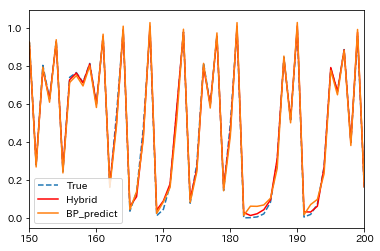

Test
MSE_test(Hybrid) 0.0009047828905558748
MSE_test(BP) 0.0009273145467782104
(198, 1)


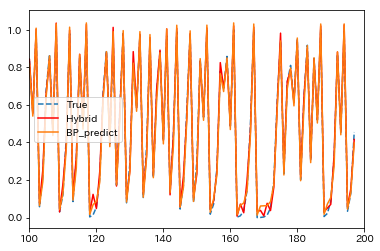

In [125]:
print("BPPSO")
show_result(pre_x_lg_psps_tre,pre_x_lg_psps_tes,pred_train_1ps_lg,pred_test_1ps_lg,h_log,pre_h_log,app=True)
print("BPBP")
show_result(pre_x_lg_psobp_tre,pre_x_lg_psobp_tes,pred_train_1ps_lg,pred_test_1ps_lg,h_log,pre_h_log,app=True)

# function

## BP

In [9]:
max_epoch = 1000
batch_size = 1
hidden_size = 10
learning_rate = 0.01
num =10

#predict1 ->予測値得る
#forward ->loss得る

def MLP(x,t,input_size, hidden_size, output_size,
        num=1,max_epoch=1000,learning_rate=0.01,batch_size=1):
    model = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size,num=num)
    optimizer = Adam(lr=learning_rate)

    # 学習で使用する変数
    data_size = len(x)
    max_iters = data_size // batch_size
    total_loss = 0
    loss_count = 0
    loss_list = []

    for epoch in range(max_epoch):
        # データのシャッフル
        idx = np.random.permutation(data_size)
        x = x[idx]
        t = t[idx]

        for iters in range(max_iters):
            batch_x = x[iters*batch_size:(iters+1)*batch_size]
            batch_t = t[iters*batch_size:(iters+1)*batch_size]
            loss_min =100
            # 勾配を求め、パラメータを更新
            loss = model.forward(batch_x, batch_t)
            #print("loss.shape",np.array(loss).shape)
            min_i = 0
            for i in range(num):
                if loss_min>loss[i]:
                    loss_min = loss[i]
                    min_i = i
                    #print("loss_min",loss_min)
            #print(min_i)
            model.backward()
            #print("model.params",np.array(model.params[0]).shape,"model.grads",np.array(model.grads[0]).shape)
            optimizer.update(model.params, model.grads,min_i,num)
            total_loss += loss_min
            #print("LOSS",total_loss)

            loss_count += 1

            # 定期的に学習経過を出力
            """
            if (iters+1) % 10 == 0:
                avg_loss = total_loss / loss_count
                print('| epoch %d |  iter %d / %d | loss %.9f'
                      % (epoch + 1, iters + 1, max_iters, avg_loss))
                print("----------------------------------------------")
                loss_list.append(avg_loss)
                total_loss, loss_count = 0, 0
            """
        print("total_loss",total_loss)
        avg_loss = total_loss / loss_count
        #print(model.params[0][0])
        print('| epoch %d | loss %.9f'% (epoch + 1, avg_loss))
        print("----------------------------------------------")
        loss_list.append(avg_loss)
        total_loss, loss_count = 0, 0
    
    return model


In [9]:
x=g_log
t=h_log

In [223]:
model_1 = MLP(x,t,2,10,1,num=10,max_epoch=100)
#model_5 = MLP(x,t,2,10,1,num=5)
#model_10 = MLP(x,t,2,10,1,num=10)


W1 (10, 2, 10)
b1 (10,)
2
W.shape (10, 2, 10)
2
W.shape (10, 10, 1)
params (4,)
params[0].shape (10, 2, 10) -> W1
params[1].shape (10,) -> b1
params[2].shape (10, 10, 1) -> W2
params[3].shape (1,) -> b2
grads (4,)
grads[0].shape (10, 2, 10) -> W1
grads[1].shape (10,) -> b1
grads[2].shape (10, 10, 1) -> W2
grads[3].shape (1,) -> b2
total_loss 101.59684643500863
| epoch 1 | loss 0.127314344
----------------------------------------------
total_loss 99.33324023155994
| epoch 2 | loss 0.124477745
----------------------------------------------
total_loss 95.65969240248882
| epoch 3 | loss 0.119874301
----------------------------------------------
total_loss 77.7051186871657
| epoch 4 | loss 0.097374835
----------------------------------------------
total_loss 57.93309752241734
| epoch 5 | loss 0.072597867
----------------------------------------------
total_loss 31.498366173217125
| epoch 6 | loss 0.039471637
----------------------------------------------
total_loss 19.864067298669138
| epoc

total_loss 0.46028567861842
| epoch 75 | loss 0.000576799
----------------------------------------------
total_loss 0.4836673727319294
| epoch 76 | loss 0.000606099
----------------------------------------------
total_loss 0.46562709738173746
| epoch 77 | loss 0.000583493
----------------------------------------------
total_loss 0.5262951852359813
| epoch 78 | loss 0.000659518
----------------------------------------------
total_loss 0.4885635098010557
| epoch 79 | loss 0.000612235
----------------------------------------------
total_loss 0.4623960541600455
| epoch 80 | loss 0.000579444
----------------------------------------------
total_loss 0.5035348922882337
| epoch 81 | loss 0.000630996
----------------------------------------------
total_loss 0.45640084708514733
| epoch 82 | loss 0.000571931
----------------------------------------------
total_loss 0.428524608980584
| epoch 83 | loss 0.000536998
----------------------------------------------
total_loss 0.42007111549028736
| epoch

(10, 198, 1)
min_index 0
loss_min 0.0014193010032740822
0.0014193010032740822
[0.0014193010032740822, 0.0010181618566642103, 0.0013458684662266426, 0.0013373482183784819, 0.0016220657280951428, 0.0012607926919936023, 0.0012025226979479468, 0.00134024725753155, 0.0010696797317391988, 0.0013710054503439488]


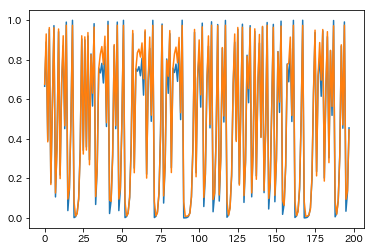

In [225]:
y=model_1.predict1(pre_g_log)
y1_index = pre_select(1,pre_h_log,y)
print(mean_squared_error(pre_h_log,y[y1_index]))
print(model_1.forward(pre_g_log,pre_h_log))
"""
print("n=5")
y5=model_5.predict1(pre_g_log)
y5_index = pre_select(5,pre_h_log,y5)
print(mean_squared_error(pre_h_log,y5[y5_index]))
print(model_5.forward(pre_g_log,pre_h_log))
print("n=10")
y10=model_10.predict1(pre_g_log)
y10_index = pre_select(10,pre_h_log,y10)
print(mean_squared_error(pre_h_log,y10[y10_index]))
#print(model_10.forward(pre_g_log,pre_h_log))
"""
plt.plot(pre_h_log)
plt.plot(y[y1_index])


## PSO

In [10]:
import functools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

class MultiLayerPerceptron_time:

    def __init__(self, shape, weights=None):
        self.shape = shape
        self.num_layers = len(shape)

        if weights is None:
            self.weights = []

            for i in range(self.num_layers-1):
                W = np.random.uniform(size=(self.shape[i+1], self.shape[i] + 1))
                self.weights.append(W)

        else:
            self.weights = weights

    def softmax(self, Z):
        """ソフトマックス関数"""
        return np.exp(Z)/np.sum(np.exp(Z), axis=1)[:, np.newaxis]

    def relu(self,Z):
        return   np.vectorize(lambda x: (np.maximum(x, 0)))(Z)

    def sigmoid(self,Z):
        return  1/ (1 + np.exp(-Z))
    
    def run(self, data):
        layer = data.T

        for i in range(self.num_layers-1):
            prev_layer = np.insert(layer, 0, 1, axis=0)
            o = np.dot(self.weights[i], prev_layer)
            #layer = 1 / (1 + np.exp(-o))
            #"""
            if i < (self.num_layers-2.0):
                #layer = self.sigmoid(o)
                layer = self.relu(o)
                
            if i==(self.num_layers-2.0):
                #print("relu",layer)
                layer = self.sigmoid(o)
                #layer = self.relu(o)

                #print("sigmoid",layer)
            #"""
            #layer = o
            
        return layer
    
    def calc_error(self, X, T):
        N = X.shape[0]
        err = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            
            y = self.run(x)
            
            #print("z",z)
            #z [0.82279137 0.73710344]
            #print("y",y)
            #y [0.83577613 0.78362455]
            #print("t",t)
            #t [1 0]
            #print("y-t",(y-t).shape)
            #yy-t [ 0.81261095 -0.1861338 ]
            #shape[2,]
            #print("reshap(-1,1)",((y - t).reshape((-1, 1))).shape)
            #reshap(-1,1) [[ 0.81261095][-0.1861338 ]]
            #shape[2,1]
            #print("dot",(y-t).dot(y - t).reshape((-1, 1)))
            #dot [[0.77263737]]
            a=(y-t)[0]
            b=(y-t)[1]
            err_ = np.abs((a-b)/2)
            #print("mse:",err_)
            
            err += (y - t).dot((y - t).reshape((-1, 1))) / 2.0
            #print("err",err)
            #if i==0:
                    #print("err",err)
        return err_

    #交差エントロピー誤差
    def cross_entropy_error(self,X, T):
        delta = 1e-7
        N = X.shape[0]
        error = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]
            #error = error -np.sum(t*np.log(x+delta))
            error = error - np.sum(t * np.log(x+delta) + (1 - t) * np.log(1 - x))
            
        error = error/N
        return error
    

class MultiLayerPerceptron_bp:

    def __init__(self, shape, weights=None):
        self.shape = shape
        self.num_layers = len(shape)

        if weights is None:
            self.weights = []

            for i in range(self.num_layers-1):
                W = np.random.uniform(size=(self.shape[i+1], self.shape[i] + 1))
                self.weights.append(W)

        else:
            self.weights = weights

    def softmax(self, Z):
        """ソフトマックス関数"""
        return np.exp(Z)/np.sum(np.exp(Z), axis=1)[:, np.newaxis]

    def relu(self,Z):
        return   np.vectorize(lambda x: (np.maximum(x, 0)))(Z)

    def sigmoid(self,Z):
        a = 1*10e-07
        return  1/ (1 + np.exp(-Z+a))
    
    def run(self, data):
        layer = data.T

        for i in range(self.num_layers-1):
            prev_layer = np.insert(layer, 0, 1, axis=0)
            o = np.dot(self.weights[i], prev_layer)
            #layer = 1 / (1 + np.exp(-o))
            #"""
            if i < (self.num_layers-2.0):
                layer = self.sigmoid(o)
                #layer = self.relu(o)
            #if i == 0:
                #layer = self.sigmoid(o)
                #layer = self.relu(o)

            if i==(self.num_layers-2.0):
                #print("relu",layer)
                #layer = self.sigmoid(o)
                #layer = self.relu(o)
                layer = o
                #print("sigmoid",layer)
            #"""
            #layer = o
            
        return layer
    


In [11]:
class ParticleSwarm_time:
    #w=0.72984
    def __init__(self, cost_func, dim, size, w=0.72984, phi_p=2.05, phi_g=2.05):
        self.cost_func = cost_func
        self.dim = dim

        self.size = size
        self.w = w
        self.phi_p = phi_p
        self.phi_g = phi_g
        self.mse = []

        self.X = np.random.uniform(size=(self.size, self.dim))
        print("self.X : ",self.X.shape)
        self.V = np.random.uniform(size=(self.size, self.dim))

        self.P = self.X.copy()
        self.S = self.cost_func(self.X)
        print("S.shape",self.S.shape)
        self.g = self.P[self.S.argmin()]
        self.best_score = self.S.min()



    def optimize(self, epsilon=1e-3, max_iter=100):
        iteration = 0

        while self.best_score > epsilon and iteration < max_iter:
            self.update()
            iteration = iteration + 1

        return self.g

    def update(self):
        # Velocities update
        R_p = np.random.uniform(size=(self.size, self.dim))
        R_g = np.random.uniform(size=(self.size, self.dim))

        #self.V = self.w * (self.V + self.phi_p * R_p * (self.P - self.X) + self.phi_g * R_g * (self.g - self.X))
        self.V = self.w *self.V +self.phi_p*R_p*(self.P-self.X)+self.phi_g*R_g*(self.g-self.X)
        #new_vx = w * vx + ro1 * (p["x"] - x) + ro2 * (g["x"] - x)

        # Positions update

        self.X = self.X + self.V

        # Best scores

        scores = self.cost_func(self.X)
        better_scores_idx = scores < self.S
        #print("better_scores_idx",better_scores_idx)
        self.P[better_scores_idx] = self.X[better_scores_idx]
        #print("S[bsi]",self.S[better_scores_idx].shape)
        #print("score[bsi]",scores[better_scores_idx].shape)
        
        self.S[better_scores_idx] = scores[better_scores_idx]
        self.g = self.P[self.S.argmin()]
        
        self.best_score = self.S.min()
        self.mse=np.append(self.mse,self.best_score)
    

In [12]:
def eval_neural_network_time(weights, shape, X, y):
        mse = np.asarray([])
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron_time(shape, weights=weights)
            y_pred = nn.run(X).T
            
            #a = nn.calc_error(X,y)
            #print(y_pred.shape)
            a = mean_squared_error(y, y_pred)
            #a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
                  
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse
    
def eval_neural_network_bp(weights, shape, X, y):
        mse = np.asarray([])
        for w in weights:
            weights = vector_to_weights(w, shape)
            nn = MultiLayerPerceptron_bp(shape, weights=weights)
            y_pred = nn.run(X).T
            
            #a = nn.calc_error(X,y)
            #print(y_pred.shape)
            a = mean_squared_error(y, y_pred)
            #a=nn.cross_entropy_error(y_pred,y)
            mse=np.append(mse,a)
            
            
            #mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
            #print("mse",mse)
        return mse

In [13]:
def dim_weights(shape):
    dim = 0

    for i in range(len(shape)-1):
        dim = dim + (shape[i] + 1) * shape[i+1]
    #print("dim =",dim)
    return dim

def weights_to_vector(weights):
    w = np.asarray([])

    for i in range(len(weights)):
        v = weights[i].flatten()
        w = np.append(w, v)
    print("weghts_to_vector : ",w)
    return w

def vector_to_weights(vector, shape):
    weights = []
    idx = 0

    for i in range(len(shape)-1):
        r = shape[i+1]
        c = shape[i] + 1
        idx_min = idx
        idx_max = idx + r*c
        W = vector[idx_min:idx_max].reshape(r,c)
        weights.append(W)

    return weights

In [14]:
def pso(g_log,h_log,hidden = 10,epochs = 3000,w_=0.7,size_lg_=50,phi_g_=1,phi_p_=2):
    num_inputs_lg_1p = g_log.shape[1]
    shape_lg_1p = (num_inputs_lg_1p,hidden,1)

    cost_func_time_lg_1p = functools.partial(eval_neural_network_bp, shape=shape_lg_1p, 
                                          X=g_log, y=h_log)
    swarm_time_lg_1p = ParticleSwarm_time(cost_func_time_lg_1p, dim=dim_weights(shape_lg_1p), 
                                       size=size_lg_,w=w_,phi_g=phi_g_,phi_p=phi_p_)

        # Train...

    i = 0
    epoch = epochs
    best_scores_lg_1p = [(i, swarm_time_lg_1p.best_score)]
    print(best_scores_lg_1p[-1])


    while swarm_time_lg_1p.best_score > 1e-9 and i<epoch:
        swarm_time_lg_1p.update()

        i = i+1

        if swarm_time_lg_1p.best_score < best_scores_lg_1p[-1][1]:
            best_scores_lg_1p.append((i, swarm_time_lg_1p.best_score))
            print(best_scores_lg_1p[-1])
            #print(swarm_time.S)
        else :
            #print(i,swarm_time_lg_pb.best_score)
            if (i%100)==0:
                print(i)
        
    best_weights_lg_1p= vector_to_weights(swarm_time_lg_1p.g, shape_lg_1p)
    best_nn_lg_1p = MultiLayerPerceptron_bp(shape_lg_1p, weights=best_weights_lg_1p)
    
    return best_nn_lg_1p

In [454]:

WW = params2[0]
bb = params2[1]
print("WW",WW[1].shape)
print("bb",bb.shape)
out1 = []
x = g_log[0:1]
tt = h_log[0:1]
print(x.shape)
for i in range (10): 
    out = np.dot(x,WW[i])+bb
    print(out.shape)
    out1.append(out)
np.array(out1).shape
#out1[0]

WW (2, 10)
bb (10,)
(1, 2)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)
(1, 10)


(10, 1, 10)

In [455]:
layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

for layer in layers:
    print(layer.params[0])

2
W.shape (10, 2, 10)
2
W.shape (10, 10, 1)
[[[-0.00362331 -0.00544583  0.01435314  0.00859114 -0.01778758
   -0.01494137  0.0080892   0.01433649 -0.01096689  0.0084031 ]
  [ 0.0020184  -0.0048525  -0.0159951   0.01835618  0.00738809
   -0.01247901  0.00886805 -0.0051199  -0.00679404 -0.0119184 ]]

 [[-0.00367007 -0.00061601  0.00218157  0.00227609  0.01492016
    0.00326614  0.01109256  0.00898347  0.00037547 -0.0183409 ]
  [-0.00991758  0.00012545 -0.01668556  0.00296647  0.01113295
   -0.01084777  0.00335326  0.00666141  0.00595028 -0.01187539]]

 [[ 0.00044392  0.00489573 -0.00868774  0.00432676 -0.00828313
    0.00330374 -0.01297403 -0.0012911  -0.0073005   0.01328972]
  [ 0.02205937 -0.02517327  0.00310743  0.00740355 -0.00707156
   -0.00460828  0.00070473  0.00024342 -0.00951688  0.01897436]]

 [[ 0.01222515 -0.01316846  0.01217464 -0.01023155 -0.00251468
    0.00790757 -0.00511836 -0.00013737  0.01195492  0.01589198]
  [-0.00176573 -0.02628126 -0.00194902 -0.00975236  0.0105416

IndexError: list index out of range

In [459]:
h=[[[[0.5100695 ]],
  [[0.51007018]],
  [[0.51006935]],
  [[0.51006949]],
  [[0.51006983]],
  [[0.51007051]],
  [[0.51007001]],
  [[0.51007018]],
  [[0.51007001]],
  [[0.51006967]]]]

print(np.array(h).shape)
sig=1 / (1 + np.exp(-np.array(h)))
print(sig.shape[1])
a = sig.shape[1]
sig = sig.reshape(-1)
print(sig.shape)
print(tt.shape)
print(mean_squared_error(tt,sig))

(1, 10, 1, 1)
10
(10,)
(1,)


ValueError: Found input variables with inconsistent numbers of samples: [1, 10]

In [617]:
model.params[0].shape
class SGD:
    '''
    確率的勾配降下法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]
model.grads[0].shape
params_j = []
for i in range(len(params)):
    params[i] -= 0.1* model.grads[i]
    for j in range(10):
        params_j.append(0.1* model.grads[i][j])
    
np.array(params[0]).shape
print(model.params[0][0])
print(model.grads[0][0])
print("params_j",params_j[0].shape)
params[0][0].shape

[[-0.80573648 -0.84421865 -0.83534987 -0.82992342 -0.82930006 -0.83285194
  -0.83588832 -0.83406116 -0.81972828 -0.82185109]
 [-1.36195407 -1.25937133 -1.33442834 -1.30209801 -1.2959194  -1.31782433
  -1.30146262 -1.29410299 -1.33829794 -1.31427379]]
[[-5.71026760e-05 -5.10797718e-05 -5.54674821e-05 -5.36443146e-05
  -5.32959284e-05 -5.45283398e-05 -5.35914286e-05 -5.31714524e-05
  -5.57466962e-05 -5.43650710e-05]
 [-1.59730732e-04 -1.42883135e-04 -1.55156678e-04 -1.50056814e-04
  -1.49082289e-04 -1.52529658e-04 -1.49908879e-04 -1.48734098e-04
  -1.55937711e-04 -1.52072953e-04]]
params_j (2, 10)


(2, 10)

## datamake

In [15]:
import pandas as pd
def make_dataset(low_data,maxlen):
    input = []
    maxlen = maxlen
    data, target = [], []

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:(i + maxlen)])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen)
    re_target = np.array(target).reshape(len(data))

    return re_data, re_target

def error_dataset(window_size,error_,t_error_):
    test_extended_ = error_[-1*(window_size):]+error_
    train_extended_ = t_error_[-1*(window_size):]+t_error_
    test_data_ =[]
    train_data = []
    for i in test_extended_:
        try:
            test_data_.append(i[0])
        except:
            test_data_.append(i)
    for i in train_extended_:
        try:
            train_data.append(i[0])
        except:
            train_data.append(i)

    test_data_ = np.array(test_data_).reshape(-1,1)
    train_data = np.array(train_data).reshape(-1,1)
    return test_data_,train_data


def make_error(sm_h,t_sm_h,testa_train_sm,testa_sm):    
    error_sm = []
    error_train_sm = []
    for i in range(len(sm_h)):
        error_train_sm = np.append(error_train_sm, sm_h[i]-testa_train_sm[i])

    for i in range(len(t_sm_h)):
        error_sm = np.append(error_sm, t_sm_h[i]-testa_sm[i])

    error_sm_ = []
    t_error_sm_ = []
    for i in error_train_sm:
        t_error_sm_.append(i)
    for i in error_sm:
        error_sm_.append(i)    
    return t_error_sm_,error_sm_

def make_std(x):
    std = (x-x.min())/(x.max()-x.min())
    return std

def remake_std(t,x):
    re_std = t*(x.max()-x.min())+x.min()
    return re_std

def show_result(pred_train_sm,pred_test_sm,testa_train_sm,testa_sm,sm_h,t_sm_h,app = False):
    pred_final_sm = pred_train_sm+ testa_train_sm
    pred_final_sm_test = pred_test_sm+ testa_sm


    Y_sm = pd.DataFrame(sm_h)
    pred_final_sm = pd.DataFrame(pred_final_sm)
    print(pred_final_sm.shape)
    print("Train")
    print("MSE_train(Hybrid)",mean_squared_error(Y_sm,pred_final_sm))
    print("MSE_train(BP)",mean_squared_error(Y_sm,testa_train_sm))
    plt.plot(Y_sm,"--",label = "True")
    plt.plot(pred_final_sm , color = 'r',label = "Hybrid")
    #plt.plot(predicted1 , color = 'g')
    plt.plot(testa_train_sm,label = "BP_predict")
    plt.legend()
    if app == True:
        plt.xlim(150,200)
    #plt.savefig('image/jpybnp_MLPPSO_final_predict_train_100-200.pshow_result(testa_train_bp,testa_bp,pred_train_mlpbp,pred_test_mlpbp,h,pre_h)ng')
    plt.show()

    print("Test")
    Y_test_sm = pd.DataFrame(t_sm_h)
    pred_final_sm_test = pd.DataFrame(pred_final_sm_test)
    print("MSE_test(Hybrid)",mean_squared_error(Y_test_sm,pred_final_sm_test))
    print("MSE_test(BP)",mean_squared_error(Y_test_sm,testa_sm))
    print(pred_test_sm.shape)
    plt.plot(Y_test_sm,"--",label = "True")
    plt.plot(pred_final_sm_test , color = 'r',label = "Hybrid")
    #plt.plot(predicted1 , color = 'g')
    plt.plot(testa_sm,label = "BP_predict")
    plt.legend() 
    if app == True:
        plt.xlim(100,200)
    #plt.savefig('image/jpybnp_MLPPSO_final_predict_test100-200.png')
    plt.show()


def pre_select(num,h_log,y_hat):
    loss_min_pre =100
    index=0
    for i in range(num):
        a=mean_squared_error(h_log,y_hat[i])
        if loss_min_pre>a:
            print("min_index",i)
            loss_min_pre = a
            print("loss_min",loss_min_pre)
            index = i
    return index


In [20]:
import pickle
def model_save(name,model):
    f = open("model/"+name+".binaryfile","wb")
#pickle.dump(model_n10_adam_e3000,f)
    pickle.dump(model,f)

    f.close

In [920]:
f = open("BP_N10_e3000_Adam.binaryfile","rb")
mm = pickle.load(f)

In [68]:
a = [[1,2,3],[4,5,6],[7,8,9]]
a = np.array(a)
a = a-1
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [60]:
# 関数を紐づけたボタンを配置
#--------------------------

import tkinter
root = tkinter.Tk()
root.title('demo_Tkinter')
root.geometry("400x400")

# コンソールに"Button is clicked."を出力する関数
def clicked():
  print("Button is clicked.")
num = []
def One():
    num.appned(1)
    return num
def Two():
    num.appned(2)
    return num

def pr():
    print(num)
# ボタンの作成（text=ボタンに表示されるテキスト, command=押下時に呼び出す関数）
button = tkinter.Button(root, text="ボタン", command=pr)
vb1 =tkinter.Button(root, text="1", command=One)
vb2 =tkinter.Button(root, text="1", command=Two)


# ボタンの表示
button.grid()
vb1.grid()
vb2.grid()
root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\j_lab\lib\tkinter\__init__.py", line 1558, in __call__
    return self.func(*args)
  File "<ipython-input-60-4a7379dfcfa0>", line 17, in Two
    num.appned(2)
AttributeError: 'list' object has no attribute 'appned'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\j_lab\lib\tkinter\__init__.py", line 1558, in __call__
    return self.func(*args)
  File "<ipython-input-60-4a7379dfcfa0>", line 14, in One
    num.appned(1)
AttributeError: 'list' object has no attribute 'appned'


[]
